In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import integrate, optimize
from scipy.stats import poisson
from scipy.integrate import odeint, solve_ivp

plt.style.use('fivethirtyeight')

In [8]:
country_list = [
 
#  'Thailand',
 'Japan',
#  'Singapore',
#  'Nepal',
#  'Malaysia',
#  'Canada',
#  'Australia',
#  'Cambodia',
#  'Sri Lanka',
 'Germany',
#  'Finland',
#  'United Arab Emirates',
#  'Philippines',
#  'India',
 'Italy',
#  'Sweden',
 'Spain',
#  'Belgium',
#  'Egypt',
#  'Lebanon',
#  'Iraq',
#  'Oman',
#  'Afghanistan',
#  'Bahrain',
#  'Kuwait',
#  'Algeria',
#  'Croatia',
#  'Switzerland',
#  'Austria',
#  'Israel',
#  'Pakistan',
#  'Brazil',
#  'Georgia',
#  'Greece',
#  'North Macedonia',
#  'Norway',
#  'Romania',
#  'Estonia',
#  'Netherlands',
#  'San Marino',
#  'Belarus',
#  'Iceland',
#  'Lithuania',
#  'Mexico',
#  'New Zealand',
#  'Nigeria',
#  'Australia',
#  'Ireland',
#  'Luxembourg',
#  'Monaco',
#  'Qatar',
#  'Ecuador',
#  'Azerbaijan',
#  'Armenia',
#  'Dominican Republic',
#  'Indonesia',
#  'Portugal',
#  'Andorra',
#  'Australia',
#  'Latvia',
#  'Morocco',
#  'Saudi Arabia',
#  'Senegal',
#  'Argentina',
#  'Chile',
#  'Jordan',
#  'Ukraine',
#  'Hungary',
#  'Australia',
#  'Liechtenstein',
 'Poland',
#  'Tunisia',
#  'Bosnia and Herzegovina',
#  'Slovenia',
#  'South Africa',
#  'Bhutan',
#  'Cameroon',
#  'Colombia',
#  'Costa Rica',
#  'Peru',
#  'Serbia',
#  'Slovakia',
#  'Togo',
#  'French Guiana',
#  'Malta',
#  'Martinique',
#  'Bulgaria',
#  'Maldives',
#  'Bangladesh',
#  'Paraguay',
#  'Canada',
#  'Albania',
#  'Cyprus',
#  'Brunei',
#  'Burkina Faso',
#  'Holy See',
#  'Mongolia',
#  'Panama',
#  'China',
#  'Iran',
#  'Korea, South',
#  'France',
#  'Cruise Ship',
#  'United Kingdom',
#  'Denmark',
#  'Czechia',
#  'Taiwan*',
#  'Vietnam',
#  'Russia',
#  'Moldova',
#  'Bolivia',
#  'Denmark',
#  'France',
#  'Honduras',
#  'United Kingdom',
#  'Canada',
#  'Congo (Kinshasa)',
#  "Cote d'Ivoire",
#  'France',
#  'Jamaica',
#  'Reunion',
#  'Turkey',
#  'United Kingdom',
#  'US',
#  'Cuba',
#  'Guyana'

]

In [9]:
cured = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv')
deceased = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv")
infected = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv')

In [10]:
df = cured.T
df = df.rename(columns=df.iloc[1])
df = df[country_list]
df = df.drop(df.index[:4])
df = df.groupby(df.columns, axis=1).sum()
df.index = pd.to_datetime(df.index)
cured_updated = df

df = deceased.T
df = df.rename(columns=df.iloc[1])
df = df[country_list]
df = df.drop(df.index[:4])
df = df.groupby(df.columns, axis=1).sum()
df.index = pd.to_datetime(df.index)
deceased_updated = df

df = infected.T
df = df.rename(columns=df.iloc[1])
df = df[country_list]
df = df.drop(df.index[:4])
df = df.groupby(df.columns, axis=1).sum()
df.index = pd.to_datetime(df.index)
infected_updated = df


In [11]:
cured_updated

,Germany,Italy,Japan,Poland,Spain
2020-01-22,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
2020-08-22,207606.0,205203.0,47418.0,41661.0,150376.0
2020-08-23,207985.0,205470.0,48319.0,42183.0,150376.0
2020-08-24,208653.0,205662.0,49089.0,42448.0,150376.0
2020-08-25,210333.0,206015.0,50092.0,42784.0,150376.0


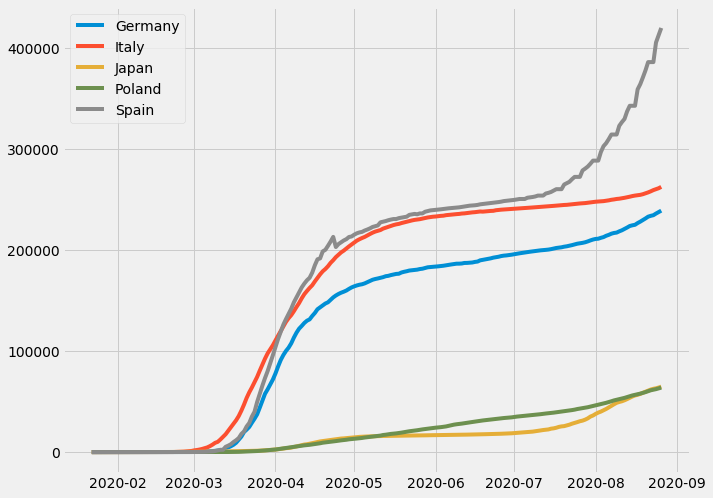

In [12]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(infected_updated)
plt.legend(infected_updated.columns)

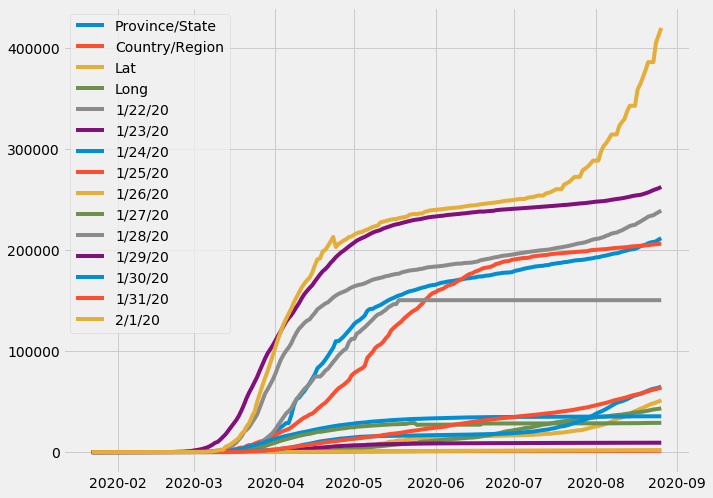

In [13]:
fig = plt.figure(figsize=(10,8))

for frame in [cured_updated, deceased_updated, infected_updated]:
    plt.plot(frame)

plt.grid(True)
plt.legend(infected.columns)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
from timeit import default_timer as timer

In [15]:
df_fit = infected_updated
model = VAR(df_fit)
results = model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 27, Aug, 2020
Time:                     19:07:10
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    61.3947
Nobs:                     217.000    HQIC:                   61.1162
Log likelihood:          -8120.17    FPE:                2.88721e+26
AIC:                      60.9274    Det(Omega_mle):     2.51914e+26
--------------------------------------------------------------------
Results for equation Germany
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const            450.911271       165.977691            2.717           0.007
L1.Germany         0.790202         0.026771           29.517           0.000
L1.Italy           0.105521         0.013305            7.931         

In [16]:
forecast = results.forecast(results.y, steps=14)
forecast = forecast.astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [17]:
df_pred = pd.DataFrame(data=forecast, columns=df_fit.columns)

In [18]:
first_new_date = df_fit.index[-1] + datetime.timedelta(days=1)
# df_pred = df_pred.astype('int64').dtypes
df_pred = df_pred.set_index([pd.date_range(start=first_new_date, periods=len(df_pred.index), freq='D')])

In [19]:
df_fit = infected_updated
model = VAR(df_fit)
results = model.fit()
# results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [20]:
forecast = results.forecast(results.y, steps=14)
forecast = forecast.astype('int64')
df_pred = pd.DataFrame(data=forecast, columns=df_fit.columns)

In [21]:
first_new_date = df_fit.index[-1] + datetime.timedelta(days=1)
df_pred = df_pred.set_index([pd.date_range(start=first_new_date, periods=len(df_pred.index), freq='D')])
df_pred

,Germany,Italy,Japan,Poland,Spain
2020-08-27,242277,264811,65529,64636,428427
2020-08-28,245638,267089,66249,65480,437099
2020-08-29,249080,269356,66938,66334,445842
2020-08-30,252590,271595,67595,67195,454632
2020-08-31,256155,273789,68221,68064,463446
2020-09-01,259760,275918,68815,68940,472258
2020-09-02,263390,277964,69376,69823,481043
2020-09-03,267030,279907,69906,70711,489777
2020-09-04,270664,281728,70405,71604,498433
2020-09-05,274276,283406,70872,72501,506986


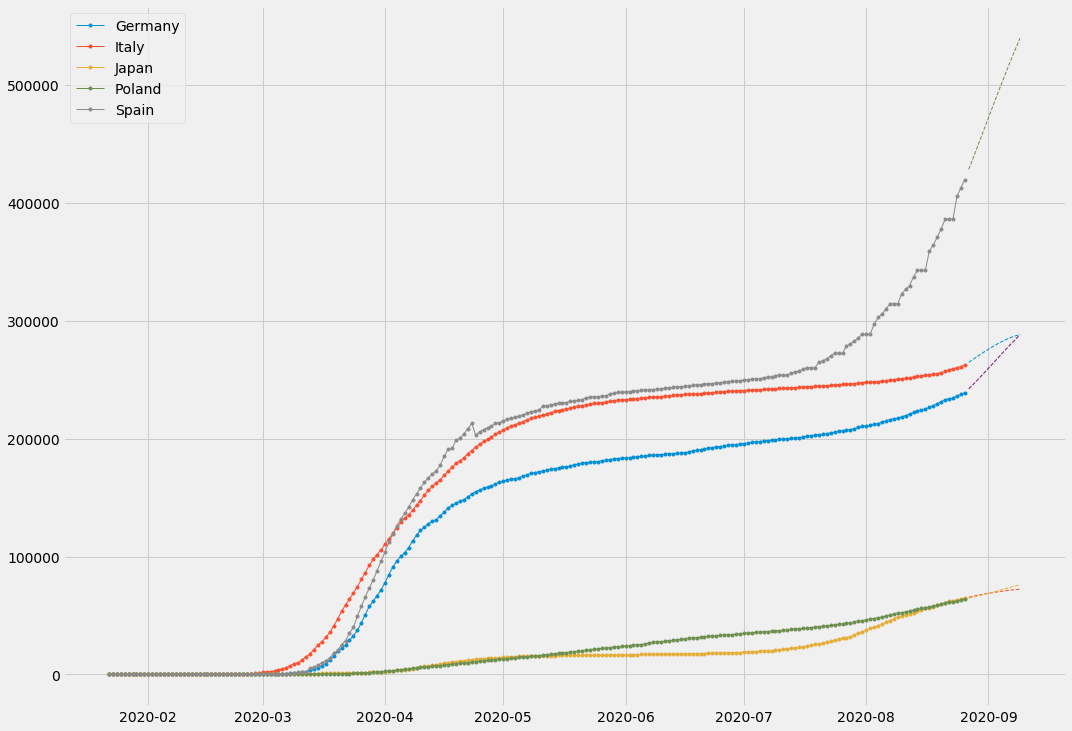

In [22]:
plt.figure(figsize=(16,12))
plt.grid(True)
plt.plot(infected_updated, marker='.', linewidth=1)
plt.plot(df_pred, linestyle='--', linewidth=1)
plt.legend(df_pred.columns)

In [69]:
def SIR_testmodel(y,t,bta,gmma):
    S, I, R = y
    
    dS_dt = -1*bta*I*S/N
    dI_dt = (bta*I*S/N) - gmma*I
    dR_dt = gmma*I

    
    
    return ([dS_dt, dI_dt, dR_dt])

#defining initial conditions

N = 1
S00 = 0.9
I00 = 0.1
R00 = 0.0
bta = 0.35
gmma = 0.1

t = np.arange(0,30)

S_star = float(poisson.pmf(1, 100))
bta_star = float(np.random.uniform(1, 0, 1))
gmma_star = float(np.random.uniform(1, 0, 1))


#### ABC algorithm ####
N = 1000
i = 1 # Initiate counter of accepted particles
j = 1 # Initiate counter of proposed particles
epsilon = 20

while(i <= N): # While the number of accepted particles is less than N_particles
  
    # Sample from prior distributions 
    S0_star = float(poisson.pmf(1, 100))
    bta_star = float(np.random.uniform(1, 3, 1))
    gmma_star = float(np.random.uniform(1, 2, 1))

  
    # Simulate data set from the model
    D_star = odeint(SIR_testmodel,[S00,I00,R00],t,args = (bta_star,gmma_star))


    # Calculate distance  
    distance = np.sqrt(sum((df_seir_list - D_star) ** 2))
    print(distance)

    if(distance[1] <= epsilon): # If the distance is less than the tolerance
        # Store results
        res.append = [S0_star, beta_star, gamma_star, distance]
        # Update counter
        i =+ 1
    else:
        pass
  
    j =+ 1 # Update counter
    acc_rate = i / j # Calculate the acceptance rate 
    print("current acceptance rate = ", acc_rate)

sol = odeint(SIR_testmodel,[S00,I00,R00],t,args = (bta,gmma))
sim = odeint(SIR_testmodel,[S00,I00,R00],t,args = (bta_star,gmma_star))
sol = np.array(sol)
print(sim)
print(t)
#plotting results

plt.figure(figsize=(6,4))
plt.plot(t, sol[:,0],label = "S(t)")
plt.plot(t, sol[:,1],label = "I(t)")
plt.plot(t, sol[:,2],label = "R(t)")
plt.legend()
plt.show()

print(gmma_star)

[6160.73873777   78.74649833   94.75555532]
current acceptance rate =  1.0
[6160.73915207   78.74650045   94.75516253]
current acceptance rate =  1.0
[6160.73860828   78.7464956    94.75568699]
current acceptance rate =  1.0
[6160.73885181   78.74649453   94.75546589]
current acceptance rate =  1.0
[6160.738891     78.74650102   94.75540326]
current acceptance rate =  1.0
[6160.73893277   78.74649478   94.75538939]
current acceptance rate =  1.0
[6160.73881015   78.74649321   94.75551249]
current acceptance rate =  1.0
[6160.7388188    78.74649978   94.75547469]
current acceptance rate =  1.0
[6160.73863845   78.74649359   94.75566955]
current acceptance rate =  1.0
[6160.73863404   78.74649393   94.7556716 ]
current acceptance rate =  1.0
[6160.73880394   78.74649422   94.75551203]
current acceptance rate =  1.0
[6160.73901418   78.7464996    94.75529374]
current acceptance rate =  1.0
[6160.73876856   78.74649623   94.7555352 ]
current acceptance rate =  1.0
[6160.73891208   78.74649

[6160.73870488   78.74649459   94.75560216]
current acceptance rate =  1.0
[6160.73868277   78.74649897   94.75560408]
current acceptance rate =  1.0
[6160.73857014   78.74649378   94.75573188]
current acceptance rate =  1.0
[6160.73867871   78.74649378   94.75563098]
current acceptance rate =  1.0
[6160.73866474   78.74649753   94.75562632]
current acceptance rate =  1.0
[6160.73863764   78.74649459   94.75566465]
current acceptance rate =  1.0
[6160.73896778   78.74649639   94.75534937]
current acceptance rate =  1.0
[6160.73872015   78.74649532   94.75558432]
current acceptance rate =  1.0
[6160.73870208   78.74649601   94.75559796]
current acceptance rate =  1.0
[6160.73879297   78.74649331   94.75552774]
current acceptance rate =  1.0
[6160.73880737   78.74649429   94.75550849]
current acceptance rate =  1.0
[6160.73870213   78.74649535   94.75560092]
current acceptance rate =  1.0
[6160.73869315   78.74649454   94.75561331]
current acceptance rate =  1.0
[6160.73867158   78.74649

[6160.73865729   78.74649838   94.75562997]
current acceptance rate =  1.0
[6160.73871967   78.74649665   94.75557887]
current acceptance rate =  1.0
[6160.73868693   78.74649776   94.75560478]
current acceptance rate =  1.0
[6160.73867686   78.74649753   94.75561506]
current acceptance rate =  1.0
[6160.7389046    78.74650104   94.75539053]
current acceptance rate =  1.0
[6160.73911748   78.74649966   94.75519747]
current acceptance rate =  1.0
[6160.73873216   78.74649579   94.75557099]
current acceptance rate =  1.0
[6160.73872337   78.74649347   94.75559138]
current acceptance rate =  1.0
[6160.73869461   78.74649368   94.75561676]
current acceptance rate =  1.0
[6160.73887164   78.74649614   94.7554398 ]
current acceptance rate =  1.0
[6160.73857624   78.74649424   94.75572356]
current acceptance rate =  1.0
[6160.73874027   78.74649565   94.75556411]
current acceptance rate =  1.0
[6160.73881221   78.7464981    94.75548704]
current acceptance rate =  1.0
[6160.7390623   78.746498

[6160.73872784   78.74649456   94.75558098]
current acceptance rate =  1.0
[6160.73893187   78.74649876   94.75537329]
current acceptance rate =  1.0
[6160.73872942   78.74649474   94.75557858]
current acceptance rate =  1.0
[6160.73865504   78.74649343   94.75565515]
current acceptance rate =  1.0
[6160.73880858   78.74650031   94.75548232]
current acceptance rate =  1.0
[6160.73879622   78.74649373   94.75552206]
current acceptance rate =  1.0
[6160.73857636   78.74649346   94.7557281 ]
current acceptance rate =  1.0
[6160.73859086   78.74649498   94.75570612]
current acceptance rate =  1.0
[6160.73876985   78.74649366   94.75554702]
current acceptance rate =  1.0
[6160.73859272   78.74649436   94.75570758]
current acceptance rate =  1.0
[6160.73862175   78.74649353   94.75568544]
current acceptance rate =  1.0
[6160.7387353    78.74649339   94.75558084]
current acceptance rate =  1.0
[6160.73882056   78.74649525   94.75549135]
current acceptance rate =  1.0
[6160.73858628   78.74649

[6160.73871886   78.74649798   94.75557423]
current acceptance rate =  1.0
[6160.73866898   78.74649388   94.75563941]
current acceptance rate =  1.0
[6160.73903096   78.74650124   94.75527239]
current acceptance rate =  1.0
[6160.73870261   78.74649374   94.75560897]
current acceptance rate =  1.0
[6160.73879526   78.74649834   94.75550187]
current acceptance rate =  1.0
[6160.73900465   78.74649584   94.75531752]
current acceptance rate =  1.0
[6160.73905912   78.74649795   94.7552581 ]
current acceptance rate =  1.0
[6160.73869603   78.74649321   94.75561854]
current acceptance rate =  1.0
[6160.73897116   78.74649686   94.75534425]
current acceptance rate =  1.0
[6160.73874926   78.74649429   94.75556246]
current acceptance rate =  1.0
[6160.73864296   78.74649475   94.75565886]
current acceptance rate =  1.0
[6160.7385461    78.74649341   94.75575651]
current acceptance rate =  1.0
[6160.73858804   78.74649413   94.75571321]
current acceptance rate =  1.0
[6160.73861395   78.74649

[6160.73863606   78.74649351   94.75567228]
current acceptance rate =  1.0
[6160.73873827   78.74649321   94.7555793 ]
current acceptance rate =  1.0
[6160.73853863   78.74649337   94.75576376]
current acceptance rate =  1.0
[6160.73891642   78.74649882   94.75538743]
current acceptance rate =  1.0
[6160.73858573   78.74649375   94.75571753]
current acceptance rate =  1.0
[6160.73883818   78.74649807   94.75546301]
current acceptance rate =  1.0
[6160.73885211   78.74649937   94.75544518]
current acceptance rate =  1.0
[6160.73886013   78.74649571   94.75545243]
current acceptance rate =  1.0
[6160.73896432   78.74649712   94.75534953]
current acceptance rate =  1.0
[6160.73879927   78.7464939    94.7555182 ]
current acceptance rate =  1.0
[6160.7386119    78.74649434   94.75568989]
current acceptance rate =  1.0
[6160.73878865   78.7464966    94.75551495]
current acceptance rate =  1.0
[6160.73866625   78.74649426   94.75563981]
current acceptance rate =  1.0
[6160.73893954   78.74649

[6160.7388401    78.7464953    94.75547292]
current acceptance rate =  1.0
[6160.73863642   78.7464953    94.75566226]
current acceptance rate =  1.0
[6160.73887305   78.74649423   94.75544777]
current acceptance rate =  1.0
[6160.73885514   78.74650124   94.75543584]
current acceptance rate =  1.0
[6160.73913477   78.74649996   94.75518035]
current acceptance rate =  1.0
[6160.73881441   78.74649364   94.75550573]
current acceptance rate =  1.0
[6160.73891751   78.74649681   94.75539429]
current acceptance rate =  1.0
[6160.73857467   78.74649348   94.75572949]
current acceptance rate =  1.0
[6160.73858318   78.74649329   94.75572283]
current acceptance rate =  1.0
[6160.7386875    78.74649482   94.75561711]
current acceptance rate =  1.0
[6160.73880118   78.74649537   94.75550881]
current acceptance rate =  1.0
[6160.73892369   78.74650009   94.7553761 ]
current acceptance rate =  1.0
[6160.73886426   78.74649574   94.75544845]
current acceptance rate =  1.0
[6160.73858081   78.74649

[6160.73857226   78.74649442   94.7557263 ]
current acceptance rate =  1.0
[6160.73890352   78.74649843   94.7554009 ]
current acceptance rate =  1.0
[6160.73870093   78.74650044   94.75558194]
current acceptance rate =  1.0
[6160.73874735   78.74649608   94.75555558]
current acceptance rate =  1.0
[6160.73873899   78.74649417   94.75557267]
current acceptance rate =  1.0
[6160.73872665   78.74649389   94.75558577]
current acceptance rate =  1.0
[6160.7386553    78.74649359   94.7556539 ]
current acceptance rate =  1.0
[6160.73867651   78.74649459   94.75562852]
current acceptance rate =  1.0
[6160.73909298   78.74649905   94.75522249]
current acceptance rate =  1.0
[6160.73890283   78.74649648   94.75540933]
current acceptance rate =  1.0
[6160.7388345    78.74649422   94.75548363]
current acceptance rate =  1.0
[6160.73853403   78.74649354   94.75576691]
current acceptance rate =  1.0
[6160.7387276    78.7464959    94.75557474]
current acceptance rate =  1.0
[6160.73875792   78.74649

[6160.7387324    78.74649955   94.75555584]
current acceptance rate =  1.0
[6160.73877919   78.74649398   94.75553643]
current acceptance rate =  1.0
[6160.73886208   78.74649383   94.75546023]
current acceptance rate =  1.0
[6160.73888645   78.74649513   94.75543071]
current acceptance rate =  1.0
[6160.7391081    78.74649749   94.75521441]
current acceptance rate =  1.0
[6160.73878685   78.74649489   94.75552443]
current acceptance rate =  1.0
[6160.73896541   78.74649979   94.75533836]
current acceptance rate =  1.0
[6160.73876413   78.74649432   94.75554851]
current acceptance rate =  1.0
[6160.73887287   78.74649646   94.75543729]
current acceptance rate =  1.0
[6160.73877982   78.7464967    94.75552274]
current acceptance rate =  1.0
[6160.7387815    78.74649785   94.75551652]
current acceptance rate =  1.0
[6160.73864775   78.74649396   94.75565867]
current acceptance rate =  1.0
[6160.7388865    78.74649457   94.75543347]
current acceptance rate =  1.0
[6160.73877496   78.74649

[6160.7385749    78.746494     94.75572615]
current acceptance rate =  1.0
[6160.73856271   78.74649324   94.75574225]
current acceptance rate =  1.0
[6160.73876965   78.74649404   94.75554495]
current acceptance rate =  1.0
[6160.73879218   78.74649784   94.75550665]
current acceptance rate =  1.0
[6160.73867657   78.74649485   94.75562715]
current acceptance rate =  1.0
[6160.73895112   78.74650127   94.75534651]
current acceptance rate =  1.0
[6160.73881022   78.74649448   94.75550481]
current acceptance rate =  1.0
[6160.73874541   78.74649498   94.75556251]
current acceptance rate =  1.0
[6160.73858967   78.74649453   94.75570951]
current acceptance rate =  1.0
[6160.73869792   78.74649486   94.75560721]
current acceptance rate =  1.0
[6160.73894452   78.74649921   94.75535987]
current acceptance rate =  1.0
[6160.7386144    78.74649335   94.75569346]
current acceptance rate =  1.0
[6160.73882266   78.74649675   94.75548271]
current acceptance rate =  1.0
[6160.73884805   78.74649

[6160.73860979   78.74649342   94.7556973 ]
current acceptance rate =  1.0
[6160.73886881   78.74649431   94.75545127]
current acceptance rate =  1.0
[6160.73893744   78.74649484   94.75538471]
current acceptance rate =  1.0
[6160.73890174   78.74649585   94.75541313]
current acceptance rate =  1.0
[6160.7387642   78.7464977   94.7555332]
current acceptance rate =  1.0
[6160.73889892   78.74650061   94.7553973 ]
current acceptance rate =  1.0
[6160.73863909   78.74649373   94.7556681 ]
current acceptance rate =  1.0
[6160.73919582   78.74650124   94.75511914]
current acceptance rate =  1.0
[6160.73871723   78.74649323   94.75559872]
current acceptance rate =  1.0
[6160.73924559   78.74650171   94.75507128]
current acceptance rate =  1.0
[6160.73876665   78.7464994    94.75552455]
current acceptance rate =  1.0
[6160.73886      78.74649795   94.7554432 ]
current acceptance rate =  1.0
[6160.73864017   78.74649372   94.75566715]
current acceptance rate =  1.0
[6160.73868507   78.74649793

[6160.73878729   78.74649394   94.7555291 ]
current acceptance rate =  1.0
[6160.73904631   78.74650131   94.7552579 ]
current acceptance rate =  1.0
[6160.73882774   78.74650076   94.75546294]
current acceptance rate =  1.0
[6160.73910637   78.74649988   94.75520704]
current acceptance rate =  1.0
[6160.73894676   78.746499     94.75535859]
current acceptance rate =  1.0
[6160.73860438   78.74649539   94.75569161]
current acceptance rate =  1.0
[6160.73864126   78.74649487   94.75565986]
current acceptance rate =  1.0
[6160.73893726   78.74649633   94.75537797]
current acceptance rate =  1.0
[6160.73869916   78.74649816   94.75559189]
current acceptance rate =  1.0
[6160.73870941   78.7464964    94.75558944]
current acceptance rate =  1.0
[6160.7387287    78.74650131   94.75555313]
current acceptance rate =  1.0
[6160.73861657   78.7464974    94.75567161]
current acceptance rate =  1.0
[6160.73889377   78.74649755   94.75541336]
current acceptance rate =  1.0
[6160.73905908   78.74649

[6160.73878378   78.7464962    94.75552119]
current acceptance rate =  1.0
[6160.73856149   78.7464933    94.75574296]
current acceptance rate =  1.0
[6160.7388076    78.74649472   94.75550602]
current acceptance rate =  1.0
[6160.73877296   78.74649508   94.7555364 ]
current acceptance rate =  1.0
[6160.73865627   78.74649473   94.75564661]
current acceptance rate =  1.0
[6160.73864261   78.7464935    94.75566624]
current acceptance rate =  1.0
[6160.73893775   78.74650128   94.7553589 ]
current acceptance rate =  1.0
[6160.738678     78.74649463   94.75562692]
current acceptance rate =  1.0
[6160.7386316    78.74649394   94.7556738 ]
current acceptance rate =  1.0
[6160.73868061   78.74649513   94.755622  ]
current acceptance rate =  1.0
[6160.73863126   78.74649323   94.75567856]
current acceptance rate =  1.0
[6160.73900855   78.74649628   94.75531194]
current acceptance rate =  1.0
[6160.73857868   78.74649386   94.75572345]
current acceptance rate =  1.0
[6160.7386666    78.74649

[6160.73869239   78.74649538   94.75560985]
current acceptance rate =  1.0
[6160.73868456   78.74649366   94.75562624]
current acceptance rate =  1.0
[6160.73859351   78.74649548   94.7557013 ]
current acceptance rate =  1.0
[6160.73878188   78.74649354   94.75553655]
current acceptance rate =  1.0
[6160.73908681   78.74649736   94.7552347 ]
current acceptance rate =  1.0
[6160.73870295   78.7464937    94.7556089 ]
current acceptance rate =  1.0
[6160.7386026    78.74649541   94.75569317]
current acceptance rate =  1.0
[6160.73886453   78.74649684   94.75544343]
current acceptance rate =  1.0
[6160.73879112   78.74649669   94.7555123 ]
current acceptance rate =  1.0
[6160.73885075   78.74649467   94.75546616]
current acceptance rate =  1.0
[6160.73921186   78.74650069   94.75510613]
current acceptance rate =  1.0
[6160.73899667   78.74649642   94.75532239]
current acceptance rate =  1.0
[6160.73865164   78.7464965    94.75564271]
current acceptance rate =  1.0
[6160.73877897   78.74649

[6160.73873846   78.74649329   94.75557857]
current acceptance rate =  1.0
[6160.73896206   78.7464952    94.75536007]
current acceptance rate =  1.0
[6160.73904833   78.74649957   94.75526208]
current acceptance rate =  1.0
[6160.7385622    78.74649334   94.75574205]
current acceptance rate =  1.0
[6160.73905718   78.74649686   94.75526428]
current acceptance rate =  1.0
[6160.73883058   78.74649422   94.75548729]
current acceptance rate =  1.0
[6160.73877484   78.746498     94.75552214]
current acceptance rate =  1.0
[6160.73876827   78.74649796   94.75552842]
current acceptance rate =  1.0
[6160.73884954   78.74649362   94.75547316]
current acceptance rate =  1.0
[6160.73886762   78.74649476   94.75545004]
current acceptance rate =  1.0
[6160.73889831   78.74649441   94.75542334]
current acceptance rate =  1.0
[6160.73902756   78.74649966   94.75528105]
current acceptance rate =  1.0
[6160.73890479   78.74649422   94.75541832]
current acceptance rate =  1.0
[6160.73868588   78.74649

[6160.73917627   78.74649973   94.7551426 ]
current acceptance rate =  1.0
[6160.73869678   78.7464934    94.75561654]
current acceptance rate =  1.0
[6160.73888643   78.74649417   94.75543564]
current acceptance rate =  1.0
[6160.73873022   78.74649368   94.75558366]
current acceptance rate =  1.0
[6160.73904554   78.74649802   94.75527044]
current acceptance rate =  1.0
[6160.7388991    78.74649689   94.7554111 ]
current acceptance rate =  1.0
[6160.73861956   78.74649633   94.75567327]
current acceptance rate =  1.0
[6160.73857681   78.74649378   94.75572564]
current acceptance rate =  1.0
[6160.73885141   78.74649447   94.75546662]
current acceptance rate =  1.0
[6160.73888748   78.74649503   94.75543023]
current acceptance rate =  1.0
[6160.73876228   78.7464954    94.75554478]
current acceptance rate =  1.0
[6160.73856177   78.74649495   94.75573333]
current acceptance rate =  1.0
[6160.73859247   78.74649359   94.75571227]
current acceptance rate =  1.0
[6160.73898331   78.74650

[6160.73865266   78.74649725   94.75563866]
current acceptance rate =  1.0
[6160.73864754   78.74649861   94.75563816]
current acceptance rate =  1.0
[6160.73860782   78.74649654   94.75568329]
current acceptance rate =  1.0
[6160.73869995   78.74649852   94.75558978]
current acceptance rate =  1.0
[6160.73885338   78.74649514   94.75546139]
current acceptance rate =  1.0
[6160.73880403   78.74649422   94.75551198]
current acceptance rate =  1.0
[6160.73853545   78.74649318   94.755768  ]
current acceptance rate =  1.0
[6160.73873757   78.7464978    94.75555758]
current acceptance rate =  1.0
[6160.7386774    78.74650087   94.75560232]
current acceptance rate =  1.0
[6160.73858961   78.74649416   94.7557116 ]
current acceptance rate =  1.0
[6160.73887324   78.74649424   94.75544752]
current acceptance rate =  1.0
[6160.7386221    78.7464943    94.75568059]
current acceptance rate =  1.0
[6160.73897058   78.74649736   94.75534272]
current acceptance rate =  1.0
[6160.73897519   78.74649

[6160.73862167   78.7464951    94.7556769 ]
current acceptance rate =  1.0
[6160.7386255    78.74649469   94.75567542]
current acceptance rate =  1.0
[6160.73895786   78.74649574   94.75536146]
current acceptance rate =  1.0
[6160.73891575   78.74649423   94.75540808]
current acceptance rate =  1.0
[6160.73862951   78.74649402   94.7556753 ]
current acceptance rate =  1.0
[6160.73864433   78.74649461   94.75565831]
current acceptance rate =  1.0
[6160.73887749   78.7464938    94.75544612]
current acceptance rate =  1.0
[6160.73904952   78.74649803   94.75526674]
current acceptance rate =  1.0
[6160.73882002   78.74649367   94.75550029]
current acceptance rate =  1.0
[6160.73862442   78.74649816   94.75566132]
current acceptance rate =  1.0
[6160.73884918   78.74649384   94.75547218]
current acceptance rate =  1.0
[6160.73872417   78.74649422   94.75558619]
current acceptance rate =  1.0
[6160.7386801    78.74649488   94.75562367]
current acceptance rate =  1.0
[6160.73874063   78.74649

[6160.7386729    78.74649634   94.75562363]
current acceptance rate =  1.0
[6160.73912455   78.74649794   94.75519733]
current acceptance rate =  1.0
[6160.7387281    78.74649334   94.75558783]
current acceptance rate =  1.0
[6160.73879666   78.74649672   94.75550698]
current acceptance rate =  1.0
[6160.7387734    78.74649618   94.75553093]
current acceptance rate =  1.0
[6160.73871074   78.74649536   94.75559287]
current acceptance rate =  1.0
[6160.73874104   78.74649509   94.75556603]
current acceptance rate =  1.0
[6160.73881875   78.74649324   94.75550428]
current acceptance rate =  1.0
[6160.7389266    78.74649901   94.75537727]
current acceptance rate =  1.0
[6160.73855239   78.74649319   94.75575217]
current acceptance rate =  1.0
[6160.73910764   78.74650021   94.75520469]
current acceptance rate =  1.0
[6160.73880549   78.74649318   94.75551704]
current acceptance rate =  1.0
[6160.73882053   78.74649909   94.75547558]
current acceptance rate =  1.0
[6160.73896298   78.74649

[6160.73869701   78.74649423   94.75561137]
current acceptance rate =  1.0
[6160.73890445   78.74649603   94.75540982]
current acceptance rate =  1.0
[6160.73886968   78.74650175   94.75542059]
current acceptance rate =  1.0
[6160.73858123   78.74649429   94.75571863]
current acceptance rate =  1.0
[6160.73902121   78.74649704   94.75529697]
current acceptance rate =  1.0
[6160.73902778   78.74649852   94.75528506]
current acceptance rate =  1.0
[6160.73891351   78.74649462   94.75540807]
current acceptance rate =  1.0
[6160.73852278   78.74649321   94.75577956]
current acceptance rate =  1.0
[6160.73881921   78.74649347   94.75550228]
current acceptance rate =  1.0
[6160.73870986   78.74649407   94.7556003 ]
current acceptance rate =  1.0
[6160.73857027   78.74649366   94.75573246]
current acceptance rate =  1.0
[6160.73871657   78.74649833   94.75557504]
current acceptance rate =  1.0
[6160.73868429   78.74650156   94.75559357]
current acceptance rate =  1.0
[6160.73891354   78.74649

[6160.73867421   78.74649483   94.7556294 ]
current acceptance rate =  1.0
[6160.73862202   78.74649586   94.75567303]
current acceptance rate =  1.0
[6160.73862391   78.74649349   94.75568367]
current acceptance rate =  1.0
[6160.73862037   78.74649344   94.75568728]
current acceptance rate =  1.0
[6160.73875401   78.74649868   94.75553893]
current acceptance rate =  1.0
[6160.7387062    78.74649916   94.75558158]
current acceptance rate =  1.0
[6160.73880485   78.74649905   94.75549028]
current acceptance rate =  1.0
[6160.73889992   78.74649665   94.75541131]
current acceptance rate =  1.0
[6160.73875564   78.74649351   94.75556116]
current acceptance rate =  1.0
[6160.73883447   78.7464944    94.75548272]
current acceptance rate =  1.0
[6160.73864948   78.74649627   94.75564573]
current acceptance rate =  1.0
[6160.73865639   78.7464986    94.75562996]
current acceptance rate =  1.0
[6160.73883052   78.74649719   94.75547361]
current acceptance rate =  1.0
[6160.73881971   78.74649

[6160.73856329   78.74649336   94.75574087]
current acceptance rate =  1.0
[6160.73878402   78.74650111   94.75550238]
current acceptance rate =  1.0
[6160.73906097   78.74649908   94.75525213]
current acceptance rate =  1.0
[6160.73882542   78.74649427   94.75549181]
current acceptance rate =  1.0
[6160.738707     78.7464988    94.75558219]
current acceptance rate =  1.0
[6160.73856113   78.74649479   94.75573474]
current acceptance rate =  1.0
[6160.73885467   78.74650074   94.75543799]
current acceptance rate =  1.0
[6160.73865787   78.7465005    94.75562177]
current acceptance rate =  1.0
[6160.73861989   78.7464935    94.75568734]
current acceptance rate =  1.0
[6160.73866423   78.74649421   94.75564192]
current acceptance rate =  1.0
[6160.73865973   78.74649743   94.75563136]
current acceptance rate =  1.0
[6160.73921761   78.7465013    94.7550987 ]
current acceptance rate =  1.0
[6160.73860225   78.74649384   94.75570164]
current acceptance rate =  1.0
[6160.73859385   78.74649

[6160.73885144   78.74649509   94.75546339]
current acceptance rate =  1.0
[6160.7389053    78.74649977   94.75539434]
current acceptance rate =  1.0
[6160.73875007   78.74649356   94.75556597]
current acceptance rate =  1.0
[6160.73893887   78.74649664   94.75537516]
current acceptance rate =  1.0
[6160.73867588   78.74649535   94.75562536]
current acceptance rate =  1.0
[6160.73865842   78.74649381   94.75564964]
current acceptance rate =  1.0
[6160.73891081   78.74650039   94.75538703]
current acceptance rate =  1.0
[6160.73877144   78.74649575   94.75553466]
current acceptance rate =  1.0
[6160.73875225   78.74649373   94.75556289]
current acceptance rate =  1.0
[6160.73878926   78.74649776   94.75550967]
current acceptance rate =  1.0
[6160.73879414   78.74649326   94.75552705]
current acceptance rate =  1.0
[6160.73873605   78.74649389   94.75557705]
current acceptance rate =  1.0
[6160.73876048   78.74649604   94.75554356]
current acceptance rate =  1.0
[6160.73876713   78.74649

[6160.73865902   78.74649561   94.75563979]
current acceptance rate =  1.0
[6160.73874531   78.74649635   94.75555631]
current acceptance rate =  1.0
[6160.73883687   78.74649333   94.75548685]
current acceptance rate =  1.0
[6160.73856593   78.74649431   94.75573278]
current acceptance rate =  1.0
[6160.73857545   78.74649361   94.75572797]
current acceptance rate =  1.0
[6160.73889988   78.7464975    94.75540787]
current acceptance rate =  1.0
[6160.73877517   78.74650026   94.75551355]
current acceptance rate =  1.0
[6160.73864062   78.74649432   94.7556633 ]
current acceptance rate =  1.0
[6160.73911375   78.74650044   94.75519819]
current acceptance rate =  1.0
[6160.73913415   78.74650114   94.75517683]
current acceptance rate =  1.0
[6160.73879971   78.74650132   94.7554871 ]
current acceptance rate =  1.0
[6160.73870864   78.74649318   94.75560706]
current acceptance rate =  1.0
[6160.73862623   78.74649338   94.75568224]
current acceptance rate =  1.0
[6160.73857565   78.74649

[6160.73910168   78.74649822   94.75521748]
current acceptance rate =  1.0
[6160.73867566   78.74649404   94.75563226]
current acceptance rate =  1.0
[6160.73878106   78.74649457   94.75553144]
current acceptance rate =  1.0
[6160.73884978   78.74649408   94.75547021]
current acceptance rate =  1.0
[6160.73871352   78.7464942    94.7555962 ]
current acceptance rate =  1.0
[6160.73883482   78.74649424   94.75548324]
current acceptance rate =  1.0
[6160.73897013   78.74649584   94.75534961]
current acceptance rate =  1.0
[6160.73873176   78.74649983   94.75555542]
current acceptance rate =  1.0
[6160.73875286   78.74649448   94.75555811]
current acceptance rate =  1.0
[6160.73874214   78.74649368   94.75557264]
current acceptance rate =  1.0
[6160.7388362    78.74649437   94.75548126]
current acceptance rate =  1.0
[6160.73875994   78.74649821   94.7555352 ]
current acceptance rate =  1.0
[6160.73876721   78.74649513   94.75554149]
current acceptance rate =  1.0
[6160.73856366   78.74649

[6160.73882331   78.7464956    94.75548716]
current acceptance rate =  1.0
[6160.73886699   78.74649459   94.75545146]
current acceptance rate =  1.0
[6160.73875285   78.74649332   94.75556496]
current acceptance rate =  1.0
[6160.73885435   78.74649595   94.7554567 ]
current acceptance rate =  1.0
[6160.73864595   78.74649476   94.75565603]
current acceptance rate =  1.0
[6160.73877749   78.74650076   94.75550966]
current acceptance rate =  1.0
[6160.73879906   78.74649323   94.75552265]
current acceptance rate =  1.0
[6160.73882562   78.74649698   94.75547899]
current acceptance rate =  1.0
[6160.73898787   78.74649624   94.75533136]
current acceptance rate =  1.0
[6160.7388584    78.74649614   94.75545211]
current acceptance rate =  1.0
[6160.73872291   78.74649914   94.75556613]
current acceptance rate =  1.0
[6160.73877799   78.74649325   94.75554208]
current acceptance rate =  1.0
[6160.73890027   78.74649446   94.75542125]
current acceptance rate =  1.0
[6160.73880421   78.74649

[6160.73901324   78.74649863   94.75529815]
current acceptance rate =  1.0
[6160.73864812   78.74649882   94.75563683]
current acceptance rate =  1.0
[6160.73887743   78.7464979    94.75542719]
current acceptance rate =  1.0
[6160.73876093   78.74649622   94.75554234]
current acceptance rate =  1.0
[6160.73872145   78.7464954    94.75558276]
current acceptance rate =  1.0
[6160.73855698   78.74649341   94.75574638]
current acceptance rate =  1.0
[6160.73866724   78.74649545   94.75563291]
current acceptance rate =  1.0
[6160.73896161   78.74649505   94.7553612 ]
current acceptance rate =  1.0
[6160.73895954   78.74649559   94.7553606 ]
current acceptance rate =  1.0
[6160.73869979   78.74649623   94.75559915]
current acceptance rate =  1.0
[6160.73878639   78.74650003   94.75550394]
current acceptance rate =  1.0
[6160.73879582   78.74649551   94.75551311]
current acceptance rate =  1.0
[6160.73911466   78.7464978    94.75520707]
current acceptance rate =  1.0
[6160.73873377   78.74649

[6160.73874363   78.74649321   94.7555743 ]
current acceptance rate =  1.0
[6160.73874226   78.74650039   94.7555437 ]
current acceptance rate =  1.0
[6160.73873066   78.74649328   94.75558585]
current acceptance rate =  1.0
[6160.7387971    78.7464938    94.75552081]
current acceptance rate =  1.0
[6160.73885771   78.74649513   94.75545741]
current acceptance rate =  1.0
[6160.73879008   78.74649591   94.75551663]
current acceptance rate =  1.0
[6160.73907812   78.74650058   94.75523083]
current acceptance rate =  1.0
[6160.73876515   78.74649392   94.75554979]
current acceptance rate =  1.0
[6160.73861081   78.74649696   94.75567877]
current acceptance rate =  1.0
[6160.73878623   78.74649337   94.75553362]
current acceptance rate =  1.0
[6160.73880822   78.74649784   94.75549175]
current acceptance rate =  1.0
[6160.73870079   78.74649467   94.75560552]
current acceptance rate =  1.0
[6160.73861329   78.74649454   94.75568752]
current acceptance rate =  1.0
[6160.73915964   78.74650

[6160.73876996   78.74649867   94.75552411]
current acceptance rate =  1.0
[6160.73877546   78.74649931   94.75551666]
current acceptance rate =  1.0
[6160.73862815   78.74649441   94.75567438]
current acceptance rate =  1.0
[6160.73880118   78.74649548   94.75550825]
current acceptance rate =  1.0
[6160.73857838   78.74649373   94.75572448]
current acceptance rate =  1.0
[6160.73892913   78.74649996   94.75537148]
current acceptance rate =  1.0
[6160.73886336   78.74649398   94.75545816]
current acceptance rate =  1.0
[6160.73866762   78.74649333   94.75564413]
current acceptance rate =  1.0
[6160.73868179   78.7464945    94.75562405]
current acceptance rate =  1.0
[6160.73872043   78.74649404   94.75559068]
current acceptance rate =  1.0
[6160.73862586   78.74649669   94.75566587]
current acceptance rate =  1.0
[6160.73876855   78.74649378   94.7555475 ]
current acceptance rate =  1.0
[6160.73873409   78.74649329   94.75558264]
current acceptance rate =  1.0
[6160.73885022   78.74649

[6160.73908262   78.74649718   94.75523931]
current acceptance rate =  1.0
[6160.73904657   78.74649723   94.75527263]
current acceptance rate =  1.0
[6160.73862094   78.74649419   94.7556823 ]
current acceptance rate =  1.0
[6160.73879348   78.74649479   94.75551877]
current acceptance rate =  1.0
[6160.73881495   78.74649575   94.75549424]
current acceptance rate =  1.0
[6160.73886792   78.74649692   94.75543992]
current acceptance rate =  1.0
[6160.7389544    78.74649955   94.75534947]
current acceptance rate =  1.0
[6160.73886778   78.7464979    94.75543616]
current acceptance rate =  1.0
[6160.73862248   78.74649359   94.7556844 ]
current acceptance rate =  1.0
[6160.73867576   78.74649782   94.75561493]
current acceptance rate =  1.0
[6160.73895161   78.74650089   94.75534736]
current acceptance rate =  1.0
[6160.73866862   78.74650062   94.75561135]
current acceptance rate =  1.0
[6160.73877107   78.74649816   94.75552504]
current acceptance rate =  1.0
[6160.73885853   78.74649

[6160.73863108   78.74649379   94.75567514]
current acceptance rate =  1.0
[6160.73853258   78.7464935    94.75576848]
current acceptance rate =  1.0
[6160.73868606   78.74649559   94.75561477]
current acceptance rate =  1.0
[6160.73876053   78.74649743   94.75553768]
current acceptance rate =  1.0
[6160.73916759   78.74649895   94.75515351]
current acceptance rate =  1.0
[6160.73905777   78.7464975    94.75526114]
current acceptance rate =  1.0
[6160.73874753   78.7464935    94.75556874]
current acceptance rate =  1.0
[6160.73860264   78.74649446   94.75569782]
current acceptance rate =  1.0
[6160.73879979   78.74649434   94.75551524]
current acceptance rate =  1.0
[6160.73866836   78.7464932    94.75564433]
current acceptance rate =  1.0
[6160.73919187   78.74649984   94.75512771]
current acceptance rate =  1.0
[6160.73890771   78.746495     94.75541158]
current acceptance rate =  1.0
[6160.73875084   78.74649531   94.75555585]
current acceptance rate =  1.0
[6160.73861559   78.74649

[6160.73888188   78.7464977    94.75542382]
current acceptance rate =  1.0
[6160.73864604   78.7464973    94.75564461]
current acceptance rate =  1.0
[6160.7387135    78.74649709   94.75558276]
current acceptance rate =  1.0
[6160.73868054   78.74649409   94.75562746]
current acceptance rate =  1.0
[6160.73874768   78.74649377   94.75556693]
current acceptance rate =  1.0
[6160.7387742    78.74649322   94.75554583]
current acceptance rate =  1.0
[6160.73911715   78.74649839   94.75520247]
current acceptance rate =  1.0
[6160.73889549   78.74649852   94.755408  ]
current acceptance rate =  1.0
[6160.73903023   78.74649713   94.75528823]
current acceptance rate =  1.0
[6160.73884783   78.74649789   94.75545474]
current acceptance rate =  1.0
[6160.73862238   78.74649319   94.7556871 ]
current acceptance rate =  1.0
[6160.73860784   78.74649452   94.75569268]
current acceptance rate =  1.0
[6160.73900897   78.74649595   94.75531303]
current acceptance rate =  1.0
[6160.73875028   78.74649

[6160.7387477    78.74649562   94.75555731]
current acceptance rate =  1.0
[6160.73872728   78.74649346   94.75558779]
current acceptance rate =  1.0
[6160.73875403   78.74649323   94.75556447]
current acceptance rate =  1.0
[6160.73863116   78.74649357   94.75567643]
current acceptance rate =  1.0
[6160.7388229    78.74649424   94.75549433]
current acceptance rate =  1.0
[6160.73869279   78.74649633   94.75560519]
current acceptance rate =  1.0
[6160.73854748   78.74649322   94.7557565 ]
current acceptance rate =  1.0
[6160.7388155    78.74649376   94.75550393]
current acceptance rate =  1.0
[6160.73861517   78.74649361   94.75569104]
current acceptance rate =  1.0
[6160.73871385   78.74649351   94.75559997]
current acceptance rate =  1.0
[6160.73869838   78.74649374   94.75561292]
current acceptance rate =  1.0
[6160.73877077   78.74649482   94.75553973]
current acceptance rate =  1.0
[6160.73860526   78.74649374   94.75569948]
current acceptance rate =  1.0
[6160.7387567    78.74649

[6160.73879755   78.74649363   94.75552141]
current acceptance rate =  1.0
[6160.73854987   78.74649317   94.75575462]
current acceptance rate =  1.0
[6160.73888565   78.74649427   94.75543584]
current acceptance rate =  1.0
[6160.7386691    78.74649981   94.75561373]
current acceptance rate =  1.0
[6160.73866968   78.74649406   94.7556377 ]
current acceptance rate =  1.0
[6160.73859079   78.74649359   94.75571383]
current acceptance rate =  1.0
[6160.73863248   78.74649394   94.755673  ]
current acceptance rate =  1.0
[6160.73873596   78.74649803   94.75555816]
current acceptance rate =  1.0
[6160.73884336   78.74649382   94.75547771]
current acceptance rate =  1.0
[6160.73889957   78.74649481   94.75542007]
current acceptance rate =  1.0
[6160.73892914   78.74649608   94.75538663]
current acceptance rate =  1.0
[6160.73885177   78.74649425   94.75546746]
current acceptance rate =  1.0
[6160.73853325   78.74649354   94.75576762]
current acceptance rate =  1.0
[6160.73881037   78.74649

[6160.73868493   78.74649652   94.75561171]
current acceptance rate =  1.0
[6160.73891364   78.74649477   94.7554072 ]
current acceptance rate =  1.0
[6160.73867801   78.74649966   94.75560598]
current acceptance rate =  1.0
[6160.73859389   78.74649323   94.75571333]
current acceptance rate =  1.0
[6160.73876027   78.74649364   94.75555601]
current acceptance rate =  1.0
[6160.73880726   78.74649597   94.75550037]
current acceptance rate =  1.0
[6160.73922695   78.74650057   94.75509254]
current acceptance rate =  1.0
[6160.7388332    78.74649955   94.75546212]
current acceptance rate =  1.0
[6160.73872988   78.74649346   94.75558539]
current acceptance rate =  1.0
[6160.73882027   78.74649365   94.75550021]
current acceptance rate =  1.0
[6160.73923239   78.74650081   94.75508662]
current acceptance rate =  1.0
[6160.738934     78.74649479   94.75538817]
current acceptance rate =  1.0
[6160.73874284   78.74649588   94.75556068]
current acceptance rate =  1.0
[6160.73887447   78.74649

[6160.73869067   78.7464949    94.75561375]
current acceptance rate =  1.0
[6160.73858013   78.74649344   94.75572469]
current acceptance rate =  1.0
[6160.73885082   78.74649504   94.75546425]
current acceptance rate =  1.0
[6160.73886293   78.746495     94.75545316]
current acceptance rate =  1.0
[6160.73857578   78.7464933    94.75572968]
current acceptance rate =  1.0
[6160.73889889   78.74649793   94.75540709]
current acceptance rate =  1.0
[6160.73864848   78.74649736   94.7556421 ]
current acceptance rate =  1.0
[6160.73866416   78.74649321   94.75564817]
current acceptance rate =  1.0
[6160.73863445   78.74649328   94.7556753 ]
current acceptance rate =  1.0
[6160.73879395   78.74649904   94.75550047]
current acceptance rate =  1.0
[6160.73887185   78.74649921   94.75542744]
current acceptance rate =  1.0
[6160.73882207   78.74649438   94.75549434]
current acceptance rate =  1.0
[6160.73884606   78.74649356   94.75547676]
current acceptance rate =  1.0
[6160.73881254   78.74650

[6160.73892      78.74649675   94.75539225]
current acceptance rate =  1.0
[6160.73862087   78.74649491   94.75567862]
current acceptance rate =  1.0
[6160.73873215   78.74649832   94.75556058]
current acceptance rate =  1.0
[6160.73854045   78.74649357   94.75576071]
current acceptance rate =  1.0
[6160.73885083   78.74649755   94.75545328]
current acceptance rate =  1.0
[6160.73884805   78.74649346   94.75547557]
current acceptance rate =  1.0
[6160.73855731   78.74649469   94.75573878]
current acceptance rate =  1.0
[6160.73900905   78.74649567   94.7553142 ]
current acceptance rate =  1.0
[6160.73897513   78.74649817   94.75533534]
current acceptance rate =  1.0
[6160.73894296   78.74649961   94.75535989]
current acceptance rate =  1.0
[6160.73859      78.74649414   94.75571132]
current acceptance rate =  1.0
[6160.73893856   78.74649837   94.75536854]
current acceptance rate =  1.0
[6160.73896118   78.74649949   94.7553434 ]
current acceptance rate =  1.0
[6160.7386124    78.74649

[6160.73905887   78.7464977    94.7552593 ]
current acceptance rate =  1.0
[6160.7387346    78.74649378   94.755579  ]
current acceptance rate =  1.0
[6160.73887269   78.7464963    94.75543812]
current acceptance rate =  1.0
[6160.73864464   78.74649415   94.75566051]
current acceptance rate =  1.0
[6160.73872009   78.74649409   94.75559073]
current acceptance rate =  1.0
[6160.7387747    78.7464967    94.75552748]
current acceptance rate =  1.0
[6160.73868748   78.74649481   94.75561716]
current acceptance rate =  1.0
[6160.73899994   78.7464973    94.75531567]
current acceptance rate =  1.0
[6160.73883954   78.74649831   94.75546081]
current acceptance rate =  1.0
[6160.73871111   78.74649387   94.75560033]
current acceptance rate =  1.0
[6160.73863667   78.74649383   94.75566971]
current acceptance rate =  1.0
[6160.73888719   78.74649609   94.75542558]
current acceptance rate =  1.0
[6160.73901969   78.74649732   94.75529724]
current acceptance rate =  1.0
[6160.73860162   78.74649

[6160.73866996   78.74649428   94.75563622]
current acceptance rate =  1.0
[6160.73879407   78.74649422   94.75552122]
current acceptance rate =  1.0
[6160.73862792   78.74649694   94.75566292]
current acceptance rate =  1.0
[6160.73888995   78.74649803   94.75541503]
current acceptance rate =  1.0
[6160.73861875   78.74649431   94.75568367]
current acceptance rate =  1.0
[6160.73879332   78.74649322   94.75552805]
current acceptance rate =  1.0
[6160.73861891   78.74649364   94.75568742]
current acceptance rate =  1.0
[6160.73890722   78.74649428   94.75541572]
current acceptance rate =  1.0
[6160.73871182   78.74650013   94.75557288]
current acceptance rate =  1.0
[6160.73875245   78.74649369   94.75556295]
current acceptance rate =  1.0
[6160.73864068   78.74649358   94.75566752]
current acceptance rate =  1.0
[6160.73861587   78.74649412   94.75568738]
current acceptance rate =  1.0
[6160.73872479   78.74649463   94.75558344]
current acceptance rate =  1.0
[6160.73899264   78.74650

[6160.73885201   78.74649838   94.75544894]
current acceptance rate =  1.0
[6160.73877816   78.74649414   94.75553646]
current acceptance rate =  1.0
[6160.73896988   78.74649631   94.75534777]
current acceptance rate =  1.0
[6160.73886818   78.74649461   94.75545028]
current acceptance rate =  1.0
[6160.73865273   78.74649333   94.75565795]
current acceptance rate =  1.0
[6160.73912521   78.74649938   94.75519131]
current acceptance rate =  1.0
[6160.73868777   78.74649321   94.75562619]
current acceptance rate =  1.0
[6160.73875633   78.74650088   94.75552891]
current acceptance rate =  1.0
[6160.73873658   78.74649328   94.75558034]
current acceptance rate =  1.0
[6160.73872242   78.74649603   94.75557897]
current acceptance rate =  1.0
[6160.73899156   78.74649985   94.75531385]
current acceptance rate =  1.0
[6160.73874588   78.74649349   94.75557036]
current acceptance rate =  1.0
[6160.73857412   78.74649364   94.75572904]
current acceptance rate =  1.0
[6160.73896442   78.74649

[6160.73892248   78.74649838   94.75538345]
current acceptance rate =  1.0
[6160.73854184   78.7464934    94.75576057]
current acceptance rate =  1.0
[6160.73866152   78.7464933    94.75565002]
current acceptance rate =  1.0
[6160.73880327   78.74649364   94.75551602]
current acceptance rate =  1.0
[6160.73882196   78.74649742   94.75548062]
current acceptance rate =  1.0
[6160.73886984   78.74650059   94.7554244 ]
current acceptance rate =  1.0
[6160.7388139    78.74649452   94.75550121]
current acceptance rate =  1.0
[6160.73891545   78.74650153   94.75537881]
current acceptance rate =  1.0
[6160.73905995   78.74650173   94.75524379]
current acceptance rate =  1.0
[6160.73870953   78.74649921   94.75557832]
current acceptance rate =  1.0
[6160.73882245   78.74649344   94.75549951]
current acceptance rate =  1.0
[6160.73920635   78.746501     94.75511019]
current acceptance rate =  1.0
[6160.73873882   78.74649935   94.75555057]
current acceptance rate =  1.0
[6160.73894502   78.74649

[6160.7386042    78.74649471   94.75569511]
current acceptance rate =  1.0
[6160.73877086   78.74649767   94.75552712]
current acceptance rate =  1.0
[6160.73865901   78.74649428   94.75564639]
current acceptance rate =  1.0
[6160.7386498    78.74649408   94.75565609]
current acceptance rate =  1.0
[6160.73917223   78.74650171   94.75513948]
current acceptance rate =  1.0
[6160.73916198   78.74650074   94.75515234]
current acceptance rate =  1.0
[6160.73871224   78.74649779   94.75558114]
current acceptance rate =  1.0
[6160.73868454   78.74649426   94.75562279]
current acceptance rate =  1.0
[6160.73904658   78.74650076   94.75525954]
current acceptance rate =  1.0
[6160.73873606   78.74649369   94.75557817]
current acceptance rate =  1.0
[6160.73867212   78.74649381   94.75563691]
current acceptance rate =  1.0
[6160.73883211   78.74649519   94.75548087]
current acceptance rate =  1.0
[6160.73857281   78.74649408   94.75572763]
current acceptance rate =  1.0
[6160.73898947   78.74649

[6160.73864934   78.74649341   94.7556606 ]
current acceptance rate =  1.0
[6160.73887154   78.7464972    94.75543541]
current acceptance rate =  1.0
[6160.73868807   78.74649406   94.75562065]
current acceptance rate =  1.0
[6160.73884098   78.74649347   94.75548208]
current acceptance rate =  1.0
[6160.73858605   78.74649341   94.75571937]
current acceptance rate =  1.0
[6160.7391875    78.74650058   94.75512917]
current acceptance rate =  1.0
[6160.73884448   78.74649595   94.75546587]
current acceptance rate =  1.0
[6160.73871264   78.74649644   94.75558628]
current acceptance rate =  1.0
[6160.73912174   78.74649809   94.75519936]
current acceptance rate =  1.0
[6160.73862194   78.74649334   94.75568652]
current acceptance rate =  1.0
[6160.73853954   78.74649381   94.75576009]
current acceptance rate =  1.0
[6160.73852712   78.74649321   94.75577552]
current acceptance rate =  1.0
[6160.73874771   78.74650036   94.75553874]
current acceptance rate =  1.0
[6160.73855037   78.74649

[6160.7387061    78.74649816   94.7555854 ]
current acceptance rate =  1.0
[6160.73887392   78.7464939    94.75544885]
current acceptance rate =  1.0
[6160.73871656   78.74649391   94.755595  ]
current acceptance rate =  1.0
[6160.73852747   78.74649351   94.75577318]
current acceptance rate =  1.0
[6160.73909087   78.7465001    94.75522066]
current acceptance rate =  1.0
[6160.73877066   78.74649575   94.75553538]
current acceptance rate =  1.0
[6160.73889773   78.74649614   94.75541558]
current acceptance rate =  1.0
[6160.73867529   78.7464948    94.75562855]
current acceptance rate =  1.0
[6160.73884079   78.74649477   94.75547491]
current acceptance rate =  1.0
[6160.73891674   78.74650082   94.75538002]
current acceptance rate =  1.0
[6160.73882534   78.74649492   94.75548853]
current acceptance rate =  1.0
[6160.73875059   78.74649404   94.75556262]
current acceptance rate =  1.0
[6160.73878965   78.74649876   94.75550549]
current acceptance rate =  1.0
[6160.73881322   78.74649

[6160.73901025   78.74649887   94.75530002]
current acceptance rate =  1.0
[6160.73873402   78.7464959    94.75556877]
current acceptance rate =  1.0
[6160.73877315   78.7464937    94.75554367]
current acceptance rate =  1.0
[6160.738764     78.74649386   94.75555119]
current acceptance rate =  1.0
[6160.73864195   78.7464944    94.75566163]
current acceptance rate =  1.0
[6160.73887881   78.74649381   94.75544484]
current acceptance rate =  1.0
[6160.73889689   78.74649394   94.75542727]
current acceptance rate =  1.0
[6160.7388266    78.74649659   94.75547972]
current acceptance rate =  1.0
[6160.73869479   78.74649743   94.75559878]
current acceptance rate =  1.0
[6160.73865548   78.746494     94.75565124]
current acceptance rate =  1.0
[6160.73852762   78.74649353   94.75577289]
current acceptance rate =  1.0
[6160.73858724   78.74649548   94.75570713]
current acceptance rate =  1.0
[6160.73911616   78.74649858   94.75520269]
current acceptance rate =  1.0
[6160.73892154   78.74649

[6160.73871392   78.74649339   94.75560066]
current acceptance rate =  1.0
[6160.73882904   78.74649389   94.75549056]
current acceptance rate =  1.0
[6160.73878325   78.74649461   94.75552918]
current acceptance rate =  1.0
[6160.73867941   78.74650111   94.75559963]
current acceptance rate =  1.0
[6160.73874874   78.74650092   94.75553584]
current acceptance rate =  1.0
[6160.73866719   78.74649471   94.75563653]
current acceptance rate =  1.0
[6160.73871988   78.74649528   94.75558476]
current acceptance rate =  1.0
[6160.73867662   78.74650111   94.75560222]
current acceptance rate =  1.0
[6160.73855115   78.74649318   94.75575341]
current acceptance rate =  1.0
[6160.73897295   78.74649591   94.75534667]
current acceptance rate =  1.0
[6160.73923827   78.74650095   94.75508067]
current acceptance rate =  1.0
[6160.73881782   78.74649399   94.75550044]
current acceptance rate =  1.0
[6160.73922768   78.74650155   94.75508848]
current acceptance rate =  1.0
[6160.73861569   78.74649

[6160.73859204   78.74649416   94.75570931]
current acceptance rate =  1.0
[6160.73869835   78.7464945    94.75560868]
current acceptance rate =  1.0
[6160.73866947   78.74650002   94.75561264]
current acceptance rate =  1.0
[6160.7386746    78.74649582   94.75562437]
current acceptance rate =  1.0
[6160.73888537   78.74649856   94.75541728]
current acceptance rate =  1.0
[6160.73887637   78.74649439   94.75544383]
current acceptance rate =  1.0
[6160.73878879   78.74649386   94.75552821]
current acceptance rate =  1.0
[6160.73881355   78.7464939    94.75550495]
current acceptance rate =  1.0
[6160.73910455   78.74649828   94.75521462]
current acceptance rate =  1.0
[6160.73876315   78.74649389   94.75555184]
current acceptance rate =  1.0
[6160.73887128   78.74649802   94.75543241]
current acceptance rate =  1.0
[6160.73867047   78.74649751   94.75562106]
current acceptance rate =  1.0
[6160.73860474   78.7464973    94.75568299]
current acceptance rate =  1.0
[6160.73868087   78.74649

[6160.73890837   78.74649681   94.7554028 ]
current acceptance rate =  1.0
[6160.73890775   78.74649546   94.75540933]
current acceptance rate =  1.0
[6160.73878257   78.74649781   94.75551571]
current acceptance rate =  1.0
[6160.73888941   78.74649448   94.75543123]
current acceptance rate =  1.0
[6160.7386941    78.74649388   94.75561604]
current acceptance rate =  1.0
[6160.73890589   78.74649417   94.75541756]
current acceptance rate =  1.0
[6160.73863623   78.74649429   94.75566753]
current acceptance rate =  1.0
[6160.73867238   78.74649397   94.75563572]
current acceptance rate =  1.0
[6160.738748     78.74649353   94.75556811]
current acceptance rate =  1.0
[6160.73907796   78.74649769   94.75524161]
current acceptance rate =  1.0
[6160.73885412   78.74649482   94.75546225]
current acceptance rate =  1.0
[6160.73888449   78.74650058   94.75541081]
current acceptance rate =  1.0
[6160.73875976   78.74649337   94.75555821]
current acceptance rate =  1.0
[6160.73873488   78.74649

[6160.73887474   78.74650135   94.75541724]
current acceptance rate =  1.0
[6160.73895454   78.74649508   94.75536766]
current acceptance rate =  1.0
[6160.73864434   78.74649819   94.7556427 ]
current acceptance rate =  1.0
[6160.73879698   78.74649331   94.75552401]
current acceptance rate =  1.0
[6160.73872774   78.74649736   94.75556842]
current acceptance rate =  1.0
[6160.73905033   78.74649994   94.75525889]
current acceptance rate =  1.0
[6160.7388496    78.74649459   94.75546764]
current acceptance rate =  1.0
[6160.73881714   78.74649663   94.75548834]
current acceptance rate =  1.0
[6160.73888733   78.7464946    94.75543253]
current acceptance rate =  1.0
[6160.73877722   78.74649652   94.75552593]
current acceptance rate =  1.0
[6160.73883569   78.74649544   94.75547637]
current acceptance rate =  1.0
[6160.73898707   78.74650087   94.75531448]
current acceptance rate =  1.0
[6160.73877228   78.74649664   94.75552999]
current acceptance rate =  1.0
[6160.73898403   78.74649

[6160.73872169   78.7464981    94.75557115]
current acceptance rate =  1.0
[6160.73873678   78.74649736   94.75556002]
current acceptance rate =  1.0
[6160.73861385   78.74649336   94.75569387]
current acceptance rate =  1.0
[6160.73914831   78.74649884   94.75517183]
current acceptance rate =  1.0
[6160.7389008    78.74649599   94.75541338]
current acceptance rate =  1.0
[6160.7387426    78.74649325   94.755575  ]
current acceptance rate =  1.0
[6160.738638     78.74649348   94.75567064]
current acceptance rate =  1.0
[6160.73868115   78.74649318   94.75563257]
current acceptance rate =  1.0
[6160.73859114   78.74649526   94.75570454]
current acceptance rate =  1.0
[6160.73895173   78.74649696   94.75536187]
current acceptance rate =  1.0
[6160.73874472   78.74649791   94.75555047]
current acceptance rate =  1.0
[6160.73861655   78.74649472   94.75568356]
current acceptance rate =  1.0
[6160.73859196   78.74649382   94.75571133]
current acceptance rate =  1.0
[6160.73873565   78.74649

[6160.73882195   78.74649491   94.75549171]
current acceptance rate =  1.0
[6160.73865349   78.74649825   94.75563396]
current acceptance rate =  1.0
[6160.73880958   78.74649665   94.7554953 ]
current acceptance rate =  1.0
[6160.73920325   78.74649977   94.75511737]
current acceptance rate =  1.0
[6160.73883995   78.74649358   94.75548234]
current acceptance rate =  1.0
[6160.73879065   78.74649412   94.75552494]
current acceptance rate =  1.0
[6160.73877567   78.74650028   94.75551302]
current acceptance rate =  1.0
[6160.73880776   78.74649357   94.7555123 ]
current acceptance rate =  1.0
[6160.73864668   78.74649796   94.75564144]
current acceptance rate =  1.0
[6160.73862311   78.74649337   94.75568518]
current acceptance rate =  1.0
[6160.73871741   78.74649366   94.7555957 ]
current acceptance rate =  1.0
[6160.73856017   78.74649321   94.75574478]
current acceptance rate =  1.0
[6160.7391605    78.74650054   94.75515438]
current acceptance rate =  1.0
[6160.73869772   78.74649

[6160.73869877   78.74649721   94.75559596]
current acceptance rate =  1.0
[6160.73879956   78.74649422   94.75551612]
current acceptance rate =  1.0
[6160.73890979   78.74650126   94.75538497]
current acceptance rate =  1.0
[6160.7385298    78.74649331   94.75577235]
current acceptance rate =  1.0
[6160.73906766   78.74649726   94.75525291]
current acceptance rate =  1.0
[6160.73878639   78.74650031   94.75550296]
current acceptance rate =  1.0
[6160.73877364   78.74649369   94.7555433 ]
current acceptance rate =  1.0
[6160.73879505   78.74649342   94.75552509]
current acceptance rate =  1.0
[6160.73915972   78.74649938   94.75515922]
current acceptance rate =  1.0
[6160.73916365   78.74649872   94.75515799]
current acceptance rate =  1.0
[6160.73867914   78.74649344   94.7556327 ]
current acceptance rate =  1.0
[6160.73880686   78.74649777   94.75549329]
current acceptance rate =  1.0
[6160.73876325   78.74649338   94.75555493]
current acceptance rate =  1.0
[6160.73870696   78.74649

[6160.73866085   78.74649655   94.75563394]
current acceptance rate =  1.0
[6160.73910642   78.7465008    94.75520376]
current acceptance rate =  1.0
[6160.73867612   78.74649448   94.75562945]
current acceptance rate =  1.0
[6160.73873488   78.74649322   94.75558238]
current acceptance rate =  1.0
[6160.73865782   78.74649327   94.75565362]
current acceptance rate =  1.0
[6160.73897632   78.74649761   94.75533641]
current acceptance rate =  1.0
[6160.73862985   78.74649331   94.75567938]
current acceptance rate =  1.0
[6160.7386001    78.74649482   94.75569833]
current acceptance rate =  1.0
[6160.73890865   78.74649426   94.75541454]
current acceptance rate =  1.0
[6160.738909     78.74649417   94.75541468]
current acceptance rate =  1.0
[6160.73863457   78.74649637   94.75565917]
current acceptance rate =  1.0
[6160.73900351   78.74649696   94.75531375]
current acceptance rate =  1.0
[6160.73882469   78.74649345   94.75549734]
current acceptance rate =  1.0
[6160.73877046   78.74649

[6160.73863797   78.74649324   94.75567226]
current acceptance rate =  1.0
[6160.73887999   78.7464938    94.75544377]
current acceptance rate =  1.0
[6160.73872262   78.74649551   94.75558114]
current acceptance rate =  1.0
[6160.73861728   78.74649353   94.7556896 ]
current acceptance rate =  1.0
[6160.73871929   78.74649453   94.75558904]
current acceptance rate =  1.0
[6160.73883878   78.74649448   94.75547829]
current acceptance rate =  1.0
[6160.73858679   78.74649431   94.75571337]
current acceptance rate =  1.0
[6160.73865251   78.74649764   94.75563727]
current acceptance rate =  1.0
[6160.73855109   78.74649383   94.7557493 ]
current acceptance rate =  1.0
[6160.73864489   78.74649856   94.7556408 ]
current acceptance rate =  1.0
[6160.73910884   78.74649758   94.75521335]
current acceptance rate =  1.0
[6160.73867726   78.74649353   94.75563385]
current acceptance rate =  1.0
[6160.73887335   78.74650161   94.75541767]
current acceptance rate =  1.0
[6160.73887638   78.74649

[6160.73869474   78.74649703   94.75560045]
current acceptance rate =  1.0
[6160.73880858   78.74649386   94.75550977]
current acceptance rate =  1.0
[6160.73901963   78.74650017   94.75528663]
current acceptance rate =  1.0
[6160.73877048   78.74649643   94.75553255]
current acceptance rate =  1.0
[6160.73882027   78.74649559   94.75549003]
current acceptance rate =  1.0
[6160.73887285   78.74649398   94.75544938]
current acceptance rate =  1.0
[6160.73877973   78.7464943    94.75553412]
current acceptance rate =  1.0
[6160.73886572   78.74649637   94.7554443 ]
current acceptance rate =  1.0
[6160.73860436   78.74649372   94.75570043]
current acceptance rate =  1.0
[6160.73874671   78.74649397   94.75556663]
current acceptance rate =  1.0
[6160.73865773   78.74649396   94.75564941]
current acceptance rate =  1.0
[6160.73865381   78.74649932   94.7556297 ]
current acceptance rate =  1.0
[6160.73858146   78.74649386   94.75572086]
current acceptance rate =  1.0
[6160.7387317    78.74649

[6160.73862466   78.74649337   94.75568377]
current acceptance rate =  1.0
[6160.7386361    78.74649569   94.75566073]
current acceptance rate =  1.0
[6160.73904806   78.74649981   94.7552615 ]
current acceptance rate =  1.0
[6160.73875934   78.74649879   94.75553355]
current acceptance rate =  1.0
[6160.73895586   78.74649949   94.75534831]
current acceptance rate =  1.0
[6160.73875307   78.74649407   94.75556017]
current acceptance rate =  1.0
[6160.73900959   78.74649587   94.75531278]
current acceptance rate =  1.0
[6160.73858775   78.74649376   94.75571564]
current acceptance rate =  1.0
[6160.73898612   78.74649577   94.75533505]
current acceptance rate =  1.0
[6160.73872966   78.74649332   94.75558652]
current acceptance rate =  1.0
[6160.73858499   78.74649461   94.75571344]
current acceptance rate =  1.0
[6160.73868605   78.74649342   94.75562638]
current acceptance rate =  1.0
[6160.73894155   78.7464956    94.75537725]
current acceptance rate =  1.0
[6160.73904199   78.74650

[6160.73873905   78.7464937    94.75557537]
current acceptance rate =  1.0
[6160.73875682   78.74649431   94.75555534]
current acceptance rate =  1.0
[6160.7386258    78.74649685   94.75566529]
current acceptance rate =  1.0
[6160.73891599   78.74649518   94.755403  ]
current acceptance rate =  1.0
[6160.7388072    78.74649927   94.75548732]
current acceptance rate =  1.0
[6160.73886451   78.74649704   94.75544262]
current acceptance rate =  1.0
[6160.73869774   78.74649667   94.75559917]
current acceptance rate =  1.0
[6160.73892437   78.74649739   94.75538558]
current acceptance rate =  1.0
[6160.73887501   78.74649379   94.75544848]
current acceptance rate =  1.0
[6160.73871513   78.74649417   94.75559484]
current acceptance rate =  1.0
[6160.73869217   78.74649552   94.75560941]
current acceptance rate =  1.0
[6160.73875247   78.74649758   94.75554459]
current acceptance rate =  1.0
[6160.7388355    78.74649453   94.75548103]
current acceptance rate =  1.0
[6160.73875909   78.74650

[6160.73915061   78.74650138   94.75516071]
current acceptance rate =  1.0
[6160.73876297   78.74649344   94.75555476]
current acceptance rate =  1.0
[6160.73881873   78.74649599   94.75548961]
current acceptance rate =  1.0
[6160.73896493   78.74649603   94.75535357]
current acceptance rate =  1.0
[6160.73853758   78.74649352   94.75576371]
current acceptance rate =  1.0
[6160.73876168   78.74649515   94.75554653]
current acceptance rate =  1.0
[6160.73880105   78.74649435   94.75551403]
current acceptance rate =  1.0
[6160.7389443    78.74649485   94.75537829]
current acceptance rate =  1.0
[6160.73906121   78.74650003   94.75524848]
current acceptance rate =  1.0
[6160.73860088   78.74649561   94.75569382]
current acceptance rate =  1.0
[6160.73867092   78.74649929   94.75561392]
current acceptance rate =  1.0
[6160.73892774   78.74650053   94.7553708 ]
current acceptance rate =  1.0
[6160.73897415   78.74649537   94.75534803]
current acceptance rate =  1.0
[6160.73904101   78.74649

[6160.73858515   78.74649396   94.75571682]
current acceptance rate =  1.0
[6160.73860121   78.74649604   94.7556916 ]
current acceptance rate =  1.0
[6160.73858263   78.74649394   94.75571933]
current acceptance rate =  1.0
[6160.73877147   78.74649474   94.75553948]
current acceptance rate =  1.0
[6160.73920425   78.74650106   94.75511195]
current acceptance rate =  1.0
[6160.73881329   78.74649588   94.75549517]
current acceptance rate =  1.0
[6160.73880029   78.74649361   94.755519  ]
current acceptance rate =  1.0
[6160.73899778   78.74650141   94.75530266]
current acceptance rate =  1.0
[6160.73898836   78.74649548   94.75533433]
current acceptance rate =  1.0
[6160.73876653   78.7465002    94.75552181]
current acceptance rate =  1.0
[6160.7389381    78.7464961    94.75537821]
current acceptance rate =  1.0
[6160.73880256   78.74649634   94.75550312]
current acceptance rate =  1.0
[6160.73893578   78.74649614   94.7553802 ]
current acceptance rate =  1.0
[6160.73866795   78.74649

[6160.73879132   78.74649437   94.75552296]
current acceptance rate =  1.0
[6160.73853842   78.74649356   94.75576269]
current acceptance rate =  1.0
[6160.73860886   78.7464937    94.75569634]
current acceptance rate =  1.0
[6160.73877454   78.74649525   94.75553413]
current acceptance rate =  1.0
[6160.73889621   78.74649432   94.75542575]
current acceptance rate =  1.0
[6160.7387176    78.74649521   94.75558722]
current acceptance rate =  1.0
[6160.73864345   78.74649506   94.75565689]
current acceptance rate =  1.0
[6160.73876419   78.74649324   94.755555  ]
current acceptance rate =  1.0
[6160.73912335   78.74649836   94.75519681]
current acceptance rate =  1.0
[6160.73882679   78.74649328   94.75549653]
current acceptance rate =  1.0
[6160.73862438   78.74649488   94.75567548]
current acceptance rate =  1.0
[6160.73880837   78.74650004   94.75548348]
current acceptance rate =  1.0
[6160.7389226    78.74649706   94.75538854]
current acceptance rate =  1.0
[6160.73868614   78.74649

current acceptance rate =  1.0
[6160.73863755   78.74649584   94.75565869]
current acceptance rate =  1.0
[6160.73860861   78.74649361   94.75569714]
current acceptance rate =  1.0
[6160.73872911   78.746496     94.75557291]
current acceptance rate =  1.0
[6160.73875978   78.74649319   94.75555943]
current acceptance rate =  1.0
[6160.73905543   78.74649663   94.75526689]
current acceptance rate =  1.0
[6160.7386871    78.74649752   94.75560558]
current acceptance rate =  1.0
[6160.73868951   78.74649471   94.7556158 ]
current acceptance rate =  1.0
[6160.73887104   78.74649421   94.75544972]
current acceptance rate =  1.0
[6160.73864458   78.74649575   94.75565258]
current acceptance rate =  1.0
[6160.73855431   78.74649443   94.7557429 ]
current acceptance rate =  1.0
[6160.7389649   78.7464954   94.7553565]
current acceptance rate =  1.0
[6160.73885768   78.7465005    94.75543603]
current acceptance rate =  1.0
[6160.73898264   78.74649947   94.75532351]
current acceptance rate =  1

[6160.73883615   78.74649501   94.75547799]
current acceptance rate =  1.0
[6160.73860885   78.74649738   94.75567889]
current acceptance rate =  1.0
[6160.73879891   78.74649331   94.75552224]
current acceptance rate =  1.0
[6160.7387712    78.74649554   94.75553585]
current acceptance rate =  1.0
[6160.73892652   78.74649507   94.75539376]
current acceptance rate =  1.0
[6160.73889092   78.74649684   94.75541889]
current acceptance rate =  1.0
[6160.73906746   78.74649685   94.75525475]
current acceptance rate =  1.0
[6160.738644     78.74649418   94.75566089]
current acceptance rate =  1.0
[6160.73863268   78.74649466   94.75566887]
current acceptance rate =  1.0
[6160.73858712   78.74649359   94.75571724]
current acceptance rate =  1.0
[6160.73877974   78.7464958    94.75552671]
current acceptance rate =  1.0
[6160.73866317   78.74649388   94.75564481]
current acceptance rate =  1.0
[6160.738881     78.74649506   94.75543611]
current acceptance rate =  1.0
[6160.73865713   78.74649

[6160.73880798   78.74649366   94.75551156]
current acceptance rate =  1.0
[6160.73852636   78.74649342   94.75577478]
current acceptance rate =  1.0
[6160.73872211   78.74649448   94.75558673]
current acceptance rate =  1.0
[6160.73882479   78.74649738   94.75547813]
current acceptance rate =  1.0
[6160.73874822   78.74649992   94.7555398 ]
current acceptance rate =  1.0
[6160.73878635   78.746494     94.75552962]
current acceptance rate =  1.0
[6160.7385659    78.74649511   94.7557287 ]
current acceptance rate =  1.0
[6160.73889111   78.74649604   94.75542215]
current acceptance rate =  1.0
[6160.73883102   78.74649895   94.75546634]
current acceptance rate =  1.0
[6160.73871929   78.74649349   94.75559506]
current acceptance rate =  1.0
[6160.73864178   78.74649455   94.75566098]
current acceptance rate =  1.0
[6160.73891736   78.74649667   94.75539503]
current acceptance rate =  1.0
[6160.73921035   78.74649971   94.75511097]
current acceptance rate =  1.0
[6160.73868244   78.74649

[6160.73857869   78.74649397   94.75572281]
current acceptance rate =  1.0
[6160.73890535   78.74649701   94.75540478]
current acceptance rate =  1.0
[6160.73864679   78.74649341   94.75566294]
current acceptance rate =  1.0
[6160.73892039   78.74649612   94.75539458]
current acceptance rate =  1.0
[6160.73874167   78.74649603   94.75556108]
current acceptance rate =  1.0
[6160.73869281   78.74649327   94.75562113]
current acceptance rate =  1.0
[6160.73895235   78.74649638   94.75536373]
current acceptance rate =  1.0
[6160.73880457   78.74649816   94.7554939 ]
current acceptance rate =  1.0
[6160.7386687    78.74649471   94.75563516]
current acceptance rate =  1.0
[6160.73900063   78.74649993   94.75530515]
current acceptance rate =  1.0
[6160.73879019   78.74649497   94.75552092]
current acceptance rate =  1.0
[6160.73878668   78.74649329   94.75553373]
current acceptance rate =  1.0
[6160.73883281   78.74649337   94.75549035]
current acceptance rate =  1.0
[6160.73856387   78.74649

[6160.73886243   78.74649441   94.75545665]
current acceptance rate =  1.0
[6160.73868963   78.74649734   94.75560394]
current acceptance rate =  1.0
[6160.73878302   78.74649598   94.7555229 ]
current acceptance rate =  1.0
[6160.7391856    78.74650179   94.75512679]
current acceptance rate =  1.0
[6160.73872814   78.74649834   94.75556426]
current acceptance rate =  1.0
[6160.73868339   78.7464997    94.75560085]
current acceptance rate =  1.0
[6160.73870382   78.74649544   94.75559896]
current acceptance rate =  1.0
[6160.73860657   78.74649497   94.75569161]
current acceptance rate =  1.0
[6160.73876336   78.74649608   94.75554072]
current acceptance rate =  1.0
[6160.73876158   78.74649379   94.75555391]
current acceptance rate =  1.0
[6160.73895588   78.74650151   94.75534129]
current acceptance rate =  1.0
[6160.73876819   78.74649931   94.75552342]
current acceptance rate =  1.0
[6160.73876594   78.74649443   94.75554622]
current acceptance rate =  1.0
[6160.73860566   78.74649

[6160.73859456   78.74649549   94.75570028]
current acceptance rate =  1.0
[6160.73862467   78.74649451   94.75567712]
current acceptance rate =  1.0
[6160.73875005   78.74649377   94.75556475]
current acceptance rate =  1.0
[6160.73863353   78.74649413   94.75567092]
current acceptance rate =  1.0
[6160.73855773   78.74649418   94.7557411 ]
current acceptance rate =  1.0
[6160.73886305   78.74649619   94.75544757]
current acceptance rate =  1.0
[6160.73894488   78.74649715   94.75536748]
current acceptance rate =  1.0
[6160.73911491   78.74650098   94.75519524]
current acceptance rate =  1.0
[6160.73867695   78.7464966    94.75561878]
current acceptance rate =  1.0
[6160.73875182   78.74649533   94.75555485]
current acceptance rate =  1.0
[6160.73880513   78.7464938    94.75551333]
current acceptance rate =  1.0
[6160.73857408   78.74649371   94.7557286 ]
current acceptance rate =  1.0
[6160.73878385   78.74649341   94.75553553]
current acceptance rate =  1.0
[6160.7388797    78.74649

[6160.73861066   78.74649346   94.75569618]
current acceptance rate =  1.0
[6160.73908189   78.74649866   94.75523422]
current acceptance rate =  1.0
[6160.73860234   78.74649602   94.75569063]
current acceptance rate =  1.0
[6160.73889004   78.74649863   94.75541267]
current acceptance rate =  1.0
[6160.73877609   78.74649682   94.75552572]
current acceptance rate =  1.0
[6160.7385843    78.74649455   94.75571443]
current acceptance rate =  1.0
[6160.73880109   78.74649618   94.75550522]
current acceptance rate =  1.0
[6160.73878185   78.74649422   94.75553255]
current acceptance rate =  1.0
[6160.73903926   78.74649796   94.75527653]
current acceptance rate =  1.0
[6160.73866073   78.74649397   94.75564652]
current acceptance rate =  1.0
[6160.73877795   78.74649652   94.75552525]
current acceptance rate =  1.0
[6160.73893596   78.74649897   94.75536873]
current acceptance rate =  1.0
[6160.73861143   78.74649357   94.75569474]
current acceptance rate =  1.0
[6160.73902253   78.74649

[6160.73865478   78.74649354   94.75565468]
current acceptance rate =  1.0
[6160.73869202   78.74649357   94.75561985]
current acceptance rate =  1.0
[6160.73893567   78.7464945    94.75538811]
current acceptance rate =  1.0
[6160.73917058   78.74650007   94.75514667]
current acceptance rate =  1.0
[6160.73862202   78.74649322   94.75568724]
current acceptance rate =  1.0
[6160.73881359   78.74649623   94.75549338]
current acceptance rate =  1.0
[6160.73895368   78.7464959    94.75536461]
current acceptance rate =  1.0
[6160.73888871   78.7464942    94.75543337]
current acceptance rate =  1.0
[6160.73900346   78.74649884   94.75530645]
current acceptance rate =  1.0
[6160.7386469    78.74649397   94.75565941]
current acceptance rate =  1.0
[6160.73875348   78.74649567   94.75555174]
current acceptance rate =  1.0
[6160.73856234   78.74649341   94.75574144]
current acceptance rate =  1.0
[6160.73871173   78.7464991    94.75557667]
current acceptance rate =  1.0
[6160.73921389   78.74649

[6160.73881399   78.74649331   94.75550824]
current acceptance rate =  1.0
[6160.73885216   78.74649576   94.7554596 ]
current acceptance rate =  1.0
[6160.73859866   78.74649443   94.75570172]
current acceptance rate =  1.0
[6160.73874382   78.74649484   94.75556466]
current acceptance rate =  1.0
[6160.73864335   78.74649329   94.75566692]
current acceptance rate =  1.0
[6160.73882133   78.74649523   94.75549075]
current acceptance rate =  1.0
[6160.73863046   78.74649401   94.75567443]
current acceptance rate =  1.0
[6160.73873544   78.74649711   94.75556229]
current acceptance rate =  1.0
[6160.73898494   78.74649727   94.75532973]
current acceptance rate =  1.0
[6160.73903518   78.74649819   94.75527941]
current acceptance rate =  1.0
[6160.73869115   78.74649467   94.75561447]
current acceptance rate =  1.0
[6160.73910589   78.74649822   94.7552136 ]
current acceptance rate =  1.0
[6160.73865811   78.74649407   94.75564844]
current acceptance rate =  1.0
[6160.73858598   78.74649

[6160.73891556   78.74649422   94.75540834]
current acceptance rate =  1.0
[6160.73863915   78.74649808   94.75564794]
current acceptance rate =  1.0
[6160.73880349   78.74649327   94.75551829]
current acceptance rate =  1.0
[6160.73866806   78.74649844   94.7556197 ]
current acceptance rate =  1.0
[6160.7388252    78.74649398   94.75549361]
current acceptance rate =  1.0
[6160.73865873   78.74649549   94.75564062]
current acceptance rate =  1.0
[6160.73869657   78.74649351   94.75561606]
current acceptance rate =  1.0
[6160.73852154   78.74649329   94.75578014]
current acceptance rate =  1.0
[6160.73906038   78.74650047   94.7552477 ]
current acceptance rate =  1.0
[6160.73899002   78.74649677   94.75532709]
current acceptance rate =  1.0
[6160.73888674   78.74649557   94.75542834]
current acceptance rate =  1.0
[6160.73873295   78.74649878   94.75555811]
current acceptance rate =  1.0
[6160.73894173   78.74649613   94.75537469]
current acceptance rate =  1.0
[6160.73890118   78.74649

[6160.73900996   78.74650082   94.75529337]
current acceptance rate =  1.0
[6160.73861026   78.74649641   94.75568155]
current acceptance rate =  1.0
[6160.73906932   78.74650101   94.75523752]
current acceptance rate =  1.0
[6160.73873331   78.74649541   94.75557169]
current acceptance rate =  1.0
[6160.73881977   78.74649406   94.75549822]
current acceptance rate =  1.0
[6160.73867      78.74649326   94.75564241]
current acceptance rate =  1.0
[6160.73873531   78.74650124   94.75554722]
current acceptance rate =  1.0
[6160.73884774   78.74649393   94.75547296]
current acceptance rate =  1.0
[6160.73858193   78.74649431   94.75571788]
current acceptance rate =  1.0
[6160.7387596    78.74649822   94.75553547]
current acceptance rate =  1.0
[6160.73862907   78.74649387   94.75567654]
current acceptance rate =  1.0
[6160.73879423   78.74650054   94.75549485]
current acceptance rate =  1.0
[6160.73894496   78.74650021   94.75535591]
current acceptance rate =  1.0
[6160.73908362   78.74649

[6160.73883357   78.74649394   94.75548611]
current acceptance rate =  1.0
[6160.7387767    78.74649351   94.75554158]
current acceptance rate =  1.0
[6160.73883009   78.7464948    94.75548468]
current acceptance rate =  1.0
[6160.73855415   78.74649389   94.7557461 ]
current acceptance rate =  1.0
[6160.73866506   78.74649382   94.75564338]
current acceptance rate =  1.0
[6160.7389252    78.74649831   94.75538121]
current acceptance rate =  1.0
[6160.73901838   78.7464976    94.75529735]
current acceptance rate =  1.0
[6160.73877481   78.74649404   94.75554013]
current acceptance rate =  1.0
[6160.73858138   78.746495     94.75571486]
current acceptance rate =  1.0
[6160.7386552    78.74649426   94.75565006]
current acceptance rate =  1.0
[6160.7390917    78.74649751   94.75522954]
current acceptance rate =  1.0
[6160.73871872   78.74649323   94.75559735]
current acceptance rate =  1.0
[6160.73881771   78.74649346   94.75550379]
current acceptance rate =  1.0
[6160.73863692   78.74649

[6160.73867192   78.74649417   94.75563501]
current acceptance rate =  1.0
[6160.7391267    78.74649863   94.75519267]
current acceptance rate =  1.0
[6160.73883873   78.74649327   94.75548549]
current acceptance rate =  1.0
[6160.73878858   78.7464938    94.75552871]
current acceptance rate =  1.0
[6160.73871567   78.74649813   94.75557662]
current acceptance rate =  1.0
[6160.73890093   78.74649696   94.7554091 ]
current acceptance rate =  1.0
[6160.73860068   78.74649343   94.75570567]
current acceptance rate =  1.0
[6160.7387413    78.74649351   94.75557449]
current acceptance rate =  1.0
[6160.73878733   78.74649506   94.75552315]
current acceptance rate =  1.0
[6160.73857241   78.74649374   94.75572997]
current acceptance rate =  1.0
[6160.73868372   78.74649615   94.75561444]
current acceptance rate =  1.0
[6160.73871565   78.74649597   94.75558553]
current acceptance rate =  1.0
[6160.73860277   78.74649349   94.75570335]
current acceptance rate =  1.0
[6160.73873387   78.74649

[6160.73921331   78.74650081   94.75510438]
current acceptance rate =  1.0
[6160.73895697   78.74649646   94.7553591 ]
current acceptance rate =  1.0
[6160.73880144   78.74649751   94.75549934]
current acceptance rate =  1.0
[6160.73890178   78.7464941    94.75542178]
current acceptance rate =  1.0
[6160.73886469   78.74650087   94.75542821]
current acceptance rate =  1.0
[6160.73882623   78.74649434   94.75549067]
current acceptance rate =  1.0
[6160.73875705   78.74649699   94.75554269]
current acceptance rate =  1.0
[6160.7388848    78.74649382   94.75543917]
current acceptance rate =  1.0
[6160.73881859   78.74649318   94.75550485]
current acceptance rate =  1.0
[6160.73879864   78.74649638   94.75550659]
current acceptance rate =  1.0
[6160.73889474   78.74649443   94.75542651]
current acceptance rate =  1.0
[6160.73875883   78.74649858   94.7555348 ]
current acceptance rate =  1.0
[6160.73865034   78.74649447   94.75565346]
current acceptance rate =  1.0
[6160.73899001   78.74649

[6160.73902003   78.74649696   94.7552984 ]
current acceptance rate =  1.0
[6160.73885796   78.74649362   94.75546536]
current acceptance rate =  1.0
[6160.73878532   78.74650078   94.7555023 ]
current acceptance rate =  1.0
[6160.73858677   78.74649352   94.75571799]
current acceptance rate =  1.0
[6160.7387721    78.74649881   94.75552162]
current acceptance rate =  1.0
[6160.73882461   78.74649432   94.75549226]
current acceptance rate =  1.0
[6160.73866971   78.74649409   94.7556375 ]
current acceptance rate =  1.0
[6160.73881705   78.74649328   94.75550558]
current acceptance rate =  1.0
[6160.73856705   78.74649449   94.75573079]
current acceptance rate =  1.0
[6160.73861536   78.74649482   94.75568414]
current acceptance rate =  1.0
[6160.73879265   78.74649407   94.75552337]
current acceptance rate =  1.0
[6160.73858052   78.74649354   94.75572366]
current acceptance rate =  1.0
[6160.73852723   78.74649318   94.75577559]
current acceptance rate =  1.0
[6160.73913524   78.74650

[6160.73894172   78.74649835   94.75536568]
current acceptance rate =  1.0
[6160.73875359   78.74649523   94.75555367]
current acceptance rate =  1.0
[6160.73868178   78.74649319   94.75563195]
current acceptance rate =  1.0
[6160.73887404   78.74649497   94.75544299]
current acceptance rate =  1.0
[6160.73876817   78.74649406   94.7555462 ]
current acceptance rate =  1.0
[6160.73865936   78.74649589   94.75563822]
current acceptance rate =  1.0
[6160.73857198   78.74649352   94.75573176]
current acceptance rate =  1.0
[6160.73878446   78.74649338   94.75553521]
current acceptance rate =  1.0
[6160.73866245   78.74649557   94.75563677]
current acceptance rate =  1.0
[6160.7386132    78.74649682   94.75567712]
current acceptance rate =  1.0
[6160.73924249   78.74650134   94.75507542]
current acceptance rate =  1.0
[6160.73858085   78.74649553   94.75571283]
current acceptance rate =  1.0
[6160.73855588   78.74649449   94.75574115]
current acceptance rate =  1.0
[6160.73909068   78.74649

[6160.73871489   78.74649359   94.75559849]
current acceptance rate =  1.0
[6160.73853714   78.74649374   94.75576279]
current acceptance rate =  1.0
[6160.73870477   78.74649751   94.75558918]
current acceptance rate =  1.0
[6160.73869256   78.74649335   94.75562081]
current acceptance rate =  1.0
[6160.7386441    78.74649578   94.75565286]
current acceptance rate =  1.0
[6160.73890219   78.74649945   94.75539837]
current acceptance rate =  1.0
[6160.73876987   78.74650034   94.7555182 ]
current acceptance rate =  1.0
[6160.73858014   78.74649476   94.75571722]
current acceptance rate =  1.0
[6160.73921454   78.74649989   94.75510643]
current acceptance rate =  1.0
[6160.73854136   78.7464935    94.75576033]
current acceptance rate =  1.0
[6160.73876146   78.74649441   94.7555505 ]
current acceptance rate =  1.0
[6160.73861968   78.74649341   94.75568815]
current acceptance rate =  1.0
[6160.73921449   78.74650048   94.75510443]
current acceptance rate =  1.0
[6160.73877796   78.74649

[6160.73889174   78.74649905   94.75540953]
current acceptance rate =  1.0
[6160.73869457   78.74649873   94.755594  ]
current acceptance rate =  1.0
[6160.73864006   78.74649631   94.7556543 ]
current acceptance rate =  1.0
[6160.73886096   78.74649618   94.75544957]
current acceptance rate =  1.0
[6160.73878624   78.74649349   94.75553282]
current acceptance rate =  1.0
[6160.73867664   78.74649962   94.75560739]
current acceptance rate =  1.0
[6160.73885643   78.74649387   94.75546528]
current acceptance rate =  1.0
[6160.73889969   78.74649557   94.75541628]
current acceptance rate =  1.0
[6160.73882207   78.74649551   94.75548871]
current acceptance rate =  1.0
[6160.73859556   78.74649468   94.75570327]
current acceptance rate =  1.0
[6160.73917113   78.74650111   94.75514253]
current acceptance rate =  1.0
[6160.738692     78.74649334   94.7556214 ]
current acceptance rate =  1.0
[6160.73887779   78.74649945   94.75542103]
current acceptance rate =  1.0
[6160.73881786   78.74649

[6160.73858694   78.7464933    94.75571931]
current acceptance rate =  1.0
[6160.73877515   78.74649891   94.75551841]
current acceptance rate =  1.0
[6160.73870005   78.7464944    94.75560765]
current acceptance rate =  1.0
[6160.73873219   78.74649439   94.7555778 ]
current acceptance rate =  1.0
[6160.7387547    78.74649867   94.75553831]
current acceptance rate =  1.0
[6160.73864438   78.7464935    94.75566462]
current acceptance rate =  1.0
[6160.73860096   78.74649454   94.75569899]
current acceptance rate =  1.0
[6160.73866047   78.74649408   94.75564618]
current acceptance rate =  1.0
[6160.73921128   78.74649965   94.75511034]
current acceptance rate =  1.0
[6160.73882184   78.74649396   94.75549691]
current acceptance rate =  1.0
[6160.73862193   78.74649406   94.75568209]
current acceptance rate =  1.0
[6160.73868634   78.74649508   94.75561693]
current acceptance rate =  1.0
[6160.73882463   78.74649404   94.75549386]
current acceptance rate =  1.0
[6160.7385811    78.74649

[6160.73855335   78.74649355   94.75574889]
current acceptance rate =  1.0
[6160.73857212   78.74649406   94.75572837]
current acceptance rate =  1.0
[6160.73884215   78.74649344   94.75548118]
current acceptance rate =  1.0
[6160.73866453   78.74649631   94.75563157]
current acceptance rate =  1.0
[6160.7389528    78.74650165   94.75534367]
current acceptance rate =  1.0
[6160.73855065   78.74649409   94.75574815]
current acceptance rate =  1.0
[6160.73881146   78.74649354   94.75550904]
current acceptance rate =  1.0
[6160.73884574   78.74649493   94.75546948]
current acceptance rate =  1.0
[6160.7387439    78.74649482   94.7555647 ]
current acceptance rate =  1.0
[6160.73862729   78.74649362   94.75567974]
current acceptance rate =  1.0
[6160.73888557   78.74649488   94.75543274]
current acceptance rate =  1.0
[6160.73879805   78.74649481   94.7555144 ]
current acceptance rate =  1.0
[6160.73856563   78.74649355   94.75573743]
current acceptance rate =  1.0
[6160.73872998   78.74649

[6160.7386851    78.74649556   94.75561577]
current acceptance rate =  1.0
[6160.7388613    78.7465011    94.75543058]
current acceptance rate =  1.0
[6160.73871527   78.74649381   94.75559678]
current acceptance rate =  1.0
[6160.73855371   78.74649415   94.75574501]
current acceptance rate =  1.0
[6160.73868984   78.74649464   94.75561586]
current acceptance rate =  1.0
[6160.7391001    78.74649916   94.75521547]
current acceptance rate =  1.0
[6160.73912465   78.74649986   94.75519012]
current acceptance rate =  1.0
[6160.73905626   78.74649708   94.75526422]
current acceptance rate =  1.0
[6160.73869231   78.7465006    94.75558938]
current acceptance rate =  1.0
[6160.73865878   78.74649347   94.7556514 ]
current acceptance rate =  1.0
[6160.73876319   78.74649438   94.75554905]
current acceptance rate =  1.0
[6160.73905794   78.74649854   94.75525693]
current acceptance rate =  1.0
[6160.7390517    78.74649686   94.75526937]
current acceptance rate =  1.0
[6160.73880631   78.74649

[6160.73872973   78.74649939   94.75555889]
current acceptance rate =  1.0
[6160.73870208   78.74649331   94.75561225]
current acceptance rate =  1.0
[6160.73881678   78.74649347   94.75550459]
current acceptance rate =  1.0
[6160.73857532   78.7464933    94.75573007]
current acceptance rate =  1.0
[6160.73879128   78.74649462   94.7555217 ]
current acceptance rate =  1.0
[6160.73896575   78.74649496   94.75535783]
current acceptance rate =  1.0
[6160.73868176   78.7464942    94.75562571]
current acceptance rate =  1.0
[6160.73893068   78.74649482   94.75539111]
current acceptance rate =  1.0
[6160.73878565   78.74649388   94.75553099]
current acceptance rate =  1.0
[6160.7386859    78.74649347   94.75562621]
current acceptance rate =  1.0
[6160.73900406   78.74650095   94.7552984 ]
current acceptance rate =  1.0
[6160.73870478   78.74649576   94.75559661]
current acceptance rate =  1.0
[6160.73864322   78.7464944    94.75566045]
current acceptance rate =  1.0
[6160.73880678   78.74649

[6160.73900177   78.74649932   94.75530625]
current acceptance rate =  1.0
[6160.73904144   78.74649654   94.75528025]
current acceptance rate =  1.0
[6160.73890008   78.74649871   94.75540302]
current acceptance rate =  1.0
[6160.73898293   78.74649677   94.75533368]
current acceptance rate =  1.0
[6160.73852417   78.74649324   94.75577806]
current acceptance rate =  1.0
[6160.73889465   78.74649629   94.75541776]
current acceptance rate =  1.0
[6160.73914844   78.74649919   94.7551704 ]
current acceptance rate =  1.0
[6160.73873482   78.74650129   94.75554751]
current acceptance rate =  1.0
[6160.73886639   78.74649359   94.75545768]
current acceptance rate =  1.0
[6160.73871565   78.74649377   94.75559669]
current acceptance rate =  1.0
[6160.73880793   78.7464952    94.75550331]
current acceptance rate =  1.0
[6160.73863981   78.74649375   94.75566728]
current acceptance rate =  1.0
[6160.73868684   78.74649506   94.75561656]
current acceptance rate =  1.0
[6160.73861884   78.74649

[6160.73885737   78.74649557   94.75545564]
current acceptance rate =  1.0
[6160.73879601   78.74649446   94.75551813]
current acceptance rate =  1.0
[6160.73916554   78.74650099   94.75514815]
current acceptance rate =  1.0
[6160.73897945   78.74649814   94.7553314 ]
current acceptance rate =  1.0
[6160.73869518   78.74649667   94.75560154]
current acceptance rate =  1.0
[6160.73881381   78.74649328   94.75550862]
current acceptance rate =  1.0
[6160.73877757   78.74649351   94.75554075]
current acceptance rate =  1.0
[6160.73856737   78.7464938    94.75573434]
current acceptance rate =  1.0
[6160.73887553   78.74650007   94.75542093]
current acceptance rate =  1.0
[6160.73907911   78.7465017    94.7552261 ]
current acceptance rate =  1.0
[6160.73881873   78.7464934    94.75550321]
current acceptance rate =  1.0
[6160.73880669   78.74649392   94.7555112 ]
current acceptance rate =  1.0
[6160.73873684   78.74649512   94.75556981]
current acceptance rate =  1.0
[6160.7390488    78.74650

[6160.73870892   78.74649355   94.75560429]
current acceptance rate =  1.0
[6160.73883456   78.74649369   94.75548663]
current acceptance rate =  1.0
[6160.73888951   78.74649886   94.75541229]
current acceptance rate =  1.0
[6160.7385929    78.74649464   94.75570596]
current acceptance rate =  1.0
[6160.73906006   78.74649921   94.7552525 ]
current acceptance rate =  1.0
[6160.73892139   78.74649465   94.75540062]
current acceptance rate =  1.0
[6160.73876722   78.74649334   94.75555146]
current acceptance rate =  1.0
[6160.73852925   78.74649351   94.75577151]
current acceptance rate =  1.0
[6160.73876789   78.74649329   94.75555118]
current acceptance rate =  1.0
[6160.73872329   78.74649462   94.75558488]
current acceptance rate =  1.0
[6160.73880472   78.74649515   94.75550653]
current acceptance rate =  1.0
[6160.73864286   78.74649471   94.75565917]
current acceptance rate =  1.0
[6160.73896471   78.74650052   94.75533646]
current acceptance rate =  1.0
[6160.7390559    78.74650

[6160.73872426   78.74649381   94.75558846]
current acceptance rate =  1.0
[6160.73884685   78.74649585   94.75546413]
current acceptance rate =  1.0
[6160.73878383   78.74649335   94.75553598]
current acceptance rate =  1.0
[6160.73887731   78.7464961    94.7554347 ]
current acceptance rate =  1.0
[6160.7392217    78.74650077   94.75509671]
current acceptance rate =  1.0
[6160.73883447   78.74649629   94.75547371]
current acceptance rate =  1.0
[6160.73892862   78.74649759   94.75538082]
current acceptance rate =  1.0
[6160.73877316   78.74649575   94.75553307]
current acceptance rate =  1.0
[6160.73904275   78.74649626   94.75528023]
current acceptance rate =  1.0
[6160.73886628   78.74649465   94.75545181]
current acceptance rate =  1.0
[6160.73874154   78.74649457   94.75556817]
current acceptance rate =  1.0
[6160.73866641   78.74649878   94.75561997]
current acceptance rate =  1.0
[6160.73860806   78.74649438   94.75569325]
current acceptance rate =  1.0
[6160.7385359    78.74649

[6160.73879422   78.7464948    94.75551804]
current acceptance rate =  1.0
[6160.73878597   78.74649582   94.75552083]
current acceptance rate =  1.0
[6160.73879759   78.74649448   94.75551654]
current acceptance rate =  1.0
[6160.73864166   78.74649833   94.75564467]
current acceptance rate =  1.0
[6160.73895442   78.74649546   94.75536595]
current acceptance rate =  1.0
[6160.73858818   78.74649331   94.75571805]
current acceptance rate =  1.0
[6160.7386533    78.74649394   94.75565362]
current acceptance rate =  1.0
[6160.73911953   78.74650089   94.75519127]
current acceptance rate =  1.0
[6160.73870772   78.74649536   94.7555957 ]
current acceptance rate =  1.0
[6160.73857627   78.74649358   94.75572739]
current acceptance rate =  1.0
[6160.73855765   78.74649431   94.75574045]
current acceptance rate =  1.0
[6160.73854267   78.74649379   94.75575736]
current acceptance rate =  1.0
[6160.73885803   78.74649725   94.75544779]
current acceptance rate =  1.0
[6160.73858186   78.74649

[6160.73878284   78.74649498   94.7555277 ]
current acceptance rate =  1.0
[6160.73878701   78.74649544   94.75552161]
current acceptance rate =  1.0
[6160.73863538   78.74649444   94.75566749]
current acceptance rate =  1.0
[6160.73890381   78.74649467   94.75541685]
current acceptance rate =  1.0
[6160.73879434   78.74649363   94.75552442]
current acceptance rate =  1.0
[6160.73858793   78.74649421   94.75571286]
current acceptance rate =  1.0
[6160.73854371   78.74649378   94.75575642]
current acceptance rate =  1.0
[6160.73888109   78.74649979   94.75541676]
current acceptance rate =  1.0
[6160.73874555   78.74649989   94.75554237]
current acceptance rate =  1.0
[6160.73877987   78.74650006   94.75550988]
current acceptance rate =  1.0
[6160.73869944   78.74649875   94.75558938]
current acceptance rate =  1.0
[6160.73859663   78.74649327   94.75571048]
current acceptance rate =  1.0
[6160.73862007   78.74649324   94.75568891]
current acceptance rate =  1.0
[6160.73899707   78.74649

[6160.7386724    78.7464941    94.75563496]
current acceptance rate =  1.0
[6160.73879133   78.74649968   94.7555006 ]
current acceptance rate =  1.0
[6160.73864801   78.74649344   94.75566162]
current acceptance rate =  1.0
[6160.73917666   78.74650156   94.75513589]
current acceptance rate =  1.0
[6160.73879227   78.74649407   94.75552373]
current acceptance rate =  1.0
[6160.73872193   78.74649332   94.75559369]
current acceptance rate =  1.0
[6160.73859594   78.74649322   94.75571148]
current acceptance rate =  1.0
[6160.73887347   78.74649701   94.75543442]
current acceptance rate =  1.0
[6160.73862383   78.7464959    94.75567121]
current acceptance rate =  1.0
[6160.73894343   78.74649508   94.75537794]
current acceptance rate =  1.0
[6160.73865149   78.74649525   94.75564847]
current acceptance rate =  1.0
[6160.73870814   78.74649629   94.7555911 ]
current acceptance rate =  1.0
[6160.73854627   78.74649341   94.75575634]
current acceptance rate =  1.0
[6160.73876593   78.74649

[6160.73924875   78.74650181   94.75506804]
current acceptance rate =  1.0
[6160.73856576   78.74649427   94.75573315]
current acceptance rate =  1.0
[6160.73882201   78.74649577   94.75548756]
current acceptance rate =  1.0
[6160.73886089   78.74649823   94.75544126]
current acceptance rate =  1.0
[6160.73869317   78.74649369   94.75561809]
current acceptance rate =  1.0
[6160.73888752   78.74649574   94.75542681]
current acceptance rate =  1.0
[6160.73901989   78.74649735   94.75529692]
current acceptance rate =  1.0
[6160.7385703    78.74649478   94.75572626]
current acceptance rate =  1.0
[6160.7387678    78.74650012   94.75552091]
current acceptance rate =  1.0
[6160.73877657   78.74650173   94.75550724]
current acceptance rate =  1.0
[6160.73888631   78.74649382   94.75543781]
current acceptance rate =  1.0
[6160.73869322   78.74649495   94.75561114]
current acceptance rate =  1.0
[6160.73881933   78.74649368   94.75550088]
current acceptance rate =  1.0
[6160.73871508   78.74649

[6160.73856136   78.74649354   94.75574149]
current acceptance rate =  1.0
[6160.73862837   78.74649547   94.75566893]
current acceptance rate =  1.0
[6160.738707     78.74649322   94.75560825]
current acceptance rate =  1.0
[6160.73878878   78.74649504   94.75552188]
current acceptance rate =  1.0
[6160.73875384   78.74649531   94.75555308]
current acceptance rate =  1.0
[6160.7389667    78.74649655   94.75534969]
current acceptance rate =  1.0
[6160.7387143    78.74649366   94.75559862]
current acceptance rate =  1.0
[6160.7385896    78.74649445   94.75571001]
current acceptance rate =  1.0
[6160.73906838   78.74649675   94.75525432]
current acceptance rate =  1.0
[6160.73870477   78.74649489   94.75560071]
current acceptance rate =  1.0
[6160.73881774   78.746498     94.75548226]
current acceptance rate =  1.0
[6160.7386023    78.74649367   94.75570266]
current acceptance rate =  1.0
[6160.73911464   78.74649963   94.75520025]
current acceptance rate =  1.0
[6160.73875261   78.74650

[6160.7385718    78.74649393   94.75572942]
current acceptance rate =  1.0
[6160.73884635   78.746498     94.75545567]
current acceptance rate =  1.0
[6160.73866296   78.74649796   94.75562629]
current acceptance rate =  1.0
[6160.73867049   78.74649618   94.75562657]
current acceptance rate =  1.0
[6160.73856196   78.74649422   94.75573694]
current acceptance rate =  1.0
[6160.73897763   78.74649629   94.75534062]
current acceptance rate =  1.0
[6160.73903458   78.74649612   94.75528844]
current acceptance rate =  1.0
[6160.73871654   78.74649663   94.75558185]
current acceptance rate =  1.0
[6160.73876331   78.74649388   94.75555176]
current acceptance rate =  1.0
[6160.73856717   78.74649348   94.75573648]
current acceptance rate =  1.0
[6160.73869763   78.7464933    94.75561641]
current acceptance rate =  1.0
[6160.73862459   78.74649713   94.75566523]
current acceptance rate =  1.0
[6160.73897263   78.74649534   94.75534958]
current acceptance rate =  1.0
[6160.73920686   78.74650

[6160.73885372   78.74649449   94.75546432]
current acceptance rate =  1.0
[6160.73878238   78.74649378   94.75553463]
current acceptance rate =  1.0
[6160.73910113   78.74649875   94.75521602]
current acceptance rate =  1.0
[6160.73907054   78.74650027   94.75523895]
current acceptance rate =  1.0
[6160.73869436   78.74649331   94.75561939]
current acceptance rate =  1.0
[6160.73873371   78.74649607   94.75556829]
current acceptance rate =  1.0
[6160.73892984   78.74649929   94.75537324]
current acceptance rate =  1.0
[6160.73863545   78.74649401   94.75566982]
current acceptance rate =  1.0
[6160.73863216   78.74649404   94.75567271]
current acceptance rate =  1.0
[6160.73906057   78.74649767   94.75525785]
current acceptance rate =  1.0
[6160.73867364   78.74649393   94.75563476]
current acceptance rate =  1.0
[6160.73913444   78.74650089   94.7551774 ]
current acceptance rate =  1.0
[6160.73889787   78.74649523   94.7554196 ]
current acceptance rate =  1.0
[6160.73888151   78.74649

[6160.73858534   78.74649396   94.75571669]
current acceptance rate =  1.0
[6160.73884143   78.74649875   94.75545742]
current acceptance rate =  1.0
[6160.73884445   78.74649536   94.75546864]
current acceptance rate =  1.0
[6160.73878048   78.7464966    94.75552254]
current acceptance rate =  1.0
[6160.7392534    78.74650064   94.75506769]
current acceptance rate =  1.0
[6160.73885198   78.74649393   94.75546905]
current acceptance rate =  1.0
[6160.7388147    78.74649351   94.75550628]
current acceptance rate =  1.0
[6160.73896093   78.74649647   94.75535537]
current acceptance rate =  1.0
[6160.73870574   78.74650142   94.75557411]
current acceptance rate =  1.0
[6160.73893023   78.74649746   94.75537985]
current acceptance rate =  1.0
[6160.7387516    78.74649773   94.7555448 ]
current acceptance rate =  1.0
[6160.73883314   78.74649629   94.75547492]
current acceptance rate =  1.0
[6160.73857456   78.74649556   94.75571854]
current acceptance rate =  1.0
[6160.73876963   78.74649

[6160.73872125   78.74649721   94.75557509]
current acceptance rate =  1.0
[6160.73856631   78.74649363   94.75573636]
current acceptance rate =  1.0
[6160.73875525   78.74649352   94.75556142]
current acceptance rate =  1.0
[6160.73863218   78.74649381   94.75567404]
current acceptance rate =  1.0
[6160.73884307   78.74649431   94.75547522]
current acceptance rate =  1.0
[6160.73857899   78.74649369   94.75572417]
current acceptance rate =  1.0
[6160.73871709   78.74649478   94.75558982]
current acceptance rate =  1.0
[6160.73911395   78.74650013   94.75519909]
current acceptance rate =  1.0
[6160.73865093   78.74649871   94.75563461]
current acceptance rate =  1.0
[6160.73891151   78.74649574   94.75540451]
current acceptance rate =  1.0
[6160.73868509   78.74649635   94.75561228]
current acceptance rate =  1.0
[6160.73894194   78.74649758   94.75536845]
current acceptance rate =  1.0
[6160.73859034   78.74649332   94.75571598]
current acceptance rate =  1.0
[6160.73869521   78.74649

[6160.73888341   78.74649832   94.75542001]
current acceptance rate =  1.0
[6160.73882761   78.7464932    94.75549633]
current acceptance rate =  1.0
[6160.73872561   78.74649449   94.75558338]
current acceptance rate =  1.0
[6160.73884046   78.74649336   94.75548329]
current acceptance rate =  1.0
[6160.73885318   78.74649569   94.75545897]
current acceptance rate =  1.0
[6160.73916213   78.74650064   94.75515254]
current acceptance rate =  1.0
[6160.73874556   78.74649356   94.7555702 ]
current acceptance rate =  1.0
[6160.73874369   78.74649453   94.75556637]
current acceptance rate =  1.0
[6160.73862768   78.74649517   94.755671  ]
current acceptance rate =  1.0
[6160.73880631   78.74649372   94.75551277]
current acceptance rate =  1.0
[6160.73865625   78.74649421   94.75564936]
current acceptance rate =  1.0
[6160.73880701   78.74649331   94.75551469]
current acceptance rate =  1.0
[6160.73878677   78.7464939    94.7555298 ]
current acceptance rate =  1.0
[6160.73865436   78.74650

[6160.73861618   78.74649441   94.75568551]
current acceptance rate =  1.0
[6160.7391787    78.74649903   94.75514289]
current acceptance rate =  1.0
[6160.73865004   78.74649321   94.75566127]
current acceptance rate =  1.0
[6160.738788     78.74649367   94.75553008]
current acceptance rate =  1.0
[6160.73867115   78.74649441   94.75563442]
current acceptance rate =  1.0
[6160.73885345   78.74649349   94.75547037]
current acceptance rate =  1.0
[6160.73865221   78.7464972    94.75563928]
current acceptance rate =  1.0
[6160.73864916   78.74649404   94.75565691]
current acceptance rate =  1.0
[6160.7386222    78.74649488   94.75567748]
current acceptance rate =  1.0
[6160.73921969   78.74650025   94.75510039]
current acceptance rate =  1.0
[6160.73884147   78.74649532   94.75547158]
current acceptance rate =  1.0
[6160.73860179   78.74649497   94.75569604]
current acceptance rate =  1.0
[6160.73893595   78.74649634   94.75537917]
current acceptance rate =  1.0
[6160.73879178   78.74649

[6160.73866243   78.7464983    94.75562546]
current acceptance rate =  1.0
[6160.73863245   78.74649462   94.7556693 ]
current acceptance rate =  1.0
[6160.73870731   78.7464944    94.7556009 ]
current acceptance rate =  1.0
[6160.73873331   78.74649622   94.75556802]
current acceptance rate =  1.0
[6160.73885428   78.74649348   94.75546967]
current acceptance rate =  1.0
[6160.73874502   78.74649805   94.75554968]
current acceptance rate =  1.0
[6160.73900792   78.74649996   94.75529827]
current acceptance rate =  1.0
[6160.73877669   78.74649379   94.75553981]
current acceptance rate =  1.0
[6160.73892515   78.74649487   94.75539598]
current acceptance rate =  1.0
[6160.73874282   78.74649472   94.75556622]
current acceptance rate =  1.0
[6160.73877558   78.74650165   94.75550841]
current acceptance rate =  1.0
[6160.73862272   78.74649321   94.75568663]
current acceptance rate =  1.0
[6160.7388824    78.74649434   94.75543847]
current acceptance rate =  1.0
[6160.73879577   78.74649

[6160.73874386   78.74649349   94.75557218]
current acceptance rate =  1.0
[6160.73907512   78.74649852   94.75524105]
current acceptance rate =  1.0
[6160.73888274   78.74649797   94.75542196]
current acceptance rate =  1.0
[6160.73854059   78.74649358   94.75576057]
current acceptance rate =  1.0
[6160.73876285   78.74649981   94.7555266 ]
current acceptance rate =  1.0
[6160.73881561   78.74649932   94.75547929]
current acceptance rate =  1.0
[6160.73862925   78.74649484   94.75567116]
current acceptance rate =  1.0
[6160.73894793   78.74649635   94.755368  ]
current acceptance rate =  1.0
[6160.73896279   78.74650166   94.75533437]
current acceptance rate =  1.0
[6160.73866247   78.74649318   94.75564994]
current acceptance rate =  1.0
[6160.73869718   78.74649524   94.75560607]
current acceptance rate =  1.0
[6160.73876011   78.74650034   94.75552728]
current acceptance rate =  1.0
[6160.73878469   78.74649336   94.75553514]
current acceptance rate =  1.0
[6160.73862178   78.74649

[6160.73870078   78.74650071   94.75558116]
current acceptance rate =  1.0
[6160.73869624   78.74649402   94.75561327]
current acceptance rate =  1.0
[6160.73925843   78.74650117   94.75506118]
current acceptance rate =  1.0
[6160.73896884   78.74650116   94.75533042]
current acceptance rate =  1.0
[6160.73875512   78.74649442   94.75555632]
current acceptance rate =  1.0
[6160.73866587   78.74649363   94.75564379]
current acceptance rate =  1.0
[6160.73866298   78.74649473   94.75564035]
current acceptance rate =  1.0
[6160.73876226   78.74649348   94.75555521]
current acceptance rate =  1.0
[6160.7385771    78.74649435   94.75572216]
current acceptance rate =  1.0
[6160.73857492   78.74649504   94.75572068]
current acceptance rate =  1.0
[6160.73885169   78.74649425   94.75546752]
current acceptance rate =  1.0
[6160.73853032   78.74649341   94.75577121]
current acceptance rate =  1.0
[6160.73876301   78.74649735   94.7555357 ]
current acceptance rate =  1.0
[6160.73862715   78.74649

[6160.73911221   78.74649887   94.75520526]
current acceptance rate =  1.0
[6160.73856985   78.74649348   94.75573401]
current acceptance rate =  1.0
[6160.73880233   78.74649497   94.75550963]
current acceptance rate =  1.0
[6160.73860956   78.74649616   94.75568328]
current acceptance rate =  1.0
[6160.73875833   78.74649564   94.75554734]
current acceptance rate =  1.0
[6160.73895888   78.74649582   94.75536014]
current acceptance rate =  1.0
[6160.73894531   78.74649667   94.75536904]
current acceptance rate =  1.0
[6160.73860212   78.74649359   94.75570333]
current acceptance rate =  1.0
[6160.73861059   78.7464937    94.75569475]
current acceptance rate =  1.0
[6160.73913111   78.74649832   94.75518977]
current acceptance rate =  1.0
[6160.73879063   78.74649334   94.75552975]
current acceptance rate =  1.0
[6160.73867742   78.74649728   94.75561554]
current acceptance rate =  1.0
[6160.73864495   78.74649322   94.75566596]
current acceptance rate =  1.0
[6160.73894637   78.74649

[6160.73864824   78.74649357   94.75566057]
current acceptance rate =  1.0
[6160.73875366   78.74649686   94.75554639]
current acceptance rate =  1.0
[6160.738761     78.74649342   94.75555672]
current acceptance rate =  1.0
[6160.73911915   78.74649829   94.75520101]
current acceptance rate =  1.0
[6160.73885918   78.74649409   94.75546146]
current acceptance rate =  1.0
[6160.73862522   78.74649747   94.7556633 ]
current acceptance rate =  1.0
[6160.73890571   78.74649502   94.75541334]
current acceptance rate =  1.0
[6160.73884692   78.74649456   94.75547027]
current acceptance rate =  1.0
[6160.73902919   78.74650136   94.75527365]
current acceptance rate =  1.0
[6160.73863903   78.74649444   94.75566413]
current acceptance rate =  1.0
[6160.73860057   78.74649528   94.75569566]
current acceptance rate =  1.0
[6160.7387043    78.74649414   94.7556051 ]
current acceptance rate =  1.0
[6160.73880814   78.74649833   94.75548993]
current acceptance rate =  1.0
[6160.73854158   78.74649

[6160.73876294   78.74649599   94.7555415 ]
current acceptance rate =  1.0
[6160.73883007   78.74649388   94.75548972]
current acceptance rate =  1.0
[6160.73876751   78.7464988    94.75552594]
current acceptance rate =  1.0
[6160.73879917   78.7464937    94.7555195 ]
current acceptance rate =  1.0
[6160.73880115   78.74649361   94.75551824]
current acceptance rate =  1.0
[6160.73888724   78.74649402   94.75543576]
current acceptance rate =  1.0
[6160.7388329    78.74649777   94.75546909]
current acceptance rate =  1.0
[6160.73893609   78.74649701   94.75537622]
current acceptance rate =  1.0
[6160.73899986   78.74649725   94.75531594]
current acceptance rate =  1.0
[6160.73883556   78.74649324   94.75548863]
current acceptance rate =  1.0
[6160.73855294   78.74649386   94.75574736]
current acceptance rate =  1.0
[6160.73876574   78.74649468   94.7555451 ]
current acceptance rate =  1.0
[6160.73874512   78.74649848   94.75554793]
current acceptance rate =  1.0
[6160.73894736   78.74649

[6160.73864299   78.74649327   94.75566742]
current acceptance rate =  1.0
[6160.73876716   78.74649348   94.75555064]
current acceptance rate =  1.0
[6160.7389724    78.74649604   94.75534659]
current acceptance rate =  1.0
[6160.73872146   78.74649656   94.75557758]
current acceptance rate =  1.0
[6160.73871437   78.74649371   94.75559821]
current acceptance rate =  1.0
[6160.73859761   78.74649375   94.75570651]
current acceptance rate =  1.0
[6160.73855713   78.74649437   94.75574063]
current acceptance rate =  1.0
[6160.73894697   78.74649573   94.75537161]
current acceptance rate =  1.0
[6160.73886631   78.74649535   94.75544833]
current acceptance rate =  1.0
[6160.7388432    78.74649392   94.75547728]
current acceptance rate =  1.0
[6160.7388309    78.74649348   94.75549137]
current acceptance rate =  1.0
[6160.73870876   78.74649544   94.75559434]
current acceptance rate =  1.0
[6160.73887118   78.74649963   94.75542653]
current acceptance rate =  1.0
[6160.73880884   78.74649

[6160.73906233   78.7464976    94.75525651]
current acceptance rate =  1.0
[6160.7386968    78.74649443   94.7556105 ]
current acceptance rate =  1.0
[6160.73862555   78.74649555   94.75567116]
current acceptance rate =  1.0
[6160.73859148   78.7464943    94.75570908]
current acceptance rate =  1.0
[6160.73874588   78.74649866   94.75554656]
current acceptance rate =  1.0
[6160.73883712   78.74649875   94.75546143]
current acceptance rate =  1.0
[6160.7388551    78.74649819   94.75544683]
current acceptance rate =  1.0
[6160.73906104   78.74649787   94.75525664]
current acceptance rate =  1.0
[6160.73858633   78.74649408   94.75571508]
current acceptance rate =  1.0
[6160.73890996   78.74649445   94.75541227]
current acceptance rate =  1.0
[6160.73883924   78.74649875   94.75545944]
current acceptance rate =  1.0
[6160.73869353   78.74649694   94.75560195]
current acceptance rate =  1.0
[6160.73885261   78.74649548   94.75546049]
current acceptance rate =  1.0
[6160.73906044   78.74649

[6160.73876743   78.74650022   94.75552087]
current acceptance rate =  1.0
[6160.73904905   78.7465001    94.75525952]
current acceptance rate =  1.0
[6160.73886251   78.7464964    94.75544715]
current acceptance rate =  1.0
[6160.73865881   78.74649975   94.75562351]
current acceptance rate =  1.0
[6160.73897936   78.7464953    94.75534354]
current acceptance rate =  1.0
[6160.73882652   78.74650007   94.75546648]
current acceptance rate =  1.0
[6160.73866751   78.74650109   94.75561077]
current acceptance rate =  1.0
[6160.73867052   78.74649322   94.75564215]
current acceptance rate =  1.0
[6160.73861303   78.74649458   94.75568757]
current acceptance rate =  1.0
[6160.73873144   78.74649489   94.75557591]
current acceptance rate =  1.0
[6160.73882542   78.74649609   94.75548298]
current acceptance rate =  1.0
[6160.73880227   78.74649539   94.75550768]
current acceptance rate =  1.0
[6160.73876825   78.74649952   94.7555226 ]
current acceptance rate =  1.0
[6160.73883843   78.74649

[6160.73853096   78.74649343   94.75577044]
current acceptance rate =  1.0
[6160.73896953   78.74650127   94.7553294 ]
current acceptance rate =  1.0
[6160.73885524   78.74649364   94.75546776]
current acceptance rate =  1.0
[6160.73892268   78.74649714   94.75538815]
current acceptance rate =  1.0
[6160.73878456   78.74649377   94.75553266]
current acceptance rate =  1.0
[6160.73881414   78.74649383   94.75550482]
current acceptance rate =  1.0
[6160.73866591   78.74649478   94.75563739]
current acceptance rate =  1.0
[6160.73906245   78.74649713   94.75525828]
current acceptance rate =  1.0
[6160.73880306   78.74649888   94.75549257]
current acceptance rate =  1.0
[6160.73856762   78.74649376   94.7557343 ]
current acceptance rate =  1.0
[6160.73895094   78.7464968    94.75536327]
current acceptance rate =  1.0
[6160.73888189   78.74649642   94.75542907]
current acceptance rate =  1.0
[6160.73869925   78.74649383   94.75561158]
current acceptance rate =  1.0
[6160.7388602    78.74649

[6160.7385459    78.74649359   94.75575558]
current acceptance rate =  1.0
[6160.73858231   78.74649437   94.75571719]
current acceptance rate =  1.0
[6160.73861163   78.74649345   94.75569536]
current acceptance rate =  1.0
[6160.738735    78.7464941   94.7555768]
current acceptance rate =  1.0
[6160.73873845   78.74650015   94.75554808]
current acceptance rate =  1.0
[6160.73888394   78.74649497   94.75543381]
current acceptance rate =  1.0
[6160.73876161   78.74650025   94.75552618]
current acceptance rate =  1.0
[6160.73867425   78.74649729   94.75561844]
current acceptance rate =  1.0
[6160.73872458   78.74649897   94.75556519]
current acceptance rate =  1.0
[6160.73893772   78.74649838   94.75536929]
current acceptance rate =  1.0
[6160.73886483   78.74649924   94.75543385]
current acceptance rate =  1.0
[6160.73886294   78.74650152   94.75542764]
current acceptance rate =  1.0
[6160.73884975   78.74649516   94.75546466]
current acceptance rate =  1.0
[6160.73881301   78.7464937 

[6160.7387741    78.74649399   94.75554109]
current acceptance rate =  1.0
[6160.73877115   78.74649358   94.7555463 ]
current acceptance rate =  1.0
[6160.73871917   78.74649644   94.75558024]
current acceptance rate =  1.0
[6160.73857858   78.74649345   94.75572604]
current acceptance rate =  1.0
[6160.73870672   78.74649612   94.75559319]
current acceptance rate =  1.0
[6160.73867985   78.74649385   94.7556295 ]
current acceptance rate =  1.0
[6160.73876375   78.74649355   94.75555335]
current acceptance rate =  1.0
[6160.73872897   78.74649385   94.75558384]
current acceptance rate =  1.0
[6160.7386855    78.74649379   94.75562459]
current acceptance rate =  1.0
[6160.73911606   78.74649893   94.75520147]
current acceptance rate =  1.0
[6160.7387394    78.7464943    94.75557159]
current acceptance rate =  1.0
[6160.73891072   78.7464997    94.75538954]
current acceptance rate =  1.0
[6160.73872366   78.74649686   94.75557427]
current acceptance rate =  1.0
[6160.73915341   78.74649

[6160.73879793   78.74649436   94.75551686]
current acceptance rate =  1.0
[6160.73895181   78.74649475   94.7553718 ]
current acceptance rate =  1.0
[6160.73868718   78.74649917   94.75559924]
current acceptance rate =  1.0
[6160.73884583   78.74649594   94.75546467]
current acceptance rate =  1.0
[6160.73869178   78.74649935   94.75559431]
current acceptance rate =  1.0
[6160.73866033   78.74649696   94.75563273]
current acceptance rate =  1.0
[6160.73888012   78.74649621   94.75543162]
current acceptance rate =  1.0
[6160.73870274   78.74649778   94.75559002]
current acceptance rate =  1.0
[6160.73869485   78.74649324   94.75561942]
current acceptance rate =  1.0
[6160.73871214   78.74649608   94.75558832]
current acceptance rate =  1.0
[6160.73884679   78.74649456   94.75547042]
current acceptance rate =  1.0
[6160.73862091   78.74649564   94.75567507]
current acceptance rate =  1.0
[6160.73888192   78.74649554   94.75543295]
current acceptance rate =  1.0
[6160.73901497   78.74649

[6160.73888742   78.74649417   94.75543476]
current acceptance rate =  1.0
[6160.73899643   78.74649761   94.75531771]
current acceptance rate =  1.0
[6160.73884902   78.74649795   94.75545338]
current acceptance rate =  1.0
[6160.73873196   78.74649516   94.75557412]
current acceptance rate =  1.0
[6160.73883057   78.74649366   94.75549054]
current acceptance rate =  1.0
[6160.73876741   78.7464936    94.75554963]
current acceptance rate =  1.0
[6160.73863302   78.74649451   94.75566937]
current acceptance rate =  1.0
[6160.7387303    78.74649333   94.75558587]
current acceptance rate =  1.0
[6160.73901858   78.74650021   94.75528747]
current acceptance rate =  1.0
[6160.73912288   78.74649782   94.75519936]
current acceptance rate =  1.0
[6160.73872812   78.7464989    94.75556217]
current acceptance rate =  1.0
[6160.73913196   78.74649952   94.75518452]
current acceptance rate =  1.0
[6160.73905876   78.74650126   94.75524649]
current acceptance rate =  1.0
[6160.73881462   78.74649

[6160.73892022   78.74649872   94.75538426]
current acceptance rate =  1.0
[6160.73864035   78.74649452   94.75566249]
current acceptance rate =  1.0
[6160.73864727   78.7464934    94.75566259]
current acceptance rate =  1.0
[6160.73856535   78.74649337   94.75573888]
current acceptance rate =  1.0
[6160.73868783   78.74649767   94.75560432]
current acceptance rate =  1.0
[6160.73857218   78.74649487   94.75572405]
current acceptance rate =  1.0
[6160.73852239   78.74649317   94.75578015]
current acceptance rate =  1.0
[6160.73912936   78.74649973   94.7551862 ]
current acceptance rate =  1.0
[6160.73879561   78.74649346   94.75552434]
current acceptance rate =  1.0
[6160.7387878    78.74649362   94.75553057]
current acceptance rate =  1.0
[6160.73869008   78.74649322   94.75562398]
current acceptance rate =  1.0
[6160.73877272   78.74650134   94.7555121 ]
current acceptance rate =  1.0
[6160.73865342   78.74649473   94.75564925]
current acceptance rate =  1.0
[6160.73883041   78.74649

[6160.73872337   78.7464981    94.75556959]
current acceptance rate =  1.0
[6160.73877128   78.74649928   94.75552066]
current acceptance rate =  1.0
[6160.73893719   78.74649523   94.75538305]
current acceptance rate =  1.0
[6160.73886705   78.74649456   94.75545155]
current acceptance rate =  1.0
[6160.7387571    78.74649458   94.75555368]
current acceptance rate =  1.0
[6160.73904893   78.74649886   94.75526411]
current acceptance rate =  1.0
[6160.73865511   78.74649356   94.75565425]
current acceptance rate =  1.0
[6160.73855588   78.74649328   94.75574833]
current acceptance rate =  1.0
[6160.73863558   78.74649405   94.75566945]
current acceptance rate =  1.0
[6160.73895526   78.74649702   94.75535833]
current acceptance rate =  1.0
[6160.73869341   78.74649352   94.75561889]
current acceptance rate =  1.0
[6160.73881235   78.74649548   94.75549788]
current acceptance rate =  1.0
[6160.73882893   78.74649699   94.75547591]
current acceptance rate =  1.0
[6160.73879424   78.74649

[6160.73893258   78.74650069   94.75536575]
current acceptance rate =  1.0
[6160.73877901   78.74649552   94.75552868]
current acceptance rate =  1.0
[6160.73908283   78.74650113   94.75522455]
current acceptance rate =  1.0
[6160.73895969   78.74649601   94.75535853]
current acceptance rate =  1.0
[6160.73877492   78.74649469   94.75553654]
current acceptance rate =  1.0
[6160.73873105   78.74649486   94.75557643]
current acceptance rate =  1.0
[6160.7388899    78.74649591   94.75542387]
current acceptance rate =  1.0
[6160.73884553   78.74649621   94.75546378]
current acceptance rate =  1.0
[6160.73891341   78.74649708   94.755397  ]
current acceptance rate =  1.0
[6160.73871747   78.74649321   94.75559858]
current acceptance rate =  1.0
[6160.73857758   78.74649335   94.75572768]
current acceptance rate =  1.0
[6160.73862206   78.74649478   94.75567816]
current acceptance rate =  1.0
[6160.73877271   78.74650008   94.75551645]
current acceptance rate =  1.0
[6160.7389326    78.74649

[6160.73870642   78.74649404   94.75560368]
current acceptance rate =  1.0
[6160.7387121    78.74649889   94.7555771 ]
current acceptance rate =  1.0
[6160.73876841   78.7464936    94.75554868]
current acceptance rate =  1.0
[6160.73854183   78.74649355   94.75575957]
current acceptance rate =  1.0
[6160.73890126   78.74649443   94.75542045]
current acceptance rate =  1.0
[6160.73868853   78.74649535   94.75561358]
current acceptance rate =  1.0
[6160.73856157   78.74649334   94.75574264]
current acceptance rate =  1.0
[6160.73870816   78.74649345   94.75560565]
current acceptance rate =  1.0
[6160.73886798   78.74649515   94.75544774]
current acceptance rate =  1.0
[6160.73894036   78.74649927   94.75536355]
current acceptance rate =  1.0
[6160.73924871   78.74650102   94.75507074]
current acceptance rate =  1.0
[6160.73877184   78.74650121   94.75551338]
current acceptance rate =  1.0
[6160.73872184   78.74649324   94.75559433]
current acceptance rate =  1.0
[6160.73858039   78.74649

[6160.73870186   78.74649604   94.75559806]
current acceptance rate =  1.0
[6160.73871402   78.74649625   94.75558582]
current acceptance rate =  1.0
[6160.73885841   78.74649728   94.75544733]
current acceptance rate =  1.0
[6160.73910062   78.7464999    94.75521231]
current acceptance rate =  1.0
[6160.7387624    78.74650134   94.75552172]
current acceptance rate =  1.0
[6160.738756     78.74649836   94.75553828]
current acceptance rate =  1.0
[6160.73868119   78.74649622   94.75561644]
current acceptance rate =  1.0
[6160.73887024   78.7464958    94.75544262]
current acceptance rate =  1.0
[6160.73857207   78.74649348   94.75573191]
current acceptance rate =  1.0
[6160.73890616   78.74649635   94.75540681]
current acceptance rate =  1.0
[6160.73901991   78.74649783   94.75529501]
current acceptance rate =  1.0
[6160.73857795   78.74649396   94.75572354]
current acceptance rate =  1.0
[6160.73890009   78.74649963   94.75539967]
current acceptance rate =  1.0
[6160.73883903   78.74649

[6160.73884067   78.7464978    94.75546175]
current acceptance rate =  1.0
[6160.73889966   78.74650172   94.75539283]
current acceptance rate =  1.0
[6160.73892156   78.7464959    94.75539446]
current acceptance rate =  1.0
[6160.73900057   78.74649606   94.75532033]
current acceptance rate =  1.0
[6160.73887169   78.74649473   94.75544638]
current acceptance rate =  1.0
[6160.73878262   78.74649425   94.75553173]
current acceptance rate =  1.0
[6160.73869526   78.74649473   94.75561034]
current acceptance rate =  1.0
[6160.73907859   78.74650167   94.75522667]
current acceptance rate =  1.0
[6160.73882612   78.74649439   94.75549053]
current acceptance rate =  1.0
[6160.73886811   78.74649397   94.75545381]
current acceptance rate =  1.0
[6160.73901281   78.74649766   94.75530229]
current acceptance rate =  1.0
[6160.73858834   78.74649329   94.75571808]
current acceptance rate =  1.0
[6160.73890715   78.74649436   94.75541536]
current acceptance rate =  1.0
[6160.7390299    78.74649

[6160.73865414   78.74649328   94.75565696]
current acceptance rate =  1.0
[6160.73885503   78.74649396   94.75546604]
current acceptance rate =  1.0
[6160.73877377   78.74649452   94.75553851]
current acceptance rate =  1.0
[6160.73885349   78.74649473   94.7554633 ]
current acceptance rate =  1.0
[6160.73891108   78.7464976    94.75539708]
current acceptance rate =  1.0
[6160.73871733   78.74649548   94.75558622]
current acceptance rate =  1.0
[6160.73897978   78.74649561   94.75534167]
current acceptance rate =  1.0
[6160.73860109   78.74649336   94.75570573]
current acceptance rate =  1.0
[6160.73878181   78.74650168   94.75550252]
current acceptance rate =  1.0
[6160.7392081    78.74650038   94.75511072]
current acceptance rate =  1.0
[6160.73857746   78.74649542   94.75571649]
current acceptance rate =  1.0
[6160.73897163   78.74649533   94.75535055]
current acceptance rate =  1.0
[6160.73868517   78.7464945    94.7556209 ]
current acceptance rate =  1.0
[6160.73900944   78.74649

[6160.73881467   78.74649366   94.75550532]
current acceptance rate =  1.0
[6160.73883643   78.74649434   94.75548119]
current acceptance rate =  1.0
[6160.73880036   78.74649596   94.75550687]
current acceptance rate =  1.0
[6160.73884257   78.74649363   94.75547957]
current acceptance rate =  1.0
[6160.73878617   78.74649961   94.75550564]
current acceptance rate =  1.0
[6160.73882423   78.7464942    94.75549332]
current acceptance rate =  1.0
[6160.7388518    78.7464956    94.75546068]
current acceptance rate =  1.0
[6160.73867147   78.74649455   94.75563341]
current acceptance rate =  1.0
[6160.73914627   78.74650106   94.75516583]
current acceptance rate =  1.0
[6160.73859335   78.74649419   94.75570793]
current acceptance rate =  1.0
[6160.73895027   78.74649912   94.75535487]
current acceptance rate =  1.0
[6160.73855585   78.74649399   94.75574389]
current acceptance rate =  1.0
[6160.73909679   78.74649869   94.75522027]
current acceptance rate =  1.0
[6160.73880592   78.74649

[6160.73926058   78.74650175   94.75505724]
current acceptance rate =  1.0
[6160.73857214   78.74649319   94.75573383]
current acceptance rate =  1.0
[6160.73874381   78.74649703   94.75555485]
current acceptance rate =  1.0
[6160.73863723   78.74649329   94.7556726 ]
current acceptance rate =  1.0
[6160.73867106   78.74649525   94.75563031]
current acceptance rate =  1.0
[6160.7388307    78.74649375   94.75548989]
current acceptance rate =  1.0
[6160.73876202   78.74649799   94.75553409]
current acceptance rate =  1.0
[6160.73862713   78.74649483   94.75567316]
current acceptance rate =  1.0
[6160.73864955   78.74649322   94.75566165]
current acceptance rate =  1.0
[6160.73888497   78.74649412   94.75543728]
current acceptance rate =  1.0
[6160.73879759   78.74649448   94.75551657]
current acceptance rate =  1.0
[6160.73874058   78.74649347   94.7555754 ]
current acceptance rate =  1.0
[6160.73896793   78.7465009    94.75533213]
current acceptance rate =  1.0
[6160.73863442   78.74649

[6160.73874514   78.74649403   94.75556778]
current acceptance rate =  1.0
[6160.73874376   78.74650033   94.75554249]
current acceptance rate =  1.0
[6160.73866038   78.74649632   94.75563536]
current acceptance rate =  1.0
[6160.73870298   78.74649378   94.75560838]
current acceptance rate =  1.0
[6160.73854486   78.74649397   94.75575424]
current acceptance rate =  1.0
[6160.7388488    78.74649368   94.75547346]
current acceptance rate =  1.0
[6160.73878545   78.74649599   94.75552056]
current acceptance rate =  1.0
[6160.73873525   78.74649534   94.75557021]
current acceptance rate =  1.0
[6160.73855965   78.74649334   94.75574436]
current acceptance rate =  1.0
[6160.73871596   78.74650098   94.75556609]
current acceptance rate =  1.0
[6160.73864592   78.74649602   94.75565012]
current acceptance rate =  1.0
[6160.73900234   78.74649634   94.75531748]
current acceptance rate =  1.0
[6160.73874248   78.74649477   94.75556629]
current acceptance rate =  1.0
[6160.73903915   78.74649

[6160.7386868    78.74649628   94.75561099]
current acceptance rate =  1.0
[6160.7391448    78.74650045   94.75516932]
current acceptance rate =  1.0
[6160.7385742    78.7464951    94.75572103]
current acceptance rate =  1.0
[6160.7389445    78.74649505   94.75537713]
current acceptance rate =  1.0
[6160.73889465   78.74649667   94.75541614]
current acceptance rate =  1.0
[6160.73880829   78.74649432   94.75550746]
current acceptance rate =  1.0
[6160.73905171   78.74649693   94.75526906]
current acceptance rate =  1.0
[6160.73888667   78.74649474   94.75543242]
current acceptance rate =  1.0
[6160.7387213    78.74649526   94.75558355]
current acceptance rate =  1.0
[6160.73892629   78.74649526   94.75539302]
current acceptance rate =  1.0
[6160.73867946   78.74649794   94.75561104]
current acceptance rate =  1.0
[6160.7390052    78.7464999    94.75530098]
current acceptance rate =  1.0
[6160.73895008   78.74649475   94.75537341]
current acceptance rate =  1.0
[6160.73863231   78.74649

[6160.73859511   78.74649372   94.755709  ]
current acceptance rate =  1.0
[6160.73874847   78.74649783   94.75554732]
current acceptance rate =  1.0
[6160.73859938   78.74649452   94.75570053]
current acceptance rate =  1.0
[6160.73866902   78.7464989    94.75561712]
current acceptance rate =  1.0
[6160.73862821   78.74649359   94.75567904]
current acceptance rate =  1.0
[6160.73872898   78.74649497   94.7555778 ]
current acceptance rate =  1.0
[6160.73880515   78.74649521   94.75550586]
current acceptance rate =  1.0
[6160.73870077   78.74649366   94.75561117]
current acceptance rate =  1.0
[6160.73868809   78.74649333   94.75562509]
current acceptance rate =  1.0
[6160.73916329   78.74650041   94.75515226]
current acceptance rate =  1.0
[6160.73884269   78.74649925   94.7554544 ]
current acceptance rate =  1.0
[6160.73874838   78.74649361   94.75556727]
current acceptance rate =  1.0
[6160.73902148   78.74649687   94.75529743]
current acceptance rate =  1.0
[6160.73886182   78.74649

[6160.73887544   78.7464946    94.75544358]
current acceptance rate =  1.0
[6160.73863234   78.74649386   94.75567356]
current acceptance rate =  1.0
[6160.73856132   78.74649363   94.75574097]
current acceptance rate =  1.0
[6160.73891329   78.74649991   94.7553864 ]
current acceptance rate =  1.0
[6160.73877735   78.74649392   94.75553843]
current acceptance rate =  1.0
[6160.73874595   78.74649846   94.75554722]
current acceptance rate =  1.0
[6160.73881592   78.74649344   94.75550559]
current acceptance rate =  1.0
[6160.73888613   78.74649554   94.75542903]
current acceptance rate =  1.0
[6160.73861327   78.74649407   94.75569007]
current acceptance rate =  1.0
[6160.73900859   78.74649614   94.7553125 ]
current acceptance rate =  1.0
[6160.73874198   78.74649541   94.75556363]
current acceptance rate =  1.0
[6160.73863524   78.74649577   94.75566115]
current acceptance rate =  1.0
[6160.73905922   78.74649663   94.75526337]
current acceptance rate =  1.0
[6160.73873365   78.74649

[6160.73900121   78.74649815   94.75531115]
current acceptance rate =  1.0
[6160.73867114   78.74649385   94.7556376 ]
current acceptance rate =  1.0
[6160.73866333   78.74649386   94.75564476]
current acceptance rate =  1.0
[6160.73886384   78.74649815   94.75543882]
current acceptance rate =  1.0
[6160.7387248    78.74649411   94.75558621]
current acceptance rate =  1.0
[6160.73895504   78.74649605   94.7553627 ]
current acceptance rate =  1.0
[6160.73866956   78.74649355   94.75564088]
current acceptance rate =  1.0
[6160.73878386   78.74649394   94.75553232]
current acceptance rate =  1.0
[6160.7389729    78.74649687   94.75534256]
current acceptance rate =  1.0
[6160.73864675   78.74649594   94.75564969]
current acceptance rate =  1.0
[6160.73883691   78.7464963    94.75547139]
current acceptance rate =  1.0
[6160.73867705   78.74649486   94.75562665]
current acceptance rate =  1.0
[6160.73906531   78.74649833   94.75525089]
current acceptance rate =  1.0
[6160.73896967   78.74649

[6160.73873453   78.74649408   94.75557731]
current acceptance rate =  1.0
[6160.73891187   78.7464973    94.75539755]
current acceptance rate =  1.0
[6160.73903628   78.74649909   94.75527502]
current acceptance rate =  1.0
[6160.73887544   78.74649449   94.75544414]
current acceptance rate =  1.0
[6160.73868547   78.74649322   94.75562826]
current acceptance rate =  1.0
[6160.73901076   78.74649714   94.75530626]
current acceptance rate =  1.0
[6160.73906717   78.74649703   94.7552543 ]
current acceptance rate =  1.0
[6160.73894956   78.74649576   94.75536908]
current acceptance rate =  1.0
[6160.73858524   78.74649328   94.75572101]
current acceptance rate =  1.0
[6160.7388107    78.74649801   94.75548878]
current acceptance rate =  1.0
[6160.73878022   78.74649345   94.75553865]
current acceptance rate =  1.0
[6160.73855725   78.74649367   94.75574452]
current acceptance rate =  1.0
[6160.73876713   78.74649318   94.75555267]
current acceptance rate =  1.0
[6160.73868084   78.74649

[6160.73867552   78.74649398   94.75563277]
current acceptance rate =  1.0
[6160.73898483   78.74649801   94.75532691]
current acceptance rate =  1.0
[6160.73860283   78.74649664   94.75568749]
current acceptance rate =  1.0
[6160.73862174   78.74649323   94.75568741]
current acceptance rate =  1.0
[6160.73902581   78.74649743   94.75529109]
current acceptance rate =  1.0
[6160.7390162    78.7464988    94.75529477]
current acceptance rate =  1.0
[6160.73852453   78.74649325   94.75577767]
current acceptance rate =  1.0
[6160.73890438   78.74650069   94.75539194]
current acceptance rate =  1.0
[6160.73861102   78.74649365   94.75569466]
current acceptance rate =  1.0
[6160.7389111    78.74649621   94.75540282]
current acceptance rate =  1.0
[6160.73854555   78.74649347   94.75575661]
current acceptance rate =  1.0
[6160.73891598   78.74649774   94.75539197]
current acceptance rate =  1.0
[6160.73889457   78.74650028   94.7554025 ]
current acceptance rate =  1.0
[6160.73884129   78.74649

[6160.73885381   78.74649944   94.75544338]
current acceptance rate =  1.0
[6160.73897463   78.74649562   94.75534641]
current acceptance rate =  1.0
[6160.73901588   78.74649671   94.75530331]
current acceptance rate =  1.0
[6160.73866251   78.74649349   94.75564779]
current acceptance rate =  1.0
[6160.73856955   78.74649429   94.7557295 ]
current acceptance rate =  1.0
[6160.73887667   78.7464948    94.75544139]
current acceptance rate =  1.0
[6160.73868874   78.74649425   94.75561895]
current acceptance rate =  1.0
[6160.73856115   78.7464939    94.75573951]
current acceptance rate =  1.0
[6160.73863135   78.74649726   94.75565843]
current acceptance rate =  1.0
[6160.73886897   78.74649837   94.75543324]
current acceptance rate =  1.0
[6160.73880517   78.74649365   94.75551423]
current acceptance rate =  1.0
[6160.73857922   78.74649508   94.75571645]
current acceptance rate =  1.0
[6160.73853875   78.74649358   94.75576226]
current acceptance rate =  1.0
[6160.73886665   78.74649

[6160.73892914   78.74650085   94.75536839]
current acceptance rate =  1.0
[6160.73904927   78.74649786   94.7552676 ]
current acceptance rate =  1.0
[6160.73888217   78.74649382   94.75544164]
current acceptance rate =  1.0
[6160.73878826   78.74649448   94.75552523]
current acceptance rate =  1.0
[6160.73861699   78.74649627   94.75567591]
current acceptance rate =  1.0
[6160.73876413   78.74649419   94.75554919]
current acceptance rate =  1.0
[6160.73873116   78.74649958   94.75555687]
current acceptance rate =  1.0
[6160.73904099   78.74650139   94.75526259]
current acceptance rate =  1.0
[6160.73883344   78.7464951    94.75548012]
current acceptance rate =  1.0
[6160.73885383   78.74649668   94.75545403]
current acceptance rate =  1.0
[6160.73880067   78.74649992   94.75549104]
current acceptance rate =  1.0
[6160.73917054   78.74650111   94.75514309]
current acceptance rate =  1.0
[6160.73871218   78.7464984    94.75557884]
current acceptance rate =  1.0
[6160.73879177   78.74649

[6160.73868227   78.74649634   94.75561492]
current acceptance rate =  1.0
[6160.73886754   78.74650152   94.75542336]
current acceptance rate =  1.0
[6160.73892435   78.74650102   94.75537227]
current acceptance rate =  1.0
[6160.73908257   78.74649722   94.7552392 ]
current acceptance rate =  1.0
[6160.73870372   78.74649969   94.75558198]
current acceptance rate =  1.0
[6160.73917287   78.74650064   94.75514254]
current acceptance rate =  1.0
[6160.73876384   78.74649323   94.75555541]
current acceptance rate =  1.0
[6160.73878916   78.74649681   94.7555136 ]
current acceptance rate =  1.0
[6160.73874159   78.74649653   94.75555901]
current acceptance rate =  1.0
[6160.7387372    78.74649479   94.75557106]
current acceptance rate =  1.0
[6160.73851985   78.7464932    94.75578235]
current acceptance rate =  1.0
[6160.73868395   78.74649383   94.75562577]
current acceptance rate =  1.0
[6160.73884023   78.74649731   94.75546409]
current acceptance rate =  1.0
[6160.73888622   78.74649

[6160.73876333   78.74649423   94.75554973]
current acceptance rate =  1.0
[6160.73879215   78.74649555   94.75551632]
current acceptance rate =  1.0
[6160.73855156   78.74649321   94.75575281]
current acceptance rate =  1.0
[6160.73868693   78.74649476   94.75561795]
current acceptance rate =  1.0
[6160.73880995   78.74649734   94.75549211]
current acceptance rate =  1.0
[6160.73858859   78.74649363   94.75571562]
current acceptance rate =  1.0
[6160.73888435   78.74649463   94.75543512]
current acceptance rate =  1.0
[6160.7386649    78.74649695   94.75562851]
current acceptance rate =  1.0
[6160.7389273    78.7464981    94.75538003]
current acceptance rate =  1.0
[6160.73864705   78.74649508   94.75565344]
current acceptance rate =  1.0
[6160.73872967   78.74649664   94.75556959]
current acceptance rate =  1.0
[6160.73903341   78.74649722   94.7552849 ]
current acceptance rate =  1.0
[6160.73873765   78.74649449   94.75557218]
current acceptance rate =  1.0
[6160.73863174   78.74649

[6160.73881395   78.74649981   94.75547909]
current acceptance rate =  1.0
[6160.73865376   78.74649363   94.75565507]
current acceptance rate =  1.0
[6160.73872861   78.74649579   94.75557427]
current acceptance rate =  1.0
[6160.73908478   78.74650146   94.75522164]
current acceptance rate =  1.0
[6160.73872208   78.74649628   94.75557821]
current acceptance rate =  1.0
[6160.738987     78.74649821   94.75532413]
current acceptance rate =  1.0
[6160.73870267   78.74649442   94.75560506]
current acceptance rate =  1.0
[6160.7389211    78.74649643   94.75539256]
current acceptance rate =  1.0
[6160.73874292   78.74649572   94.7555613 ]
current acceptance rate =  1.0
[6160.73869838   78.74649358   94.75561392]
current acceptance rate =  1.0
[6160.73868069   78.74649784   94.75561028]
current acceptance rate =  1.0
[6160.73883617   78.74649393   94.75548375]
current acceptance rate =  1.0
[6160.73873334   78.74649319   94.75558403]
current acceptance rate =  1.0
[6160.73854038   78.74649

[6160.73858978   78.74649468   94.75570865]
current acceptance rate =  1.0
[6160.73885652   78.74649645   94.75545252]
current acceptance rate =  1.0
[6160.73892637   78.7465013    94.75536941]
current acceptance rate =  1.0
[6160.7387395    78.74649379   94.75557439]
current acceptance rate =  1.0
[6160.73909423   78.74650043   94.75521639]
current acceptance rate =  1.0
[6160.73862242   78.74649382   94.75568303]
current acceptance rate =  1.0
[6160.73865139   78.74649717   94.75564016]
current acceptance rate =  1.0
[6160.73862049   78.74649418   94.75568279]
current acceptance rate =  1.0
[6160.73877261   78.746494     94.75554243]
current acceptance rate =  1.0
[6160.73863948   78.74649583   94.75565697]
current acceptance rate =  1.0
[6160.73895983   78.74649788   94.75535067]
current acceptance rate =  1.0
[6160.73869519   78.7464932    94.75561939]
current acceptance rate =  1.0
[6160.7389119    78.74649872   94.75539199]
current acceptance rate =  1.0
[6160.73883998   78.74649

[6160.7387762    78.74649417   94.75553813]
current acceptance rate =  1.0
[6160.73880303   78.74650006   94.75548835]
current acceptance rate =  1.0
[6160.73866071   78.74649623   94.75563544]
current acceptance rate =  1.0
[6160.73903597   78.74650012   94.75527161]
current acceptance rate =  1.0
[6160.73893196   78.74649777   94.755377  ]
current acceptance rate =  1.0
[6160.73854306   78.74649399   94.75575578]
current acceptance rate =  1.0
[6160.73885983   78.74649362   94.75546361]
current acceptance rate =  1.0
[6160.7392155    78.74650039   94.7551038 ]
current acceptance rate =  1.0
[6160.73887413   78.74649691   94.75543421]
current acceptance rate =  1.0
[6160.73873697   78.74649324   94.75558027]
current acceptance rate =  1.0
[6160.73864414   78.74649423   94.75566049]
current acceptance rate =  1.0
[6160.73873071   78.74649662   94.75556874]
current acceptance rate =  1.0
[6160.73925005   78.74650106   94.75506937]
current acceptance rate =  1.0
[6160.73920011   78.74649

[6160.73904281   78.74649675   94.75527811]
current acceptance rate =  1.0
[6160.73893443   78.74649458   94.75538883]
current acceptance rate =  1.0
[6160.73859969   78.74649396   94.75570332]
current acceptance rate =  1.0
[6160.73853815   78.74649328   94.75576478]
current acceptance rate =  1.0
[6160.73858373   78.74649377   94.75571928]
current acceptance rate =  1.0
[6160.73858057   78.74649376   94.75572228]
current acceptance rate =  1.0
[6160.73890911   78.74649494   94.75541056]
current acceptance rate =  1.0
[6160.73880181   78.74649329   94.75551968]
current acceptance rate =  1.0
[6160.73877039   78.74650009   94.75551859]
current acceptance rate =  1.0
[6160.73893364   78.74649589   94.75538329]
current acceptance rate =  1.0
[6160.73895169   78.7464961    94.75536558]
current acceptance rate =  1.0
[6160.7388236    78.74649865   94.75547434]
current acceptance rate =  1.0
[6160.73897323   78.74649694   94.75534196]
current acceptance rate =  1.0
[6160.73901578   78.74650

[6160.73897833   78.74649714   94.75533643]
current acceptance rate =  1.0
[6160.73872109   78.74649358   94.75559278]
current acceptance rate =  1.0
[6160.73889305   78.74649647   94.75541846]
current acceptance rate =  1.0
[6160.73886105   78.74649682   94.75544675]
current acceptance rate =  1.0
[6160.73902904   78.74650127   94.75527408]
current acceptance rate =  1.0
[6160.73894055   78.74649534   94.7553794 ]
current acceptance rate =  1.0
[6160.73900221   78.74649581   94.7553199 ]
current acceptance rate =  1.0
[6160.73898056   78.7464953    94.75534242]
current acceptance rate =  1.0
[6160.73859441   78.74649367   94.75570996]
current acceptance rate =  1.0
[6160.73879492   78.74649432   94.75551991]
current acceptance rate =  1.0
[6160.73885081   78.74649782   94.75545221]
current acceptance rate =  1.0
[6160.73877722   78.74649868   94.75551735]
current acceptance rate =  1.0
[6160.73898211   78.7464962    94.75533685]
current acceptance rate =  1.0
[6160.7389717    78.74650

[6160.73893255   78.74649492   94.75538885]
current acceptance rate =  1.0
[6160.73873066   78.74649483   94.75557693]
current acceptance rate =  1.0
[6160.73909099   78.74649903   94.75522439]
current acceptance rate =  1.0
[6160.73863641   78.74649478   94.7556648 ]
current acceptance rate =  1.0
[6160.73882287   78.74649383   94.75549668]
current acceptance rate =  1.0
[6160.73877102   78.74649405   94.75554358]
current acceptance rate =  1.0
[6160.73855356   78.74649356   94.75574861]
current acceptance rate =  1.0
[6160.73881566   78.74649592   94.75549283]
current acceptance rate =  1.0
[6160.73873705   78.74649328   94.75557995]
current acceptance rate =  1.0
[6160.73881586   78.74649526   94.75549564]
current acceptance rate =  1.0
[6160.73878832   78.74649398   94.75552794]
current acceptance rate =  1.0
[6160.73880297   78.74649338   94.75551798]
current acceptance rate =  1.0
[6160.73903064   78.7464996    94.7552784 ]
current acceptance rate =  1.0
[6160.73884421   78.74649

[6160.73864305   78.74649703   94.7556485 ]
current acceptance rate =  1.0
[6160.73866065   78.74649329   94.75565087]
current acceptance rate =  1.0
[6160.73892165   78.74649482   94.75539952]
current acceptance rate =  1.0
[6160.7389472    78.74649531   94.75537334]
current acceptance rate =  1.0
[6160.73901866   78.7464959    94.75530423]
current acceptance rate =  1.0
[6160.73882524   78.74649572   94.75548483]
current acceptance rate =  1.0
[6160.73880124   78.7464969    94.755502  ]
current acceptance rate =  1.0
[6160.7385892    78.74649385   94.75571372]
current acceptance rate =  1.0
[6160.73886672   78.74649915   94.7554324 ]
current acceptance rate =  1.0
[6160.73911469   78.74649969   94.75519996]
current acceptance rate =  1.0
[6160.73871673   78.74649451   94.75559155]
current acceptance rate =  1.0
[6160.73868467   78.74649349   94.75562725]
current acceptance rate =  1.0
[6160.73893623   78.74649551   94.75538262]
current acceptance rate =  1.0
[6160.73880452   78.74649

[6160.7391504    78.74650138   94.75516091]
current acceptance rate =  1.0
[6160.73897327   78.7464981    94.75533731]
current acceptance rate =  1.0
[6160.73874865   78.74649978   94.75553991]
current acceptance rate =  1.0
[6160.73888185   78.74649565   94.75543253]
current acceptance rate =  1.0
[6160.73893751   78.74649491   94.75538434]
current acceptance rate =  1.0
[6160.73889369   78.74649621   94.755419  ]
current acceptance rate =  1.0
[6160.73865507   78.746496     94.75564172]
current acceptance rate =  1.0
[6160.73882245   78.74649436   94.75549411]
current acceptance rate =  1.0
[6160.73878269   78.74649334   94.7555371 ]
current acceptance rate =  1.0
[6160.739002     78.74649622   94.75531829]
current acceptance rate =  1.0
[6160.73882673   78.746494     94.75549209]
current acceptance rate =  1.0
[6160.73872874   78.74649606   94.75557295]
current acceptance rate =  1.0
[6160.73867126   78.74649496   94.75563152]
current acceptance rate =  1.0
[6160.7390179    78.74649

[6160.73873319   78.74649522   94.75557268]
current acceptance rate =  1.0
[6160.73888046   78.74650104   94.75541299]
current acceptance rate =  1.0
[6160.73906884   78.74650077   94.75523881]
current acceptance rate =  1.0
[6160.73867929   78.74650017   94.75560299]
current acceptance rate =  1.0
[6160.7386955    78.74649744   94.75559809]
current acceptance rate =  1.0
[6160.73876442   78.74649738   94.75553428]
current acceptance rate =  1.0
[6160.73899887   78.74649662   94.7553195 ]
current acceptance rate =  1.0
[6160.7385373    78.7464939    94.75576167]
current acceptance rate =  1.0
[6160.73905128   78.74649755   94.75526698]
current acceptance rate =  1.0
[6160.73875873   78.74649672   94.75554225]
current acceptance rate =  1.0
[6160.73869698   78.74649906   94.75559054]
current acceptance rate =  1.0
[6160.73887927   78.74649512   94.7554374 ]
current acceptance rate =  1.0
[6160.73885225   78.74649577   94.75545948]
current acceptance rate =  1.0
[6160.7385856    78.74649

[6160.73859829   78.74649322   94.75570932]
current acceptance rate =  1.0
[6160.73867781   78.74649323   94.75563534]
current acceptance rate =  1.0
[6160.73865291   78.74649855   94.75563338]
current acceptance rate =  1.0
[6160.73899243   78.74649583   94.75532891]
current acceptance rate =  1.0
[6160.7385226   78.7464934   94.7557784]
current acceptance rate =  1.0
[6160.73875345   78.746494     94.75556019]
current acceptance rate =  1.0
[6160.73857109   78.74649322   94.75573458]
current acceptance rate =  1.0
[6160.73879907   78.7464936    94.75552021]
current acceptance rate =  1.0
[6160.73865518   78.7464948    94.75564724]
current acceptance rate =  1.0
[6160.73888674   78.74649606   94.75542611]
current acceptance rate =  1.0
[6160.73870477   78.74650062   94.75557773]
current acceptance rate =  1.0
[6160.73875082   78.74649757   94.75554615]
current acceptance rate =  1.0
[6160.73858347   78.74649415   94.75571736]
current acceptance rate =  1.0
[6160.7389413    78.74649678

[6160.73880256   78.74649457   94.75551147]
current acceptance rate =  1.0
[6160.7386146    78.74649373   94.75569085]
current acceptance rate =  1.0
[6160.73872992   78.74649695   94.75556806]
current acceptance rate =  1.0
[6160.73866468   78.74649331   94.75564698]
current acceptance rate =  1.0
[6160.73909485   78.74649999   94.75521734]
current acceptance rate =  1.0
[6160.73883187   78.74649864   94.75546671]
current acceptance rate =  1.0
[6160.73884564   78.74649476   94.75547046]
current acceptance rate =  1.0
[6160.73885356   78.74649695   94.75545317]
current acceptance rate =  1.0
[6160.73909722   78.7465008    94.75521233]
current acceptance rate =  1.0
[6160.73927833   78.74650173   94.75504081]
current acceptance rate =  1.0
[6160.73873492   78.74649782   94.75555993]
current acceptance rate =  1.0
[6160.73896488   78.74649777   94.75534641]
current acceptance rate =  1.0
[6160.73883816   78.74649333   94.7554856 ]
current acceptance rate =  1.0
[6160.73888584   78.74649

[6160.73861317   78.74649566   94.75568217]
current acceptance rate =  1.0
[6160.73888867   78.74649659   94.75542202]
current acceptance rate =  1.0
[6160.73877145   78.74649323   94.75554833]
current acceptance rate =  1.0
[6160.73858838   78.74649385   94.75571449]
current acceptance rate =  1.0
[6160.73887831   78.74649386   94.75544498]
current acceptance rate =  1.0
[6160.73866656   78.74649365   94.75564306]
current acceptance rate =  1.0
[6160.73858226   78.74649323   94.75572416]
current acceptance rate =  1.0
[6160.73886021   78.74649415   94.75546014]
current acceptance rate =  1.0
[6160.73910694   78.74650173   94.75520012]
current acceptance rate =  1.0
[6160.73873718   78.74649947   94.75555168]
current acceptance rate =  1.0
[6160.73858409   78.74649319   94.7557227 ]
current acceptance rate =  1.0
[6160.73874487   78.74649641   94.75555648]
current acceptance rate =  1.0
[6160.73868808   78.7464937    94.75562272]
current acceptance rate =  1.0
[6160.73861779   78.74649

[6160.73899929   78.74649573   94.75532298]
current acceptance rate =  1.0
[6160.73894568   78.74650107   94.75535227]
current acceptance rate =  1.0
[6160.73882997   78.74649828   94.75546983]
current acceptance rate =  1.0
[6160.73877869   78.74649441   94.75553449]
current acceptance rate =  1.0
[6160.73870076   78.74649409   94.75560868]
current acceptance rate =  1.0
[6160.73883137   78.74649375   94.75548924]
current acceptance rate =  1.0
[6160.73871814   78.74649395   94.75559334]
current acceptance rate =  1.0
[6160.7389154    78.74649674   94.75539658]
current acceptance rate =  1.0
[6160.73905124   78.74649702   94.75526912]
current acceptance rate =  1.0
[6160.73883208   78.74649413   94.75548641]
current acceptance rate =  1.0
[6160.73911698   78.74649795   94.75520434]
current acceptance rate =  1.0
[6160.73883767   78.74649384   94.75548288]
current acceptance rate =  1.0
[6160.73861642   78.74649613   94.75567707]
current acceptance rate =  1.0
[6160.73866373   78.74649

[6160.73884085   78.74649334   94.75548309]
current acceptance rate =  1.0
[6160.73879957   78.7464947    94.75551357]
current acceptance rate =  1.0
[6160.73882118   78.74649385   94.75549816]
current acceptance rate =  1.0
[6160.73867136   78.74649404   94.75563628]
current acceptance rate =  1.0
[6160.73875217   78.7464945    94.75555866]
current acceptance rate =  1.0
[6160.7386959    78.74649486   94.75560908]
current acceptance rate =  1.0
[6160.73862608   78.74649537   94.75567154]
current acceptance rate =  1.0
[6160.73853668   78.74649379   94.75576289]
current acceptance rate =  1.0
[6160.73887326   78.74649629   94.75543764]
current acceptance rate =  1.0
[6160.73890791   78.74649786   94.755399  ]
current acceptance rate =  1.0
[6160.738847     78.74649487   94.75546861]
current acceptance rate =  1.0
[6160.73881635   78.74649556   94.7554938 ]
current acceptance rate =  1.0
[6160.7387269    78.7464954    94.75557767]
current acceptance rate =  1.0
[6160.7386642    78.74649

[6160.73864044   78.74649841   94.75564551]
current acceptance rate =  1.0
[6160.73892543   78.74649554   94.75539252]
current acceptance rate =  1.0
[6160.73869603   78.74649355   94.7556163 ]
current acceptance rate =  1.0
[6160.73879274   78.7464933    94.75552801]
current acceptance rate =  1.0
[6160.73875151   78.74649899   94.75554009]
current acceptance rate =  1.0
[6160.7388599    78.74649395   94.75546155]
current acceptance rate =  1.0
[6160.73871619   78.7465006    94.75556719]
current acceptance rate =  1.0
[6160.7386984    78.74649502   94.75560601]
current acceptance rate =  1.0
[6160.7390226    78.7464968    94.75529669]
current acceptance rate =  1.0
[6160.73862871   78.74649425   94.75567475]
current acceptance rate =  1.0
[6160.73900785   78.7464979    94.75530596]
current acceptance rate =  1.0
[6160.73859602   78.74649361   94.75570883]
current acceptance rate =  1.0
[6160.73865842   78.74649702   94.75563423]
current acceptance rate =  1.0
[6160.73909419   78.74649

[6160.73867673   78.7464937    94.7556333 ]
current acceptance rate =  1.0
[6160.73869606   78.74649528   94.75560689]
current acceptance rate =  1.0
[6160.73911301   78.74650034   94.75519925]
current acceptance rate =  1.0
[6160.73896541   78.74649613   94.75535272]
current acceptance rate =  1.0
[6160.73863484   78.74649323   94.75567527]
current acceptance rate =  1.0
[6160.73853994   78.74649367   94.75576062]
current acceptance rate =  1.0
[6160.73886867   78.74649477   94.75544901]
current acceptance rate =  1.0
[6160.73869281   78.74649382   94.75561763]
current acceptance rate =  1.0
[6160.73886523   78.74650148   94.75542564]
current acceptance rate =  1.0
[6160.73883588   78.74649453   94.7554807 ]
current acceptance rate =  1.0
[6160.73868447   78.7464963    94.75561308]
current acceptance rate =  1.0
[6160.73894468   78.74649567   94.75537404]
current acceptance rate =  1.0
[6160.73869617   78.74649497   94.7556083 ]
current acceptance rate =  1.0
[6160.73912913   78.74650

[6160.73868357   78.74649346   94.75562846]
current acceptance rate =  1.0
[6160.73884871   78.74649643   94.75545983]
current acceptance rate =  1.0
[6160.7387636    78.74649364   94.75555294]
current acceptance rate =  1.0
[6160.73882881   78.74649527   94.7554836 ]
current acceptance rate =  1.0
[6160.73864526   78.74649626   94.7556497 ]
current acceptance rate =  1.0
[6160.73876949   78.74649341   94.75554888]
current acceptance rate =  1.0
[6160.73888605   78.74649387   94.75543772]
current acceptance rate =  1.0
[6160.73887761   78.74649392   94.75544527]
current acceptance rate =  1.0
[6160.73885408   78.74649438   94.7554646 ]
current acceptance rate =  1.0
[6160.73870288   78.74649375   94.75560869]
current acceptance rate =  1.0
[6160.73883268   78.74649319   94.7554917 ]
current acceptance rate =  1.0
[6160.73896793   78.74649523   94.75535447]
current acceptance rate =  1.0
[6160.73889922   78.74649428   94.75542319]
current acceptance rate =  1.0
[6160.73871504   78.74649

[6160.73905717   78.7464998    94.75525304]
current acceptance rate =  1.0
[6160.73861791   78.74649389   94.75568683]
current acceptance rate =  1.0
[6160.73863356   78.74649492   94.75566677]
current acceptance rate =  1.0
[6160.73868711   78.74649708   94.75560732]
current acceptance rate =  1.0
[6160.73856458   78.7464932    94.75574078]
current acceptance rate =  1.0
[6160.73884858   78.74649416   94.75547087]
current acceptance rate =  1.0
[6160.7386508    78.74649323   94.75566044]
current acceptance rate =  1.0
[6160.73855886   78.74649432   94.75573928]
current acceptance rate =  1.0
[6160.73864336   78.74649388   94.75566324]
current acceptance rate =  1.0
[6160.73877535   78.74649381   94.75554096]
current acceptance rate =  1.0
[6160.7387513    78.74649439   94.75556006]
current acceptance rate =  1.0
[6160.73870407   78.74649354   94.75560885]
current acceptance rate =  1.0
[6160.73908643   78.7465006    94.75522304]
current acceptance rate =  1.0
[6160.73916604   78.74649

current acceptance rate =  1.0
[6160.73873647   78.74649443   94.7555736 ]
current acceptance rate =  1.0
[6160.73921243   78.74650096   94.75510466]
current acceptance rate =  1.0
[6160.73863698   78.74649595   94.75565874]
current acceptance rate =  1.0
[6160.73868711   78.74649565   94.75561352]
current acceptance rate =  1.0
[6160.73918574   78.74650162   94.75512724]
current acceptance rate =  1.0
[6160.73857126   78.7464934    94.75573323]
current acceptance rate =  1.0
[6160.73887061   78.74649599   94.75544144]
current acceptance rate =  1.0
[6160.73858675   78.74649438   94.75571303]
current acceptance rate =  1.0
[6160.73860817   78.74649495   94.75569022]
current acceptance rate =  1.0
[6160.73899824   78.7464956    94.75532456]
current acceptance rate =  1.0
[6160.73858913   78.74649323   94.75571776]
current acceptance rate =  1.0
[6160.73884544   78.74649627   94.75546359]
current acceptance rate =  1.0
[6160.73858754   78.74649338   94.75571821]
current acceptance rate =

[6160.73870839   78.74649411   94.75560144]
current acceptance rate =  1.0
[6160.73914371   78.74650003   94.7551718 ]
current acceptance rate =  1.0
[6160.7389973    78.74649629   94.75532234]
current acceptance rate =  1.0
[6160.73896993   78.74649874   94.75533798]
current acceptance rate =  1.0
[6160.7389152    78.74649973   94.75538525]
current acceptance rate =  1.0
[6160.73903536   78.74649636   94.75528669]
current acceptance rate =  1.0
[6160.738636     78.74649364   94.75567152]
current acceptance rate =  1.0
[6160.73919213   78.74649995   94.75512706]
current acceptance rate =  1.0
[6160.73886835   78.74650141   94.75542298]
current acceptance rate =  1.0
[6160.73875906   78.74649394   94.75555536]
current acceptance rate =  1.0
[6160.73895875   78.7464953    94.75536266]
current acceptance rate =  1.0
[6160.73886341   78.74649516   94.75545197]
current acceptance rate =  1.0
[6160.73901865   78.74650112   94.75528426]
current acceptance rate =  1.0
[6160.73876285   78.74649

[6160.73880252   78.74649445   94.75551213]
current acceptance rate =  1.0
[6160.73864996   78.74649378   94.75565766]
current acceptance rate =  1.0
[6160.73874436   78.74650059   94.75554104]
current acceptance rate =  1.0
[6160.73880478   78.74649588   94.7555031 ]
current acceptance rate =  1.0
[6160.73862516   78.74649435   94.75567749]
current acceptance rate =  1.0
[6160.73889437   78.74649426   94.7554278 ]
current acceptance rate =  1.0
[6160.73919654   78.74649986   94.75512328]
current acceptance rate =  1.0
[6160.73862987   78.74649806   94.75565667]
current acceptance rate =  1.0
[6160.73854046   78.74649333   94.75576231]
current acceptance rate =  1.0
[6160.73891411   78.74649769   94.75539391]
current acceptance rate =  1.0
[6160.73885716   78.74649461   94.75546051]
current acceptance rate =  1.0
[6160.73875149   78.74649345   94.75556539]
current acceptance rate =  1.0
[6160.73866578   78.74649403   94.75564151]
current acceptance rate =  1.0
[6160.7388081    78.74649

[6160.73898436   78.74649644   94.75533372]
current acceptance rate =  1.0
[6160.7388709    78.74649383   94.75545207]
current acceptance rate =  1.0
[6160.73888487   78.74649602   94.75542803]
current acceptance rate =  1.0
[6160.73859688   78.74649468   94.75570203]
current acceptance rate =  1.0
[6160.73885751   78.7464946    94.75546022]
current acceptance rate =  1.0
[6160.73869575   78.7464932    94.75561888]
current acceptance rate =  1.0
[6160.73863204   78.74649415   94.75567218]
current acceptance rate =  1.0
[6160.73900791   78.74649629   94.75531249]
current acceptance rate =  1.0
[6160.73877232   78.74649337   94.75554652]
current acceptance rate =  1.0
[6160.73877678   78.74649476   94.75553442]
current acceptance rate =  1.0
[6160.73877545   78.74649882   94.75551846]
current acceptance rate =  1.0
[6160.73879194   78.74649667   94.75551159]
current acceptance rate =  1.0
[6160.73884285   78.74649762   94.7554604 ]
current acceptance rate =  1.0
[6160.73882851   78.74649

[6160.73874471   78.74649543   94.75556101]
current acceptance rate =  1.0
[6160.73855455   78.74649328   94.75574951]
current acceptance rate =  1.0
[6160.73857599   78.74649419   94.75572408]
current acceptance rate =  1.0
[6160.73897478   78.74649827   94.75533524]
current acceptance rate =  1.0
[6160.73873012   78.74649319   94.75558702]
current acceptance rate =  1.0
[6160.73854368   78.74649322   94.75576009]
current acceptance rate =  1.0
[6160.73889155   78.74649931   94.75540874]
current acceptance rate =  1.0
[6160.73865864   78.74649991   94.75562311]
current acceptance rate =  1.0
[6160.73879287   78.74649993   94.75549827]
current acceptance rate =  1.0
[6160.7388298    78.74649741   94.75547337]
current acceptance rate =  1.0
[6160.73883411   78.74649942   94.75546176]
current acceptance rate =  1.0
[6160.73872751   78.74649367   94.75558628]
current acceptance rate =  1.0
[6160.73897943   78.74650051   94.75532281]
current acceptance rate =  1.0
[6160.7386217    78.74649

[6160.73873321   78.74649939   94.75555565]
current acceptance rate =  1.0
[6160.73900249   78.7464997    94.75530422]
current acceptance rate =  1.0
[6160.73882528   78.74649529   94.75548676]
current acceptance rate =  1.0
[6160.73886461   78.74649612   94.75544642]
current acceptance rate =  1.0
[6160.73867868   78.74649656   94.75561734]
current acceptance rate =  1.0
[6160.73901374   78.7464965    94.75530618]
current acceptance rate =  1.0
[6160.73866135   78.74649397   94.75564598]
current acceptance rate =  1.0
[6160.73878312   78.74649814   94.75551391]
current acceptance rate =  1.0
[6160.73860775   78.74649365   94.75569767]
current acceptance rate =  1.0
[6160.73864442   78.74649351   94.75566449]
current acceptance rate =  1.0
[6160.73863294   78.74649406   94.75567188]
current acceptance rate =  1.0
[6160.73862877   78.74649331   94.75568039]
current acceptance rate =  1.0
[6160.73907981   78.74650009   94.75523099]
current acceptance rate =  1.0
[6160.73861342   78.74649

[6160.73854113   78.74649334   94.75576162]
current acceptance rate =  1.0
[6160.73856574   78.746494     94.75573466]
current acceptance rate =  1.0
[6160.73887054   78.74649374   94.75545293]
current acceptance rate =  1.0
[6160.73877354   78.74649449   94.75553883]
current acceptance rate =  1.0
[6160.73870035   78.74649318   94.75561471]
current acceptance rate =  1.0
[6160.73870735   78.7464993    94.75558   ]
current acceptance rate =  1.0
[6160.73859807   78.74649423   94.75570331]
current acceptance rate =  1.0
[6160.73878934   78.74649857   94.7555065 ]
current acceptance rate =  1.0
[6160.7387542    78.74649437   94.75555747]
current acceptance rate =  1.0
[6160.73878504   78.7464936    94.75553322]
current acceptance rate =  1.0
[6160.73869366   78.74649326   94.75562037]
current acceptance rate =  1.0
[6160.7385862    78.74649395   94.75571592]
current acceptance rate =  1.0
[6160.73882503   78.74649727   94.75547838]
current acceptance rate =  1.0
[6160.73863442   78.74649

[6160.7387329    78.74649367   94.75558125]
current acceptance rate =  1.0
[6160.73865151   78.74649471   94.75565111]
current acceptance rate =  1.0
[6160.73863222   78.7464935    94.75567591]
current acceptance rate =  1.0
[6160.73891386   78.74649423   94.75540983]
current acceptance rate =  1.0
[6160.73916202   78.7465015    94.75514969]
current acceptance rate =  1.0
[6160.73880378   78.74649392   94.75551392]
current acceptance rate =  1.0
[6160.7390015    78.74649962   94.75530544]
current acceptance rate =  1.0
[6160.73908692   78.74649866   94.75522957]
current acceptance rate =  1.0
[6160.73872482   78.74649337   94.75559069]
current acceptance rate =  1.0
[6160.73895558   78.74649909   94.75535005]
current acceptance rate =  1.0
[6160.73854182   78.74649387   94.75575766]
current acceptance rate =  1.0
[6160.73863802   78.74649727   94.75565218]
current acceptance rate =  1.0
[6160.73907782   78.74649737   94.75524303]
current acceptance rate =  1.0
[6160.73886324   78.74649

[6160.73867674   78.74649418   94.7556305 ]
current acceptance rate =  1.0
[6160.73882112   78.74649551   94.75548962]
current acceptance rate =  1.0
[6160.73863975   78.74649526   94.75565933]
current acceptance rate =  1.0
[6160.73863569   78.74649769   94.7556527 ]
current acceptance rate =  1.0
[6160.73876677   78.74649429   94.75554622]
current acceptance rate =  1.0
[6160.73880504   78.74649773   94.75549513]
current acceptance rate =  1.0
[6160.73869745   78.74649351   94.75561521]
current acceptance rate =  1.0
[6160.73869761   78.74650099   94.75558311]
current acceptance rate =  1.0
[6160.73867293   78.74649981   94.75561018]
current acceptance rate =  1.0
[6160.73874212   78.74649664   94.75555804]
current acceptance rate =  1.0
[6160.73914875   78.74649964   94.75516847]
current acceptance rate =  1.0
[6160.73855791   78.74649435   94.75573998]
current acceptance rate =  1.0
[6160.73857256   78.74649497   94.75572321]
current acceptance rate =  1.0
[6160.73882055   78.74649

[6160.73881426   78.74649442   94.75550137]
current acceptance rate =  1.0
[6160.738819     78.74650122   94.75546949]
current acceptance rate =  1.0
[6160.7391427    78.74649952   94.75517456]
current acceptance rate =  1.0
[6160.73854975   78.74649333   94.75575367]
current acceptance rate =  1.0
[6160.73859653   78.74649408   94.75570559]
current acceptance rate =  1.0
[6160.73917356   78.74649892   94.75514804]
current acceptance rate =  1.0
[6160.7386738    78.74649319   94.75563936]
current acceptance rate =  1.0
[6160.73856971   78.7464938    94.75573215]
current acceptance rate =  1.0
[6160.73877881   78.74649346   94.75553989]
current acceptance rate =  1.0
[6160.73871955   78.74649603   94.75558166]
current acceptance rate =  1.0
[6160.73863025   78.74649586   94.75566542]
current acceptance rate =  1.0
[6160.73872687   78.74649896   94.75556313]
current acceptance rate =  1.0
[6160.73896594   78.74649582   94.7553536 ]
current acceptance rate =  1.0
[6160.73906835   78.74649

[6160.73853205   78.74649353   94.75576882]
current acceptance rate =  1.0
[6160.73860698   78.74649485   94.75569179]
current acceptance rate =  1.0
[6160.73907972   78.74649854   94.75523669]
current acceptance rate =  1.0
[6160.7387763    78.74649589   94.75552952]
current acceptance rate =  1.0
[6160.73905991   78.74650018   94.75524915]
current acceptance rate =  1.0
[6160.73904296   78.7464966    94.7552786 ]
current acceptance rate =  1.0
[6160.7385809    78.74649502   94.75571519]
current acceptance rate =  1.0
[6160.73894553   78.74650057   94.7553541 ]
current acceptance rate =  1.0
[6160.73889248   78.74649604   94.75542088]
current acceptance rate =  1.0
[6160.7385668    78.74649335   94.75573771]
current acceptance rate =  1.0
[6160.73887303   78.74649757   94.75543256]
current acceptance rate =  1.0
[6160.7387497    78.74649422   94.75556246]
current acceptance rate =  1.0
[6160.73869662   78.74649324   94.75561779]
current acceptance rate =  1.0
[6160.73907594   78.74650

[6160.73863113   78.74649592   94.75566432]
current acceptance rate =  1.0
[6160.7388346    78.74649512   94.75547894]
current acceptance rate =  1.0
[6160.73856817   78.74649448   94.75572976]
current acceptance rate =  1.0
[6160.73869906   78.74649333   94.75561489]
current acceptance rate =  1.0
[6160.73900331   78.74649857   94.7553076 ]
current acceptance rate =  1.0
[6160.73863121   78.74649521   94.75566752]
current acceptance rate =  1.0
[6160.73890885   78.74649655   94.75540343]
current acceptance rate =  1.0
[6160.7386706    78.74650096   94.75560833]
current acceptance rate =  1.0
[6160.73883863   78.74650147   94.7554504 ]
current acceptance rate =  1.0
[6160.73875099   78.74649419   94.75556142]
current acceptance rate =  1.0
[6160.73860394   78.74649533   94.7556923 ]
current acceptance rate =  1.0
[6160.73862991   78.74649622   94.75566412]
current acceptance rate =  1.0
[6160.7385706    78.74649341   94.75573373]
current acceptance rate =  1.0
[6160.73856874   78.74649

[6160.73869657   78.74649453   94.75561019]
current acceptance rate =  1.0
[6160.73877346   78.74649384   94.75554251]
current acceptance rate =  1.0
[6160.73883391   78.74649626   94.75547434]
current acceptance rate =  1.0
[6160.73914771   78.74649929   94.75517073]
current acceptance rate =  1.0
[6160.73908452   78.74649808   94.755234  ]
current acceptance rate =  1.0
[6160.73877163   78.74649338   94.75554711]
current acceptance rate =  1.0
[6160.73870632   78.74649909   94.75558173]
current acceptance rate =  1.0
[6160.73888576   78.74649932   94.7554141 ]
current acceptance rate =  1.0
[6160.73888258   78.74649503   94.75543476]
current acceptance rate =  1.0
[6160.73878139   78.74649781   94.75551679]
current acceptance rate =  1.0
[6160.73875419   78.74649424   94.75555818]
current acceptance rate =  1.0
[6160.73885138   78.74649423   94.75546792]
current acceptance rate =  1.0
[6160.73858349   78.74649605   94.75570803]
current acceptance rate =  1.0
[6160.73867543   78.74649

[6160.73863804   78.74649641   94.75565575]
current acceptance rate =  1.0
[6160.73865614   78.7464948    94.75564637]
current acceptance rate =  1.0
[6160.73876518   78.74649472   94.75554543]
current acceptance rate =  1.0
[6160.73864142   78.74649587   94.75565497]
current acceptance rate =  1.0
[6160.73876286   78.74649708   94.75553695]
current acceptance rate =  1.0
[6160.7385692    78.74649333   94.75573557]
current acceptance rate =  1.0
[6160.73877673   78.7464968    94.7555252 ]
current acceptance rate =  1.0
[6160.73899495   78.74649573   94.75532701]
current acceptance rate =  1.0
[6160.73864129   78.74649899   94.75564255]
current acceptance rate =  1.0
[6160.73887365   78.74649811   94.75542987]
current acceptance rate =  1.0
[6160.73879721   78.74649362   94.75552178]
current acceptance rate =  1.0
[6160.73905343   78.74649721   94.75526632]
current acceptance rate =  1.0
[6160.73890223   78.7464974    94.75540612]
current acceptance rate =  1.0
[6160.73871972   78.74649

[6160.7386872    78.74649561   94.7556136 ]
current acceptance rate =  1.0
[6160.73879386   78.74649336   94.75552658]
current acceptance rate =  1.0
[6160.73878738   78.74649466   94.75552511]
current acceptance rate =  1.0
[6160.73886094   78.74649382   94.75546135]
current acceptance rate =  1.0
[6160.73868753   78.74649385   94.75562236]
current acceptance rate =  1.0
[6160.73891336   78.74649508   94.75540594]
current acceptance rate =  1.0
[6160.73899925   78.74650169   94.75530038]
current acceptance rate =  1.0
[6160.73859009   78.74649362   94.75571427]
current acceptance rate =  1.0
[6160.73873445   78.74649356   94.75558051]
current acceptance rate =  1.0
[6160.73897972   78.74649996   94.75532446]
current acceptance rate =  1.0
[6160.73897314   78.74649717   94.7553411 ]
current acceptance rate =  1.0
[6160.73876397   78.74649329   94.75555487]
current acceptance rate =  1.0
[6160.73887313   78.74649623   94.75543802]
current acceptance rate =  1.0
[6160.73895516   78.74649

[6160.73882863   78.74650032   94.75546364]
current acceptance rate =  1.0
[6160.73874798   78.746496     94.75555535]
current acceptance rate =  1.0
[6160.73873991   78.74650169   94.75554145]
current acceptance rate =  1.0
[6160.73866687   78.74649429   94.75563907]
current acceptance rate =  1.0
[6160.73873291   78.74649365   94.75558137]
current acceptance rate =  1.0
[6160.73869706   78.74649425   94.75561122]
current acceptance rate =  1.0
[6160.73893364   78.74649855   94.75537242]
current acceptance rate =  1.0
[6160.73912306   78.74649811   94.75519804]
current acceptance rate =  1.0
[6160.73882263   78.74649655   94.75548357]
current acceptance rate =  1.0
[6160.73866281   78.74649319   94.75564954]
current acceptance rate =  1.0
[6160.7386778    78.74649335   94.75563454]
current acceptance rate =  1.0
[6160.73866859   78.74649374   94.75564063]
current acceptance rate =  1.0
[6160.73881979   78.74649375   94.75550003]
current acceptance rate =  1.0
[6160.7386469    78.74649

[6160.73889133   78.74649478   94.75542789]
current acceptance rate =  1.0
[6160.73864853   78.74649825   94.75563858]
current acceptance rate =  1.0
[6160.73865791   78.74649344   94.75565243]
current acceptance rate =  1.0
[6160.73887004   78.74649534   94.75544494]
current acceptance rate =  1.0
[6160.73875263   78.74649443   94.75555861]
current acceptance rate =  1.0
[6160.73876076   78.74649722   94.75553831]
current acceptance rate =  1.0
[6160.7385491    78.74649321   94.75575509]
current acceptance rate =  1.0
[6160.73884713   78.74649538   94.75546602]
current acceptance rate =  1.0
[6160.73894777   78.74649573   94.75537086]
current acceptance rate =  1.0
[6160.7386101    78.74649344   94.75569682]
current acceptance rate =  1.0
[6160.73857044   78.74649543   94.75572297]
current acceptance rate =  1.0
[6160.73892503   78.74649675   94.75538755]
current acceptance rate =  1.0
[6160.73880297   78.74649908   94.75549194]
current acceptance rate =  1.0
[6160.73889097   78.74649

[6160.73890429   78.74649408   94.75541957]
current acceptance rate =  1.0
[6160.73892064   78.74649593   94.7553952 ]
current acceptance rate =  1.0
[6160.73869865   78.74649337   94.75561498]
current acceptance rate =  1.0
[6160.73862974   78.74649739   94.75565941]
current acceptance rate =  1.0
[6160.73867897   78.74649497   94.75562433]
current acceptance rate =  1.0
[6160.73918726   78.74650157   94.75512599]
current acceptance rate =  1.0
[6160.73860836   78.74649403   94.75569489]
current acceptance rate =  1.0
[6160.739046     78.74650161   94.75525718]
current acceptance rate =  1.0
[6160.73899185   78.74650171   94.75530718]
current acceptance rate =  1.0
[6160.73879279   78.74649323   94.75552849]
current acceptance rate =  1.0
[6160.73873185   78.74649556   94.75557232]
current acceptance rate =  1.0
[6160.73876649   78.74649528   94.75554147]
current acceptance rate =  1.0
[6160.73869811   78.74649712   94.75559697]
current acceptance rate =  1.0
[6160.73868373   78.74649

[6160.73859434   78.7464947    94.75570431]
current acceptance rate =  1.0
[6160.7387346    78.74649863   94.75555716]
current acceptance rate =  1.0
[6160.7390365    78.74649927   94.75527417]
current acceptance rate =  1.0
[6160.73889951   78.74649439   94.75542232]
current acceptance rate =  1.0
[6160.73889146   78.74649722   94.75541681]
current acceptance rate =  1.0
[6160.73882351   78.74649523   94.75548869]
current acceptance rate =  1.0
[6160.7386801    78.74649337   94.75563226]
current acceptance rate =  1.0
[6160.73886197   78.74649673   94.75544626]
current acceptance rate =  1.0
[6160.73857704   78.74649483   94.75571973]
current acceptance rate =  1.0
[6160.73865907   78.74649546   94.75564044]
current acceptance rate =  1.0
[6160.73874467   78.74650082   94.75553995]
current acceptance rate =  1.0
[6160.73876697   78.74649371   94.75554938]
current acceptance rate =  1.0
[6160.73860972   78.74649563   94.7556855 ]
current acceptance rate =  1.0
[6160.73878417   78.74649

[6160.73913744   78.74649854   94.75518306]
current acceptance rate =  1.0
[6160.73890631   78.74649908   94.75539589]
current acceptance rate =  1.0
[6160.73862097   78.74649425   94.75568194]
current acceptance rate =  1.0
[6160.73908109   78.74650158   94.75522466]
current acceptance rate =  1.0
[6160.73868891   78.74649421   94.75561904]
current acceptance rate =  1.0
[6160.73862311   78.74649491   94.7556765 ]
current acceptance rate =  1.0
[6160.73878752   78.74649404   94.75552832]
current acceptance rate =  1.0
[6160.73880136   78.74649332   94.75551987]
current acceptance rate =  1.0
[6160.73917154   78.74649976   94.7551469 ]
current acceptance rate =  1.0
[6160.73912932   78.7465013    94.75518076]
current acceptance rate =  1.0
[6160.73907182   78.74650053   94.75523685]
current acceptance rate =  1.0
[6160.73873837   78.74650133   94.75554408]
current acceptance rate =  1.0
[6160.73915085   78.74650125   94.75516092]
current acceptance rate =  1.0
[6160.73864568   78.74649

[6160.73894167   78.74649834   94.75536578]
current acceptance rate =  1.0
[6160.73878639   78.74649354   94.75553234]
current acceptance rate =  1.0
[6160.73875207   78.74649338   94.7555653 ]
current acceptance rate =  1.0
[6160.73882215   78.746497     94.75548216]
current acceptance rate =  1.0
[6160.73887655   78.74650152   94.75541498]
current acceptance rate =  1.0
[6160.73855826   78.7464945    94.75573889]
current acceptance rate =  1.0
[6160.73924011   78.74650068   94.75507992]
current acceptance rate =  1.0
[6160.73873276   78.74649706   94.755565  ]
current acceptance rate =  1.0
[6160.73879322   78.74649745   94.75550723]
current acceptance rate =  1.0
[6160.73886522   78.74649373   94.75545795]
current acceptance rate =  1.0
[6160.73881296   78.74649433   94.75550308]
current acceptance rate =  1.0
[6160.73871908   78.74649554   94.75558429]
current acceptance rate =  1.0
[6160.73907339   78.74650137   94.75523252]
current acceptance rate =  1.0
[6160.73884888   78.74649

[6160.73924082   78.74650127   94.75507722]
current acceptance rate =  1.0
[6160.73879067   78.74649431   94.75552389]
current acceptance rate =  1.0
[6160.739175     78.74650014   94.75514232]
current acceptance rate =  1.0
[6160.7387429    78.7464938    94.75557122]
current acceptance rate =  1.0
[6160.73886639   78.74649675   94.75544206]
current acceptance rate =  1.0
[6160.73868829   78.7464939    94.75562132]
current acceptance rate =  1.0
[6160.73885535   78.74649342   94.75546905]
current acceptance rate =  1.0
[6160.73859197   78.74649391   94.7557108 ]
current acceptance rate =  1.0
[6160.73864238   78.74649327   94.75566801]
current acceptance rate =  1.0
[6160.7387316    78.74649674   94.75556739]
current acceptance rate =  1.0
[6160.73887172   78.74649873   94.75542934]
current acceptance rate =  1.0
[6160.73884431   78.74649472   94.75547189]
current acceptance rate =  1.0
[6160.73863777   78.74649514   94.75566177]
current acceptance rate =  1.0
[6160.7386318    78.74649

[6160.73887016   78.74649431   94.75545004]
current acceptance rate =  1.0
[6160.73864866   78.74649417   94.75565663]
current acceptance rate =  1.0
[6160.73864854   78.74649783   94.75564018]
current acceptance rate =  1.0
[6160.73871831   78.74649699   94.75557872]
current acceptance rate =  1.0
[6160.73881032   78.74649909   94.75548507]
current acceptance rate =  1.0
[6160.7390321    78.74649833   94.75528177]
current acceptance rate =  1.0
[6160.73861475   78.74649535   94.75568215]
current acceptance rate =  1.0
[6160.73859395   78.7464933    94.7557128 ]
current acceptance rate =  1.0
[6160.73891603   78.7464952    94.75540284]
current acceptance rate =  1.0
[6160.73852978   78.74649348   94.75577121]
current acceptance rate =  1.0
[6160.73900882   78.74649697   94.75530878]
current acceptance rate =  1.0
[6160.73882693   78.74649432   94.75549016]
current acceptance rate =  1.0
[6160.73894658   78.74649523   94.7553743 ]
current acceptance rate =  1.0
[6160.73868865   78.74649

[6160.73858817   78.74649519   94.75570762]
current acceptance rate =  1.0
[6160.73854835   78.74649334   94.75575489]
current acceptance rate =  1.0
[6160.7385683    78.74649439   94.75573011]
current acceptance rate =  1.0
[6160.73884224   78.74649367   94.75547967]
current acceptance rate =  1.0
[6160.73909289   78.7465005    94.7552174 ]
current acceptance rate =  1.0
[6160.73876691   78.74649327   94.75555225]
current acceptance rate =  1.0
[6160.73867366   78.74649467   94.75563073]
current acceptance rate =  1.0
[6160.73863835   78.74649756   94.75565071]
current acceptance rate =  1.0
[6160.73878899   78.7464932    94.75553223]
current acceptance rate =  1.0
[6160.73855853   78.74649343   94.75574486]
current acceptance rate =  1.0
[6160.73861452   78.74649357   94.75569187]
current acceptance rate =  1.0
[6160.73875994   78.7464986    94.75553373]
current acceptance rate =  1.0
[6160.73905005   78.74650023   94.75525813]
current acceptance rate =  1.0
[6160.73858917   78.74649

[6160.73859249   78.74649449   94.75570712]
current acceptance rate =  1.0
[6160.73866614   78.74649351   94.75564434]
current acceptance rate =  1.0
[6160.73873      78.74649319   94.7555871 ]
current acceptance rate =  1.0
[6160.73875557   78.74649438   94.75555613]
current acceptance rate =  1.0
[6160.73901525   78.74649602   94.75530684]
current acceptance rate =  1.0
[6160.73903764   78.7464982    94.7552771 ]
current acceptance rate =  1.0
[6160.73890006   78.74649885   94.75540253]
current acceptance rate =  1.0
[6160.73869331   78.74649445   94.75561364]
current acceptance rate =  1.0
[6160.73885931   78.74649383   94.75546283]
current acceptance rate =  1.0
[6160.73875648   78.7464939    94.75555798]
current acceptance rate =  1.0
[6160.73874886   78.74649423   94.75556321]
current acceptance rate =  1.0
[6160.73863917   78.74649889   94.75564488]
current acceptance rate =  1.0
[6160.73893836   78.74649815   94.75536957]
current acceptance rate =  1.0
[6160.73901584   78.74649

[6160.73884856   78.74649973   94.75544722]
current acceptance rate =  1.0
[6160.73898908   78.74649613   94.75533068]
current acceptance rate =  1.0
[6160.73878491   78.74649534   94.75552406]
current acceptance rate =  1.0
[6160.73875783   78.7464974    94.75554033]
current acceptance rate =  1.0
[6160.73902835   78.7464992    94.75528199]
current acceptance rate =  1.0
[6160.73869175   78.74649504   94.75561209]
current acceptance rate =  1.0
[6160.73858611   78.74649343   94.75571919]
current acceptance rate =  1.0
[6160.73876073   78.74649479   94.75554921]
current acceptance rate =  1.0
[6160.73883594   78.74649802   94.75546525]
current acceptance rate =  1.0
[6160.73878763   78.74649799   94.75551031]
current acceptance rate =  1.0
[6160.73891603   78.74649991   94.75538384]
current acceptance rate =  1.0
[6160.73874247   78.74649555   94.75556251]
current acceptance rate =  1.0
[6160.73881809   78.74649382   94.75550117]
current acceptance rate =  1.0
[6160.73880885   78.74649

[6160.73883921   78.74649364   94.75548262]
current acceptance rate =  1.0
[6160.73863548   78.74649451   94.75566705]
current acceptance rate =  1.0
[6160.73870696   78.74649707   94.75558895]
current acceptance rate =  1.0
[6160.73869602   78.74649493   94.75560868]
current acceptance rate =  1.0
[6160.73907476   78.74650035   94.75523474]
current acceptance rate =  1.0
[6160.73860555   78.74649355   94.75570037]
current acceptance rate =  1.0
[6160.73867163   78.74649321   94.7556412 ]
current acceptance rate =  1.0
[6160.73890382   78.74649745   94.75540443]
current acceptance rate =  1.0
[6160.73900804   78.74649688   94.75530987]
current acceptance rate =  1.0
[6160.73875389   78.74649369   94.75556163]
current acceptance rate =  1.0
[6160.73914497   78.74650093   94.7551675 ]
current acceptance rate =  1.0
[6160.73897743   78.74649982   94.7553271 ]
current acceptance rate =  1.0
[6160.73868419   78.74649578   94.75561562]
current acceptance rate =  1.0
[6160.73864845   78.74649

[6160.73890907   78.74649802   94.7553973 ]
current acceptance rate =  1.0
[6160.73868127   78.74649345   94.75563067]
current acceptance rate =  1.0
[6160.73884115   78.74649347   94.7554819 ]
current acceptance rate =  1.0
[6160.73864115   78.74649764   94.7556478 ]
current acceptance rate =  1.0
[6160.73885524   78.7464937    94.75546737]
current acceptance rate =  1.0
[6160.73853142   78.74649338   94.75577033]
current acceptance rate =  1.0
[6160.7386497    78.74649342   94.75566015]
current acceptance rate =  1.0
[6160.73903653   78.74649686   94.75528349]
current acceptance rate =  1.0
[6160.73899307   78.74649773   94.75532037]
current acceptance rate =  1.0
[6160.73903824   78.74649642   94.75528373]
current acceptance rate =  1.0
[6160.73872465   78.74650035   94.75556019]
current acceptance rate =  1.0
[6160.738651     78.74649455   94.75565241]
current acceptance rate =  1.0
[6160.73867901   78.74649467   94.75562575]
current acceptance rate =  1.0
[6160.73879898   78.74649

[6160.7390942    78.74649992   94.75521821]
current acceptance rate =  1.0
[6160.7388646    78.7464948    94.75545262]
current acceptance rate =  1.0
[6160.7388226    78.74649697   94.75548185]
current acceptance rate =  1.0
[6160.73899832   78.74649605   94.75532244]
current acceptance rate =  1.0
[6160.73875552   78.74649369   94.75556015]
current acceptance rate =  1.0
[6160.73888915   78.74649462   94.75543071]
current acceptance rate =  1.0
[6160.73900832   78.74649974   94.75529866]
current acceptance rate =  1.0
[6160.7386548    78.74649336   94.75565583]
current acceptance rate =  1.0
[6160.73865108   78.74649336   94.75565927]
current acceptance rate =  1.0
[6160.73896593   78.74649803   94.7553444 ]
current acceptance rate =  1.0
[6160.73862936   78.74649531   94.75566875]
current acceptance rate =  1.0
[6160.73877099   78.74649403   94.75554376]
current acceptance rate =  1.0
[6160.7391173    78.74649931   94.75519891]
current acceptance rate =  1.0
[6160.7386178    78.74649

[6160.73866378   78.74649449   94.75564088]
current acceptance rate =  1.0
[6160.73870622   78.74649437   94.75560208]
current acceptance rate =  1.0
[6160.73865551   78.74649723   94.75563612]
current acceptance rate =  1.0
[6160.73898769   78.7464961    94.75533212]
current acceptance rate =  1.0
[6160.73906071   78.74650115   94.75524506]
current acceptance rate =  1.0
[6160.73908061   78.74649912   94.75523372]
current acceptance rate =  1.0
[6160.73874362   78.74649426   94.75556787]
current acceptance rate =  1.0
[6160.73885909   78.74649614   94.75545146]
current acceptance rate =  1.0
[6160.73870284   78.74650087   94.75557868]
current acceptance rate =  1.0
[6160.73879586   78.7464942    94.75551966]
current acceptance rate =  1.0
[6160.7388259    78.74649592   94.75548331]
current acceptance rate =  1.0
[6160.73878169   78.74649454   94.75553099]
current acceptance rate =  1.0
[6160.73874855   78.74649902   94.75554273]
current acceptance rate =  1.0
[6160.73854876   78.74649

[6160.7386724    78.74649515   94.75562954]
current acceptance rate =  1.0
[6160.73894632   78.74649656   94.75536859]
current acceptance rate =  1.0
[6160.7387328    78.74649585   94.75557011]
current acceptance rate =  1.0
[6160.73876817   78.74650133   94.75551638]
current acceptance rate =  1.0
[6160.73870307   78.74649583   94.75559785]
current acceptance rate =  1.0
[6160.73902464   78.74649638   94.75529658]
current acceptance rate =  1.0
[6160.73877795   78.74650018   94.75551124]
current acceptance rate =  1.0
[6160.73896171   78.7464968    94.75535327]
current acceptance rate =  1.0
[6160.73864699   78.74649348   94.75566233]
current acceptance rate =  1.0
[6160.73905745   78.74649788   94.75525994]
current acceptance rate =  1.0
[6160.73864857   78.74649534   94.75565077]
current acceptance rate =  1.0
[6160.73886593   78.74649971   94.75543112]
current acceptance rate =  1.0
[6160.73881148   78.74649853   94.75548605]
current acceptance rate =  1.0
[6160.73893997   78.74649

[6160.73868085   78.74649339   94.75563141]
current acceptance rate =  1.0
[6160.73875421   78.74649363   94.75556171]
current acceptance rate =  1.0
[6160.73897008   78.74649828   94.75533961]
current acceptance rate =  1.0
[6160.73885014   78.74649401   94.75547028]
current acceptance rate =  1.0
[6160.73891849   78.74649715   94.75539199]
current acceptance rate =  1.0
[6160.73860687   78.74649349   94.7556995 ]
current acceptance rate =  1.0
[6160.73865702   78.74649354   94.7556526 ]
current acceptance rate =  1.0
[6160.73889123   78.74649964   94.75540787]
current acceptance rate =  1.0
[6160.73874871   78.74650156   94.75553368]
current acceptance rate =  1.0
[6160.73875123   78.74649365   94.75556438]
current acceptance rate =  1.0
[6160.7388552    78.74649776   94.75544838]
current acceptance rate =  1.0
[6160.73871931   78.74649619   94.75558115]
current acceptance rate =  1.0
[6160.73890833   78.74649425   94.75541486]
current acceptance rate =  1.0
[6160.73881447   78.74649

[6160.73886283   78.74649489   94.7554538 ]
current acceptance rate =  1.0
[6160.73878129   78.74649335   94.75553834]
current acceptance rate =  1.0
[6160.73908492   78.74650034   94.75522535]
current acceptance rate =  1.0
[6160.73865229   78.74649782   94.75563673]
current acceptance rate =  1.0
[6160.73911273   78.74649808   94.75520776]
current acceptance rate =  1.0
[6160.73867231   78.74649796   94.75561759]
current acceptance rate =  1.0
[6160.73889701   78.74649504   94.7554213 ]
current acceptance rate =  1.0
[6160.73873148   78.74649377   94.755582  ]
current acceptance rate =  1.0
[6160.73873564   78.74650178   94.7555451 ]
current acceptance rate =  1.0
[6160.73857453   78.74649461   94.75572317]
current acceptance rate =  1.0
[6160.73871112   78.74649371   94.75560124]
current acceptance rate =  1.0
[6160.73859964   78.74649553   94.75569535]
current acceptance rate =  1.0
[6160.73896994   78.74650096   94.75533008]
current acceptance rate =  1.0
[6160.7387999    78.74649

[6160.7388242    78.74649354   94.75549726]
current acceptance rate =  1.0
[6160.73878206   78.74649418   94.75553262]
current acceptance rate =  1.0
[6160.7386672    78.74649698   94.75562627]
current acceptance rate =  1.0
[6160.73881511   78.74649402   94.75550281]
current acceptance rate =  1.0
[6160.7387434    78.7464944    94.75556733]
current acceptance rate =  1.0
[6160.7389033    78.74649506   94.75541536]
current acceptance rate =  1.0
[6160.73867487   78.74649486   94.75562867]
current acceptance rate =  1.0
[6160.7386081    78.74649497   94.75569015]
current acceptance rate =  1.0
[6160.73908487   78.74649799   94.75523401]
current acceptance rate =  1.0
[6160.73884444   78.74649412   94.75547498]
current acceptance rate =  1.0
[6160.73860205   78.74649325   94.75570558]
current acceptance rate =  1.0
[6160.73908853   78.74650003   94.75522308]
current acceptance rate =  1.0
[6160.73891766   78.74649876   94.7553865 ]
current acceptance rate =  1.0
[6160.73883593   78.74649

[6160.73869626   78.7464938    94.75561451]
current acceptance rate =  1.0
[6160.73859071   78.74649619   94.75570068]
current acceptance rate =  1.0
[6160.73867301   78.74649346   94.75563826]
current acceptance rate =  1.0
[6160.73861063   78.74649682   94.7556795 ]
current acceptance rate =  1.0
[6160.73866126   78.74649379   94.7556471 ]
current acceptance rate =  1.0
[6160.7388584    78.74649578   94.75545373]
current acceptance rate =  1.0
[6160.73886563   78.74649884   94.75543457]
current acceptance rate =  1.0
[6160.73876218   78.74649376   94.75555352]
current acceptance rate =  1.0
[6160.73889971   78.74649536   94.75541725]
current acceptance rate =  1.0
[6160.73885375   78.74649465   94.75546349]
current acceptance rate =  1.0
[6160.73869992   78.74649737   94.75559425]
current acceptance rate =  1.0
[6160.73874072   78.74649624   94.75556104]
current acceptance rate =  1.0
[6160.7386407    78.74649641   94.75565328]
current acceptance rate =  1.0
[6160.73883009   78.74649

[6160.73900921   78.74650141   94.75529205]
current acceptance rate =  1.0
[6160.73892129   78.74649489   94.7553995 ]
current acceptance rate =  1.0
[6160.73919455   78.74650027   94.75512368]
current acceptance rate =  1.0
[6160.7391282    78.74649916   94.75518934]
current acceptance rate =  1.0
[6160.73858183   78.74649413   94.75571897]
current acceptance rate =  1.0
[6160.73908467   78.74650057   94.75522476]
current acceptance rate =  1.0
[6160.73874449   78.74649362   94.75557083]
current acceptance rate =  1.0
[6160.73865895   78.74650011   94.75562211]
current acceptance rate =  1.0
[6160.73889272   78.74649691   94.75541693]
current acceptance rate =  1.0
[6160.73873294   78.7464947    94.75557549]
current acceptance rate =  1.0
[6160.73892319   78.74649432   94.75540067]
current acceptance rate =  1.0
[6160.73873392   78.7464987    94.75555752]
current acceptance rate =  1.0
[6160.73870199   78.74649823   94.75558897]
current acceptance rate =  1.0
[6160.73885835   78.74649

[6160.73921997   78.74649989   94.7551014 ]
current acceptance rate =  1.0
[6160.73906207   78.74649838   94.75525369]
current acceptance rate =  1.0
[6160.73895207   78.74649532   94.75536877]
current acceptance rate =  1.0
[6160.7385952    78.74649639   94.75569566]
current acceptance rate =  1.0
[6160.73868962   78.74649342   94.75562305]
current acceptance rate =  1.0
[6160.73888111   78.74649492   94.75543668]
current acceptance rate =  1.0
[6160.73881911   78.7464946    94.7554959 ]
current acceptance rate =  1.0
[6160.73885993   78.74649458   94.75545809]
current acceptance rate =  1.0
[6160.7386941    78.74649683   94.75560185]
current acceptance rate =  1.0
[6160.73863831   78.74649441   94.75566494]
current acceptance rate =  1.0
[6160.7388776    78.74649385   94.75544573]
current acceptance rate =  1.0
[6160.73911056   78.7464986    94.75520779]
current acceptance rate =  1.0
[6160.73875659   78.74649481   94.75555297]
current acceptance rate =  1.0
[6160.73888152   78.74649

[6160.73884894   78.74649342   94.75547501]
current acceptance rate =  1.0
[6160.73868123   78.74649628   94.75561616]
current acceptance rate =  1.0
[6160.73855998   78.7464937    94.75574177]
current acceptance rate =  1.0
[6160.73883343   78.7464943    94.7554842 ]
current acceptance rate =  1.0
[6160.73909751   78.74650127   94.75521044]
current acceptance rate =  1.0
[6160.73881123   78.74649894   94.75548478]
current acceptance rate =  1.0
[6160.73893243   78.74649465   94.75539035]
current acceptance rate =  1.0
[6160.73883098   78.7464942    94.75548705]
current acceptance rate =  1.0
[6160.7389949    78.74649895   94.755314  ]
current acceptance rate =  1.0
[6160.7386809    78.74649541   94.7556204 ]
current acceptance rate =  1.0
[6160.73878003   78.74649554   94.75552764]
current acceptance rate =  1.0
[6160.73884315   78.74649363   94.75547905]
current acceptance rate =  1.0
[6160.73889777   78.74649617   94.75541538]
current acceptance rate =  1.0
[6160.7388104    78.74649

[6160.73864633   78.74649407   94.75565937]
current acceptance rate =  1.0
[6160.73885649   78.74649531   94.75545767]
current acceptance rate =  1.0
[6160.73854459   78.74649323   94.75575917]
current acceptance rate =  1.0
[6160.73858134   78.7464948    94.75571589]
current acceptance rate =  1.0
[6160.73859348   78.7464938    94.75571004]
current acceptance rate =  1.0
[6160.73871918   78.74649555   94.75558417]
current acceptance rate =  1.0
[6160.73889167   78.74649851   94.75541162]
current acceptance rate =  1.0
[6160.73855221   78.74649391   94.75574775]
current acceptance rate =  1.0
[6160.73857567   78.74649409   94.75572491]
current acceptance rate =  1.0
[6160.7387257    78.74649807   94.75556756]
current acceptance rate =  1.0
[6160.73866804   78.74649813   94.7556209 ]
current acceptance rate =  1.0
[6160.73898733   78.74649562   94.75533461]
current acceptance rate =  1.0
[6160.73879356   78.74649694   94.75550897]
current acceptance rate =  1.0
[6160.73859411   78.74649

[6160.73868935   78.74649745   94.75560377]
current acceptance rate =  1.0
[6160.73891919   78.74649437   94.75540412]
current acceptance rate =  1.0
[6160.73865141   78.74649352   94.75565794]
current acceptance rate =  1.0
[6160.73889628   78.74649506   94.75542191]
current acceptance rate =  1.0
[6160.73856227   78.74649402   94.75573776]
current acceptance rate =  1.0
[6160.73865574   78.74649357   94.7556536 ]
current acceptance rate =  1.0
[6160.73905865   78.74649673   94.75526345]
current acceptance rate =  1.0
[6160.73923243   78.74650135   94.75508474]
current acceptance rate =  1.0
[6160.73896811   78.74649882   94.75533939]
current acceptance rate =  1.0
[6160.7388533    78.74649534   94.75546049]
current acceptance rate =  1.0
[6160.73884531   78.74649372   94.7554765 ]
current acceptance rate =  1.0
[6160.73877908   78.74649913   94.75551397]
current acceptance rate =  1.0
[6160.73870804   78.74649462   94.75559905]
current acceptance rate =  1.0
[6160.73893116   78.74649

[6160.73881018   78.7465003    94.75548086]
current acceptance rate =  1.0
[6160.73884551   78.74650107   94.75544538]
current acceptance rate =  1.0
[6160.73884408   78.74649862   94.75545543]
current acceptance rate =  1.0
[6160.73884105   78.74649334   94.75548288]
current acceptance rate =  1.0
[6160.73866133   78.74649373   94.75564742]
current acceptance rate =  1.0
[6160.73863481   78.74649421   94.75566932]
current acceptance rate =  1.0
[6160.73872722   78.74649471   94.75558076]
current acceptance rate =  1.0
[6160.73879697   78.7464953    94.75551305]
current acceptance rate =  1.0
[6160.7388533    78.74649523   94.75546102]
current acceptance rate =  1.0
[6160.73856104   78.74649354   94.75574177]
current acceptance rate =  1.0
[6160.73855815   78.74649428   94.75574015]
current acceptance rate =  1.0
[6160.73871851   78.74649457   94.75558958]
current acceptance rate =  1.0
[6160.7389547    78.74649555   94.75536528]
current acceptance rate =  1.0
[6160.73892522   78.74649

[6160.73858052   78.74649384   94.75572189]
current acceptance rate =  1.0
[6160.73865164   78.74649752   94.75563851]
current acceptance rate =  1.0
[6160.73878878   78.74649372   94.75552902]
current acceptance rate =  1.0
[6160.73888176   78.74650168   94.75540962]
current acceptance rate =  1.0
[6160.73885305   78.74649976   94.75544293]
current acceptance rate =  1.0
[6160.7387681    78.74649557   94.75553861]
current acceptance rate =  1.0
[6160.73906114   78.74649777   94.75525694]
current acceptance rate =  1.0
[6160.73861612   78.74649391   94.75568834]
current acceptance rate =  1.0
[6160.73906955   78.74650061   94.7552387 ]
current acceptance rate =  1.0
[6160.73860356   78.74649547   94.755692  ]
current acceptance rate =  1.0
[6160.738761     78.74649427   94.7555517 ]
current acceptance rate =  1.0
[6160.73869966   78.74649588   94.75560082]
current acceptance rate =  1.0
[6160.73855865   78.74649333   94.75574537]
current acceptance rate =  1.0
[6160.73875273   78.74649

[6160.73858426   78.74649567   94.75570899]
current acceptance rate =  1.0
[6160.73877666   78.74649417   94.75553768]
current acceptance rate =  1.0
[6160.73906076   78.74650059   94.75524694]
current acceptance rate =  1.0
[6160.73879503   78.74649536   94.75551456]
current acceptance rate =  1.0
[6160.73869342   78.74649677   94.75560276]
current acceptance rate =  1.0
[6160.73862274   78.74649483   94.75567726]
current acceptance rate =  1.0
[6160.73906071   78.74649957   94.75525058]
current acceptance rate =  1.0
[6160.73908676   78.74649986   94.75522533]
current acceptance rate =  1.0
[6160.73890467   78.74649936   94.75539639]
current acceptance rate =  1.0
[6160.73868212   78.74649688   94.75561281]
current acceptance rate =  1.0
[6160.73870825   78.74649325   94.75560691]
current acceptance rate =  1.0
[6160.73864484   78.74649406   94.75566079]
current acceptance rate =  1.0
[6160.73881614   78.74649321   94.75550694]
current acceptance rate =  1.0
[6160.73907196   78.74649

[6160.73871834   78.74649684   94.75557929]
current acceptance rate =  1.0
[6160.73876571   78.74649444   94.75554639]
current acceptance rate =  1.0
[6160.7388791    78.7464938    94.75544461]
current acceptance rate =  1.0
[6160.73882468   78.74649566   94.7554856 ]
current acceptance rate =  1.0
[6160.73872198   78.74649337   94.75559336]
current acceptance rate =  1.0
[6160.73885795   78.74649509   94.75545736]
current acceptance rate =  1.0
[6160.73877907   78.74649407   94.75553602]
current acceptance rate =  1.0
[6160.73890442   78.74649636   94.75540839]
current acceptance rate =  1.0
[6160.73882769   78.74649363   94.75549345]
current acceptance rate =  1.0
[6160.73878997   78.74649463   94.75552288]
current acceptance rate =  1.0
[6160.73883842   78.74649445   94.75547876]
current acceptance rate =  1.0
[6160.73867772   78.74649328   94.75563505]
current acceptance rate =  1.0
[6160.73896589   78.74649592   94.75535316]
current acceptance rate =  1.0
[6160.73853979   78.74649

[6160.73881451   78.74649387   94.75550419]
current acceptance rate =  1.0
[6160.73869448   78.74649463   94.75561161]
current acceptance rate =  1.0
[6160.73920171   78.74650148   94.75511285]
current acceptance rate =  1.0
[6160.73856433   78.74649443   94.7557336 ]
current acceptance rate =  1.0
[6160.73911452   78.7464987    94.75520376]
current acceptance rate =  1.0
[6160.73871106   78.74649514   94.75559366]
current acceptance rate =  1.0
[6160.73885918   78.74650128   94.75543195]
current acceptance rate =  1.0
[6160.73859817   78.74649481   94.75570018]
current acceptance rate =  1.0
[6160.73904171   78.74650176   94.75526064]
current acceptance rate =  1.0
[6160.73859344   78.74649463   94.75570549]
current acceptance rate =  1.0
[6160.73926403   78.74650158   94.75505459]
current acceptance rate =  1.0
[6160.73870287   78.74649466   94.75560367]
current acceptance rate =  1.0
[6160.73869194   78.74649322   94.75562223]
current acceptance rate =  1.0
[6160.73885871   78.74649

[6160.73890059   78.74649435   94.75542151]
current acceptance rate =  1.0
[6160.73866789   78.74649604   94.7556296 ]
current acceptance rate =  1.0
[6160.73874331   78.74649574   94.75556086]
current acceptance rate =  1.0
[6160.73897491   78.74649682   94.75534089]
current acceptance rate =  1.0
[6160.73864398   78.7464934    94.75566561]
current acceptance rate =  1.0
[6160.73890844   78.74649551   94.75540847]
current acceptance rate =  1.0
[6160.73862134   78.74649414   94.75568221]
current acceptance rate =  1.0
[6160.73856609   78.74649389   94.75573498]
current acceptance rate =  1.0
[6160.73875781   78.74649574   94.75554737]
current acceptance rate =  1.0
[6160.73872344   78.74649766   94.75557126]
current acceptance rate =  1.0
[6160.73888571   78.74649448   94.75543467]
current acceptance rate =  1.0
[6160.73910326   78.74649762   94.75521838]
current acceptance rate =  1.0
[6160.73905164   78.74649667   94.75527023]
current acceptance rate =  1.0
[6160.73882575   78.74649

[6160.73892022   78.74649602   94.75539519]
current acceptance rate =  1.0
[6160.73861632   78.74649342   94.75569123]
current acceptance rate =  1.0
[6160.73872384   78.74649358   94.75559023]
current acceptance rate =  1.0
[6160.73869797   78.74649701   94.75559753]
current acceptance rate =  1.0
[6160.73913838   78.74649933   94.75517924]
current acceptance rate =  1.0
[6160.73881487   78.7465015    94.75547239]
current acceptance rate =  1.0
[6160.73907763   78.74649834   94.7552394 ]
current acceptance rate =  1.0
[6160.73927349   78.74650159   94.75504577]
current acceptance rate =  1.0
[6160.73855085   78.74649425   94.75574707]
current acceptance rate =  1.0
[6160.73882919   78.74649432   94.75548804]
current acceptance rate =  1.0
[6160.73903659   78.74650036   94.75527019]
current acceptance rate =  1.0
[6160.73885748   78.74649583   94.75545433]
current acceptance rate =  1.0
[6160.73899758   78.74649653   94.75532106]
current acceptance rate =  1.0
[6160.73870421   78.74649

[6160.7391918    78.74650052   94.75512538]
current acceptance rate =  1.0
[6160.73876205   78.74649696   94.75553819]
current acceptance rate =  1.0
[6160.73878588   78.74649445   94.75552758]
current acceptance rate =  1.0
[6160.73871589   78.74649574   94.75558634]
current acceptance rate =  1.0
[6160.73885045   78.74649423   94.75546877]
current acceptance rate =  1.0
[6160.73867175   78.74649403   94.75563597]
current acceptance rate =  1.0
[6160.73873144   78.74649913   94.75555823]
current acceptance rate =  1.0
[6160.73867365   78.74649552   94.7556266 ]
current acceptance rate =  1.0
[6160.73912623   78.74649792   94.75519585]
current acceptance rate =  1.0
[6160.73893868   78.7464946    94.75538482]
current acceptance rate =  1.0
[6160.73910508   78.74649932   94.75521025]
current acceptance rate =  1.0
[6160.7386796    78.74649924   94.75560601]
current acceptance rate =  1.0
[6160.73863623   78.74649351   94.75567213]
current acceptance rate =  1.0
[6160.7386301    78.74649

[6160.73892806   78.74649611   94.75538748]
current acceptance rate =  1.0
[6160.73868627   78.74649652   94.75561044]
current acceptance rate =  1.0
[6160.7386781    78.74650009   94.75560438]
current acceptance rate =  1.0
[6160.73861001   78.74649509   94.75568781]
current acceptance rate =  1.0
[6160.73875899   78.74649792   94.7555372 ]
current acceptance rate =  1.0
[6160.73893177   78.74649461   94.75539117]
current acceptance rate =  1.0
[6160.73859014   78.7464955    94.75570434]
current acceptance rate =  1.0
[6160.73863083   78.74649322   94.75567906]
current acceptance rate =  1.0
[6160.73891205   78.7464957    94.75540424]
current acceptance rate =  1.0
[6160.73915116   78.74650087   94.75516192]
current acceptance rate =  1.0
[6160.73903297   78.74649721   94.75528532]
current acceptance rate =  1.0
[6160.73889818   78.74649399   94.75542575]
current acceptance rate =  1.0
[6160.73882273   78.74649429   94.75549422]
current acceptance rate =  1.0
[6160.73876597   78.74649

[6160.73858988   78.74649521   94.75570592]
current acceptance rate =  1.0
[6160.7387156    78.74649376   94.75559682]
current acceptance rate =  1.0
[6160.73890258   78.74649554   94.75541377]
current acceptance rate =  1.0
[6160.73872591   78.74649594   94.75557615]
current acceptance rate =  1.0
[6160.73882252   78.74649419   94.75549496]
current acceptance rate =  1.0
[6160.73864359   78.74649969   94.75563788]
current acceptance rate =  1.0
[6160.73867887   78.74650156   94.75559863]
current acceptance rate =  1.0
[6160.73901575   78.74650103   94.75528725]
current acceptance rate =  1.0
[6160.73895252   78.74649628   94.75536402]
current acceptance rate =  1.0
[6160.7388573    78.74649885   94.75544229]
current acceptance rate =  1.0
[6160.73881934   78.74649871   94.75547807]
current acceptance rate =  1.0
[6160.7386014    78.7464947    94.75569776]
current acceptance rate =  1.0
[6160.73877687   78.7464934    94.75554212]
current acceptance rate =  1.0
[6160.73869118   78.74650

[6160.73883301   78.74649575   94.75547743]
current acceptance rate =  1.0
[6160.73900007   78.74649683   94.75531749]
current acceptance rate =  1.0
[6160.7390766    78.74650113   94.75523034]
current acceptance rate =  1.0
[6160.73859949   78.74649458   94.75570014]
current acceptance rate =  1.0
[6160.73878757   78.74649342   94.75553207]
current acceptance rate =  1.0
[6160.73863851   78.74649365   94.75566909]
current acceptance rate =  1.0
[6160.73881968   78.7464969    94.75548485]
current acceptance rate =  1.0
[6160.73857749   78.74649339   94.75572748]
current acceptance rate =  1.0
[6160.73887242   78.74649494   94.75544467]
current acceptance rate =  1.0
[6160.73874035   78.74649414   94.75557161]
current acceptance rate =  1.0
[6160.73890811   78.74649574   94.7554077 ]
current acceptance rate =  1.0
[6160.73906316   78.74650132   94.75524219]
current acceptance rate =  1.0
[6160.73867899   78.74649682   94.75561596]
current acceptance rate =  1.0
[6160.73872472   78.74649

[6160.7385946    78.74649443   94.75570545]
current acceptance rate =  1.0
[6160.73867904   78.74649363   94.75563155]
current acceptance rate =  1.0
[6160.73872006   78.74649533   94.75558437]
current acceptance rate =  1.0
[6160.73897127   78.74649508   94.75535211]
current acceptance rate =  1.0
[6160.73872546   78.74649365   94.7555883 ]
current acceptance rate =  1.0
[6160.73861701   78.74649503   94.75568161]
current acceptance rate =  1.0
[6160.73859618   78.74649388   94.75570706]
current acceptance rate =  1.0
[6160.73867829   78.74649977   94.75560533]
current acceptance rate =  1.0
[6160.73925808   78.74650148   94.75506047]
current acceptance rate =  1.0
[6160.73879096   78.74649703   94.755511  ]
current acceptance rate =  1.0
[6160.73871849   78.74650105   94.75556352]
current acceptance rate =  1.0
[6160.73890608   78.74649466   94.75541481]
current acceptance rate =  1.0
[6160.73878641   78.74649991   94.75550433]
current acceptance rate =  1.0
[6160.73889905   78.74649

[6160.73895792   78.7464948    94.75536588]
current acceptance rate =  1.0
[6160.73878502   78.74649418   94.75552987]
current acceptance rate =  1.0
[6160.73864976   78.74649431   94.75565486]
current acceptance rate =  1.0
[6160.73883259   78.74649471   94.75548283]
current acceptance rate =  1.0
[6160.73905439   78.74649748   94.75526433]
current acceptance rate =  1.0
[6160.73859657   78.74649601   94.75569604]
current acceptance rate =  1.0
[6160.73889522   78.74649421   94.75542727]
current acceptance rate =  1.0
[6160.7385636    78.7464934    94.75574032]
current acceptance rate =  1.0
[6160.73864298   78.74649451   94.75566007]
current acceptance rate =  1.0
[6160.7386323    78.74649606   94.75566262]
current acceptance rate =  1.0
[6160.73890512   78.74649479   94.75541504]
current acceptance rate =  1.0
[6160.73883309   78.7464941    94.7554856 ]
current acceptance rate =  1.0
[6160.73906583   78.74649892   94.75524818]
current acceptance rate =  1.0
[6160.73861985   78.74649

[6160.7385996    78.74649582   94.75569409]
current acceptance rate =  1.0
[6160.73874464   78.74649456   94.75556532]
current acceptance rate =  1.0
[6160.73896112   78.74649511   94.7553614 ]
current acceptance rate =  1.0
[6160.73861845   78.7464933    94.75568999]
current acceptance rate =  1.0
[6160.73886789   78.7464949    94.75544904]
current acceptance rate =  1.0
[6160.73879315   78.74649613   94.75551279]
current acceptance rate =  1.0
[6160.73883873   78.74649342   94.75548452]
current acceptance rate =  1.0
[6160.73868972   78.74649576   94.75561056]
current acceptance rate =  1.0
[6160.73909229   78.74649862   94.7552247 ]
current acceptance rate =  1.0
[6160.73865378   78.74649504   94.75564737]
current acceptance rate =  1.0
[6160.73863478   78.74649527   94.7556639 ]
current acceptance rate =  1.0
[6160.73892994   78.74649953   94.75537229]
current acceptance rate =  1.0
[6160.73890627   78.74649511   94.75541235]
current acceptance rate =  1.0
[6160.73878886   78.74649

[6160.73867726   78.74650027   94.75560455]
current acceptance rate =  1.0
[6160.73881232   78.74649797   94.75548743]
current acceptance rate =  1.0
[6160.73883796   78.74649332   94.75548591]
current acceptance rate =  1.0
[6160.73887343   78.74649997   94.75542322]
current acceptance rate =  1.0
[6160.73889828   78.74649602   94.75541557]
current acceptance rate =  1.0
[6160.73885329   78.74649381   94.75546852]
current acceptance rate =  1.0
[6160.73861827   78.74649388   94.75568655]
current acceptance rate =  1.0
[6160.73862836   78.74649714   94.7556617 ]
current acceptance rate =  1.0
[6160.7388035    78.74649509   94.755508  ]
current acceptance rate =  1.0
[6160.73913083   78.74650009   94.75518355]
current acceptance rate =  1.0
[6160.73868101   78.74650144   94.75559703]
current acceptance rate =  1.0
[6160.73885761   78.7464945    94.75546064]
current acceptance rate =  1.0
[6160.73887281   78.74649696   94.75543523]
current acceptance rate =  1.0
[6160.73898442   78.74649

[6160.73886772   78.74649902   94.75543196]
current acceptance rate =  1.0
[6160.73856234   78.7464939    94.7557384 ]
current acceptance rate =  1.0
[6160.73882478   78.74649622   94.755483  ]
current acceptance rate =  1.0
[6160.73864305   78.74649785   94.75564523]
current acceptance rate =  1.0
[6160.7387931    78.74649873   94.7555024 ]
current acceptance rate =  1.0
[6160.73888111   78.7464957    94.75543297]
current acceptance rate =  1.0
[6160.73900115   78.74649609   94.75531965]
current acceptance rate =  1.0
[6160.7387999    78.74649669   94.75550412]
current acceptance rate =  1.0
[6160.73886857   78.74649555   94.75544532]
current acceptance rate =  1.0
[6160.73870253   78.74649416   94.75560662]
current acceptance rate =  1.0
[6160.73855391   78.74649358   94.75574816]
current acceptance rate =  1.0
[6160.73864233   78.74649556   94.75565554]
current acceptance rate =  1.0
[6160.73871596   78.74649422   94.75559382]
current acceptance rate =  1.0
[6160.73884923   78.74649

[6160.73874494   78.7464937    94.75556986]
current acceptance rate =  1.0
[6160.73875802   78.74649843   94.75553614]
current acceptance rate =  1.0
[6160.73879672   78.74649445   94.75551754]
current acceptance rate =  1.0
[6160.73858183   78.7464944    94.7557175 ]
current acceptance rate =  1.0
[6160.73874667   78.7464987    94.75554568]
current acceptance rate =  1.0
[6160.73911701   78.74649894   94.75520054]
current acceptance rate =  1.0
[6160.73861397   78.74649469   94.75568612]
current acceptance rate =  1.0
[6160.73921915   78.74650128   94.75509734]
current acceptance rate =  1.0
[6160.73880046   78.74649779   94.75549913]
current acceptance rate =  1.0
[6160.73868417   78.74649875   94.75560357]
current acceptance rate =  1.0
[6160.73884844   78.74649636   94.7554604 ]
current acceptance rate =  1.0
[6160.73867358   78.7464934    94.75563814]
current acceptance rate =  1.0
[6160.73857398   78.74649356   94.75572962]
current acceptance rate =  1.0
[6160.73856541   78.74649

[6160.73866167   78.74649749   94.75562934]
current acceptance rate =  1.0
[6160.73886745   78.74650155   94.75542335]
current acceptance rate =  1.0
[6160.73910404   78.74649804   94.75521601]
current acceptance rate =  1.0
[6160.73903915   78.74649779   94.75527731]
current acceptance rate =  1.0
[6160.73854388   78.74649351   94.75575791]
current acceptance rate =  1.0
[6160.73854943   78.74649369   94.75575164]
current acceptance rate =  1.0
[6160.73854691   78.74649368   94.75575406]
current acceptance rate =  1.0
[6160.73882926   78.74650004   94.75546406]
current acceptance rate =  1.0
[6160.73899652   78.74649637   94.75532271]
current acceptance rate =  1.0
[6160.73861513   78.74649581   94.75567969]
current acceptance rate =  1.0
[6160.73894182   78.74649585   94.75537587]
current acceptance rate =  1.0
[6160.73866654   78.74649352   94.75564388]
current acceptance rate =  1.0
[6160.73905695   78.74649762   94.75526143]
current acceptance rate =  1.0
[6160.7390352    78.74650

[6160.7386851    78.74649384   94.75562467]
current acceptance rate =  1.0
[6160.73913181   78.74649799   94.75519038]
current acceptance rate =  1.0
[6160.73853313   78.7464933    94.75576931]
current acceptance rate =  1.0
[6160.73862077   78.74649586   94.75567424]
current acceptance rate =  1.0
[6160.73867371   78.74649807   94.75561588]
current acceptance rate =  1.0
[6160.7388089    78.74649461   94.75550535]
current acceptance rate =  1.0
[6160.7387661    78.74649588   94.75553906]
current acceptance rate =  1.0
[6160.73875703   78.74649561   94.75554871]
current acceptance rate =  1.0
[6160.73877395   78.74649465   94.75553763]
current acceptance rate =  1.0
[6160.7386426    78.74649331   94.75566748]
current acceptance rate =  1.0
[6160.73864139   78.74649403   94.75566415]
current acceptance rate =  1.0
[6160.73880563   78.74649342   94.75551527]
current acceptance rate =  1.0
[6160.73887065   78.74649617   94.7554406 ]
current acceptance rate =  1.0
[6160.73893662   78.74649

[6160.73862048   78.74649363   94.75568598]
current acceptance rate =  1.0
[6160.73858442   78.74649467   94.75571367]
current acceptance rate =  1.0
[6160.73882906   78.74649579   94.75548096]
current acceptance rate =  1.0
[6160.73870125   78.74649568   94.7556002 ]
current acceptance rate =  1.0
[6160.73877086   78.74649635   94.75553255]
current acceptance rate =  1.0
[6160.73912015   78.74649862   94.75519881]
current acceptance rate =  1.0
[6160.73887854   78.74649513   94.75543804]
current acceptance rate =  1.0
[6160.73856427   78.74649378   94.75573733]
current acceptance rate =  1.0
[6160.73882104   78.74649325   94.75550206]
current acceptance rate =  1.0
[6160.73870553   78.74649341   94.75560837]
current acceptance rate =  1.0
[6160.73881661   78.74649766   94.75548464]
current acceptance rate =  1.0
[6160.73888574   78.74649404   94.755437  ]
current acceptance rate =  1.0
[6160.73876842   78.74649806   94.75552789]
current acceptance rate =  1.0
[6160.73884943   78.74649

[6160.73855624   78.74649387   94.75574426]
current acceptance rate =  1.0
[6160.73872865   78.74650061   94.75555557]
current acceptance rate =  1.0
[6160.73870672   78.74649766   94.7555868 ]
current acceptance rate =  1.0
[6160.73854051   78.74649345   94.75576143]
current acceptance rate =  1.0
[6160.73881961   78.74649362   94.75550101]
current acceptance rate =  1.0
[6160.73879479   78.74649557   94.75551379]
current acceptance rate =  1.0
[6160.73881098   78.7464966    94.75549422]
current acceptance rate =  1.0
[6160.73884382   78.74649484   94.75547173]
current acceptance rate =  1.0
[6160.73886579   78.74649782   94.7554383 ]
current acceptance rate =  1.0
[6160.73857686   78.74649406   94.75572399]
current acceptance rate =  1.0
[6160.73865901   78.74649344   94.75565141]
current acceptance rate =  1.0
[6160.73859051   78.74649337   94.75571552]
current acceptance rate =  1.0
[6160.73887402   78.74649671   94.75543515]
current acceptance rate =  1.0
[6160.73870546   78.74649

[6160.73876045   78.74649335   94.75555771]
current acceptance rate =  1.0
[6160.73857426   78.74649464   94.75572331]
current acceptance rate =  1.0
[6160.73885931   78.74649422   94.75546059]
current acceptance rate =  1.0
[6160.7388058    78.74650141   94.75548113]
current acceptance rate =  1.0
[6160.73864946   78.74649885   94.75563547]
current acceptance rate =  1.0
[6160.73862912   78.74649449   94.75567304]
current acceptance rate =  1.0
[6160.73884104   78.74649402   94.7554787 ]
current acceptance rate =  1.0
[6160.73881897   78.74649407   94.7554989 ]
current acceptance rate =  1.0
[6160.73878851   78.7464932    94.75553267]
current acceptance rate =  1.0
[6160.73866225   78.74649344   94.75564839]
current acceptance rate =  1.0
[6160.73892041   78.74649516   94.75539897]
current acceptance rate =  1.0
[6160.73862613   78.74649518   94.7556724 ]
current acceptance rate =  1.0
[6160.7387687    78.74649337   94.75554991]
current acceptance rate =  1.0
[6160.73866795   78.74649

[6160.73919167   78.74650002   94.75512725]
current acceptance rate =  1.0
[6160.73869222   78.74649335   94.75562111]
current acceptance rate =  1.0
[6160.7390499    78.74649732   94.75526917]
current acceptance rate =  1.0
[6160.73875207   78.74649581   94.75555241]
current acceptance rate =  1.0
[6160.73891666   78.74649461   94.75540523]
current acceptance rate =  1.0
[6160.73880743   78.7464983    94.7554907 ]
current acceptance rate =  1.0
[6160.73880288   78.74650156   94.75548334]
current acceptance rate =  1.0
[6160.73882104   78.74649519   94.75549118]
current acceptance rate =  1.0
[6160.73862703   78.74649323   94.75568254]
current acceptance rate =  1.0
[6160.73883997   78.74649556   94.75547185]
current acceptance rate =  1.0
[6160.73870982   78.74649449   94.75559807]
current acceptance rate =  1.0
[6160.73877008   78.74649412   94.75554408]
current acceptance rate =  1.0
[6160.73872033   78.74649355   94.75559368]
current acceptance rate =  1.0
[6160.73863428   78.74649

[6160.7388092    78.74649445   94.75550592]
current acceptance rate =  1.0
[6160.73893228   78.74649573   94.75538525]
current acceptance rate =  1.0
[6160.73878247   78.74649785   94.75551561]
current acceptance rate =  1.0
[6160.73892193   78.74649503   94.75539818]
current acceptance rate =  1.0
[6160.73862458   78.74649366   94.75568201]
current acceptance rate =  1.0
[6160.73898567   78.74649784   94.75532681]
current acceptance rate =  1.0
[6160.73900917   78.74649757   94.75530601]
current acceptance rate =  1.0
[6160.73887737   78.74650129   94.75541502]
current acceptance rate =  1.0
[6160.73890754   78.74649648   94.75540497]
current acceptance rate =  1.0
[6160.7388226    78.74649373   94.75549755]
current acceptance rate =  1.0
[6160.73862779   78.74649467   94.75567336]
current acceptance rate =  1.0
[6160.73858388   78.74649323   94.75572262]
current acceptance rate =  1.0
[6160.73866509   78.74649401   94.7556423 ]
current acceptance rate =  1.0
[6160.73877248   78.74649

[6160.73894081   78.74649692   94.75537221]
current acceptance rate =  1.0
[6160.73872862   78.74649517   94.7555772 ]
current acceptance rate =  1.0
[6160.73854557   78.74649379   94.75575465]
current acceptance rate =  1.0
[6160.73864825   78.74649451   94.75565518]
current acceptance rate =  1.0
[6160.73873942   78.74649393   94.75557368]
current acceptance rate =  1.0
[6160.73900503   78.74649839   94.75530669]
current acceptance rate =  1.0
[6160.73876052   78.7464976    94.75553702]
current acceptance rate =  1.0
[6160.73875147   78.74649346   94.7555653 ]
current acceptance rate =  1.0
[6160.73914089   78.74649924   94.75517726]
current acceptance rate =  1.0
[6160.73855602   78.74649321   94.75574862]
current acceptance rate =  1.0
[6160.73885194   78.7464935    94.75547168]
current acceptance rate =  1.0
[6160.73893469   78.74649934   94.75536856]
current acceptance rate =  1.0
[6160.73889627   78.74649422   94.75542624]
current acceptance rate =  1.0
[6160.73887377   78.74649

[6160.73864236   78.74649453   94.75566059]
current acceptance rate =  1.0
[6160.73885547   78.74649481   94.75546105]
current acceptance rate =  1.0
[6160.73920628   78.74650129   94.75510926]
current acceptance rate =  1.0
[6160.73905055   78.74650176   94.75525243]
current acceptance rate =  1.0
[6160.73894507   78.74649688   94.75536841]
current acceptance rate =  1.0
[6160.73919271   78.7464997    94.75512743]
current acceptance rate =  1.0
[6160.73891451   78.7464992    94.75538781]
current acceptance rate =  1.0
[6160.73878198   78.74649382   94.75553473]
current acceptance rate =  1.0
[6160.73858125   78.7464935    94.75572325]
current acceptance rate =  1.0
[6160.73872846   78.74649539   94.75557626]
current acceptance rate =  1.0
[6160.73866617   78.74649398   94.75564145]
current acceptance rate =  1.0
[6160.73903596   78.74650108   94.75526829]
current acceptance rate =  1.0
[6160.73867471   78.74649393   94.75563378]
current acceptance rate =  1.0
[6160.73872484   78.74649

[6160.73874029   78.74649374   94.75557399]
current acceptance rate =  1.0
[6160.73882664   78.746495     94.75548689]
current acceptance rate =  1.0
[6160.73864009   78.74649347   94.75566881]
current acceptance rate =  1.0
[6160.73887955   78.7464965    94.75543089]
current acceptance rate =  1.0
[6160.73859291   78.74649408   94.75570895]
current acceptance rate =  1.0
[6160.73873271   78.74649663   94.75556682]
current acceptance rate =  1.0
[6160.73870518   78.74649829   94.75558576]
current acceptance rate =  1.0
[6160.73881564   78.74649685   94.75548884]
current acceptance rate =  1.0
[6160.73871535   78.74649818   94.75557674]
current acceptance rate =  1.0
[6160.73892854   78.74649788   94.75537972]
current acceptance rate =  1.0
[6160.73885573   78.74649399   94.75546522]
current acceptance rate =  1.0
[6160.73865087   78.74649977   94.75563082]
current acceptance rate =  1.0
[6160.73878912   78.74649466   94.75552348]
current acceptance rate =  1.0
[6160.73890264   78.74649

[6160.7389841    78.7464974    94.75532999]
current acceptance rate =  1.0
[6160.73879932   78.74649426   94.75551611]
current acceptance rate =  1.0
[6160.73884927   78.74649376   94.7554726 ]

KeyboardInterrupt: 

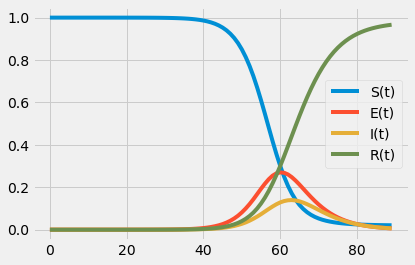

In [25]:
N = 4000000
n_infected = 1
T_inc = 5.2  # average incubation period
T_inf = 2.9  # average infectious period
R_0 = 4  # reproduction number
days = 90


def epimodel(t, y, R_t, T_inf, T_inc):
    
    S, E, I, R = y
    
    dS_dt = -(R_t / T_inf) * I * S
    dE_dt = (R_t / T_inf) * I * S - (T_inc**-1) * E
    dI_dt = (T_inc**-1) * E - (T_inf**-1) * I
    dR_dt = (T_inf**-1) * I
    
    return ([dS_dt, dE_dt, dI_dt, dR_dt])



#defining initial conditions
initial_state = [(N - n_infected)/ N, 0, n_infected / N, 0]

# sol = odeint(epimodel,[S,E,I,R],t,args = (T_inc,T_inf))
sol = solve_ivp(epimodel, [0, days], initial_state, args=(R_0, T_inf, T_inc), t_eval=np.arange(days))

#plotting results
plt.figure(figsize=(6,4))
plt.plot(sol.t, sol.y[0],label = "S(t)")
plt.plot(sol.t, sol.y[1],label = "E(t)")
plt.plot(sol.t, sol.y[2],label = "I(t)")
plt.plot(sol.t, sol.y[3],label = "R(t)")
plt.legend()
plt.show()



In [58]:
df_list = [infected_updated, cured_updated, deceased_updated]
target_country = 'Poland'

def format_for_seir(df_list):

    df_pruned_list = []
    for df in df_list:
        df = df[target_country]
    #     df = df.rename({target_country: df})
        df_pruned_list.append(df)
        merdz = pd.concat(df_pruned_list, 1)
    
    return merdz

df_seir = format_for_seir(df_list)
df_seir.columns = ['infected', 'cured', 'deceased']
df_seir = df_seir[df_seir['infected'] > 0]

df_seir = df_seir[:30]
df_seir = df_seir.reset_index(drop=True)
df_seir_list = df_seir.values.tolist()
df_seir_list

[[1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [5.0, 0.0, 0.0],
 [5.0, 0.0, 0.0],
 [11.0, 0.0, 0.0],
 [16.0, 0.0, 0.0],
 [22.0, 0.0, 0.0],
 [31.0, 0.0, 0.0],
 [49.0, 0.0, 1.0],
 [68.0, 0.0, 2.0],
 [103.0, 0.0, 3.0],
 [119.0, 0.0, 3.0],
 [177.0, 13.0, 4.0],
 [238.0, 13.0, 5.0],
 [251.0, 13.0, 5.0],
 [355.0, 1.0, 5.0],
 [425.0, 1.0, 5.0],
 [536.0, 1.0, 5.0],
 [634.0, 1.0, 7.0],
 [749.0, 1.0, 8.0],
 [901.0, 1.0, 10.0],
 [1051.0, 7.0, 14.0],
 [1221.0, 7.0, 16.0],
 [1389.0, 7.0, 16.0],
 [1638.0, 7.0, 18.0],
 [1862.0, 7.0, 22.0],
 [2055.0, 7.0, 31.0],
 [2311.0, 7.0, 33.0],
 [2554.0, 47.0, 43.0],
 [2946.0, 56.0, 57.0]]

In [ ]:
def SIR(t, x, parameters):
  
    ##Inputs:
    #t : time
    #x : state variables
    #parameters : parameter vector
    S = x[1]
    I = x[2]
    R = x[3]
    N = S + I + R
    #The with statement means we can use the parameter names as in parameters
    with(list(parameters)):
        dS = -beta * S * I / N
        dI = beta * S * I / N - gamma * I
        dR = gamma * I
        res = list(dS, dI, dR)

    return res
         
def run_model(S0, beta, gamma):
  #Function to run model with dede or lsoda
    out = solve_ivp(SIR, [0, max_days], [a, b, c, d], args=(R_0, T_inf, T_inc), t_eval=np.arange(max_days))
    out = lsoda(func = SIR,
                        y = c(S = S0, I = 1, R = 0),
                        parms = c(beta = beta, gamma = gamma),
                        times = seq(1, 17, by = 1))
    return(data.frame(out[, c("I", "R")]))

         
def format_for_seir(df_list):
    
    target_country = 'Poland'
    df_pruned_list = []
    for df in df_list:
        df = df[df[target_country]]
        df = df.rename(columns = {target_country: df})
        df_pruned_list.append(df)
        
    return df_pruned_list
        

def calc_distance(D, D_star):    
    # Define sum of squared errors
    # Vectorised function
    dist = sqrt(sum((D - D_star)^2))
    
    return dist


def calc_distance_final_size(mu, mu_star):
    # Define sum of squared errors
    # Vectorised function
    dist = sqrt((mu-mu_star)^2)
    
    return dist



def summary_stat(D):
    
    mu = tail(D, n = 1)
    
    return mu

In [ ]:
# Load in model functions
# source("case_1/case_1_preamble.R")

# Read in data file
D = pd.read_csv(r"C:\Users\Administrator\Desktop\== 2020\datasets\medical\data.csv")
print(D)

# What was the last day of the epidemic
t_final = 17

#### ABC set up #### 
N = 1000 # Number of accepted particles
epsilon = 20 # Epsilon value
n_par = 3 # How many parameters will be estimated
d = np.empty([N, n_par + 1])
# colnames(res)<-c("S_0", "beta", "gamma", "distance")

#### ABC algorithm ####

i = 1 # Initiate counter of accepted particles
j = 1 # Initiate counter of proposed particles
while(i <= N): # While the number of accepted particles is less than N_particles
  
    # Sample from prior distributions 
    S0_star = poisson.pmf(1, 100)
    beta_star = np.random.uniform(1, 0, 3)
    gamma_star = np.random.uniform(1, 0, 1)

    # Simulate data set from the model
    D_star = run_model(S0_star, beta_star, gamma_star)

    # Calculate distance  
#     distance = calc_distance(D$I, D_star$I) + calc_distance(D$R, D_star$R)

#     if distance <= epsilon){ # If the distance is less than the tolerance
#     # Store results
#     res[i,] <- c(S0_star, beta_star, gamma_star, distance)
#     # Update counter
#     i <- i + 1
#     }
#     j <- j + 1 # Update counter
#     acc_rate <- i / j # Calculate the acceptance rate 
#     cat("current acceptance rate = ", acc_rate, "\r")
#     }

# # Save data to csv file
# write.csv(res, "ABC_1_res.csv", row.names = F)